# I. Modélisation statistique

In [168]:
!pip install s3fs
!pip install pandas
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn
!pip install matplotlib

## I.1. Chargement et préparation des données

### A) Importation des données

In [169]:
import pandas as pd

# Importation des données avec code_insee en index
donnees = pd.read_csv("bdd_finale.csv", sep=',', encoding='utf-8', index_col=0)
donnees.head()

beneficiaire_trans_eco  moyenne_conso_agri_hab  \
code_insee                                                   
22001                            0                2.994071   
22002                            0                1.283886   
22003                            0                0.000000   
22004                            0                0.200325   
22005                            0                0.121358   

            moyenne_conso_indus_hab  moyenne_conso_tertiaire_hab  \
code_insee                                                         
22001                      0.000503                     0.631181   
22002                      0.032120                     0.173206   
22003                      0.000000                     0.524098   
22004                      0.675332                     1.267791   
22005                      0.082905                     1.151104   

            moyenne_conso_residentiel_hab  moyenne_conso_totale_hab  \
code_insee                                                            
22001                            3.688905                  7.378017   
22002                            3.248865                  4.775226   
22003                            2.908468                  3.472740   
22004                            3.034877                  5.203150   
22005                            3.532942                  4.926877   

            emissions_ges  nb_actes_france_renov  friche  ecoquartiers  ...  \
code_insee                                                              ...   
22001               14871                     86       2             0  ...   
22002                8621                     35       0             0  ...   
22003                3028                     47       0             0  ...   
22004               29130                     46       6             0  ...   
22005                4136                     10       3             0  ...   

            CSP_maire  com_variation_encours_dette_ha_pct part_inactifs  \
code_insee                                                                
22001              12                                18.9     12.751678   
22002              54                               -39.3     11.062718   
22003              56                                99.8     14.239130   
22004              33                               -34.1     17.234927   
22005              77                               -14.5     14.188533   

            part_actifs  dependance_eco  abstention_municipales  \
code_insee                                                        
22001         47.147651             107                    17.4   
22002         50.522648              96                    53.8   
22003         48.804348             113                    53.7   
22004         40.540541             126                    44.8   
22005         42.371234             140                    22.9   

            taux_creation_ent  total_entreprises  part_licencies_sportifs  \
code_insee                                                                  
22001                    15.0                 20                23.825503   
22002                    12.1                 33                30.836237   
22003                    36.7                 30                35.760870   
22004                    12.6                238                24.282744   
22005                    18.8                 64                27.891156   

            part_jeunes_sans_diplome  
code_insee                            
22001                            9.1  
22002                            4.0  
22003                            0.0  
22004                           12.4  
22005                            2.6  

[5 rows x 30 columns]

### B) Formatage des données

Nous allons pouvoir observer le type des données que nous avons. Cela va nous permettre de déterminer si on a besoin de modifier certaines variables pour qu'elles soient bien en variables catégorielles.

In [170]:
donnees.dtypes

beneficiaire_trans_eco                  int64
moyenne_conso_agri_hab                float64
moyenne_conso_indus_hab               float64
moyenne_conso_tertiaire_hab           float64
moyenne_conso_residentiel_hab         float64
moyenne_conso_totale_hab              float64
emissions_ges                           int64
nb_actes_france_renov                   int64
friche                                  int64
ecoquartiers                            int64
part_residences_secondaires           float64
beneficiaire_prog                       int64
climat                                 object
gridens7                                int64
superf_choro                          float64
departement                             int64
gare_tgv                                int64
part_trajets_voiture                  float64
med_disp                                int64
p_pop                                   int64
CSP_maire                               int64
com_variation_encours_dette_ha_pct

In [171]:
# Conversion des variables en variables catégorielles
donnees["beneficiaire_trans_eco"] = donnees["beneficiaire_trans_eco"].astype('category')
donnees["ecoquartiers"] = donnees["ecoquartiers"].astype('category')
donnees["beneficiaire_prog"] = donnees["beneficiaire_prog"].astype('category')
donnees["gridens7"] = donnees["gridens7"].astype('category')
donnees["departement"] = donnees["departement"].astype('category')
donnees["gare_tgv"] = donnees["gare_tgv"].astype('category')
donnees["CSP_maire"] = donnees["CSP_maire"].astype('category')


# Cas de la variable climat
donnees = pd.get_dummies(donnees, columns = ["climat"]) # On crée des variables binaires pour la variable climat car on a des chaînes de caractères

In [172]:
donnees.dtypes

beneficiaire_trans_eco                category
moyenne_conso_agri_hab                 float64
moyenne_conso_indus_hab                float64
moyenne_conso_tertiaire_hab            float64
moyenne_conso_residentiel_hab          float64
moyenne_conso_totale_hab               float64
emissions_ges                            int64
nb_actes_france_renov                    int64
friche                                   int64
ecoquartiers                          category
part_residences_secondaires            float64
beneficiaire_prog                     category
gridens7                              category
superf_choro                           float64
departement                           category
gare_tgv                              category
part_trajets_voiture                   float64
med_disp                                 int64
p_pop                                    int64
CSP_maire                             category
com_variation_encours_dette_ha_pct     float64
part_inactifs

Nous allons observer si on a des données manquantes dans notre jeu de données.

In [173]:
donnees.isna().sum()

beneficiaire_trans_eco                0
moyenne_conso_agri_hab                0
moyenne_conso_indus_hab               0
moyenne_conso_tertiaire_hab           0
moyenne_conso_residentiel_hab         0
moyenne_conso_totale_hab              0
emissions_ges                         0
nb_actes_france_renov                 0
friche                                0
ecoquartiers                          0
part_residences_secondaires           0
beneficiaire_prog                     0
gridens7                              0
superf_choro                          0
departement                           0
gare_tgv                              0
part_trajets_voiture                  0
med_disp                              0
p_pop                                 0
CSP_maire                             0
com_variation_encours_dette_ha_pct    0
part_inactifs                         0
part_actifs                           0
dependance_eco                        0
abstention_municipales                0


### C) Séparation de la variable à expliquer et des variables explicatives

In [174]:
# Définir X et y pour avoir les variables explicatives et la variable à expliquer beneficiaire_trans_eco
X = donnees.drop(columns=['beneficiaire_trans_eco'])

# Variable à expliquer : beneficiaire_trans_eco
y = donnees["beneficiaire_trans_eco"]

In [175]:
# import numpy as np

# # Convertir les listes en tableaux numpy
# X = np.array(X)
# y = np.array(y)

In [176]:
print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (1189, 31)
Dimensions de y: (1189,)


In [177]:
# import numpy as np

# np.unique(y)

## I.2. Modélisation

Nous allons d'abord diviser notre jeu de données en jeux d'apprentissage et de test.

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [179]:
X_train.shape, y_train.shape

((951, 31), (951,))

In [180]:
X_test.shape, y_test.shape

((238, 31), (238,))

## I.2.1. Régression logistique

### A) Construction des modèles

Nous allons maintenant définir notre modèle de régression logistique, sans pénalité.

In [181]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

etapes_reg_log_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('smote', SMOTE(k_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('adasyn', ADASYN(n_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('borderline_smote', BorderlineSMOTE(k_neighbors=5)), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]


etapes_reg_log = [('std_scaler', StandardScaler()),
                   ('reg_log', LogisticRegression())

]

# Création des pipelines
modele_reg_log_smote  = Pipeline(steps=etapes_reg_log_smote)
modele_reg_log_oversampler  = Pipeline(steps=etapes_reg_log_oversampler)
modele_reg_log_adasyn  = Pipeline(steps=etapes_reg_log_adasyn)
modele_reg_log_borderline_smote  = Pipeline(steps=etapes_reg_log_borderline_smote)
modele_reg_log  = Pipeline(steps=etapes_reg_log)

On entraîne le modèle sur les données pour estimer les coefficients.

In [182]:
modele_reg_log_smote.fit(X_train, y_train)
modele_reg_log_oversampler.fit(X_train, y_train)
modele_reg_log_adasyn.fit(X_train, y_train)
modele_reg_log_borderline_smote.fit(X_train, y_train)
modele_reg_log.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log', LogisticRegression())])

On cherche à prédire de nouvelles données grâce aux données test

In [183]:
y_proba_reg_log_smote = modele_reg_log_smote.predict_proba(X_test)[:,1]
y_pred_reg_log_smote = modele_reg_log_smote.predict(X_test)

y_proba_reg_log_oversampler = modele_reg_log_oversampler.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler = modele_reg_log_oversampler.predict(X_test)

y_proba_reg_log_adasyn = modele_reg_log_adasyn.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn = modele_reg_log_adasyn.predict(X_test)

y_proba_reg_log_borderline_smote = modele_reg_log_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_reg_log_borderline_smote = modele_reg_log_borderline_smote.predict(X_test)

y_proba_reg_log = modele_reg_log.predict_proba(X_test)[:, 1]
y_pred_reg_log = modele_reg_log.predict(X_test)

### B) Mesure de la performance des modèles initiaux

Nous allons maintenant évaluer la performance de notre modèle

In [184]:
from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score


# Calcul des métriques
auc_roc_reg_log_smote = roc_auc_score(y_test, y_proba_reg_log_smote)
auc_pr_reg_log_smote  = average_precision_score(y_test, y_proba_reg_log_smote)
log_loss_value_reg_log_smote  = log_loss(y_test, y_proba_reg_log_smote)
precision_reg_log_smote  = precision_score(y_test, y_pred_reg_log_smote)
recall_reg_log_smote  = recall_score(y_test, y_pred_reg_log_smote)
f1_reg_log_smote = f1_score(y_test, y_pred_reg_log_smote)
mcc_reg_log_smote  = matthews_corrcoef(y_test, y_pred_reg_log_smote)
balanced_acc_reg_log_smote  = balanced_accuracy_score(y_test, y_pred_reg_log_smote)
specificity_reg_log_smote  = confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote)[0, 1])
cohen_kappa_reg_log_smote  = cohen_kappa_score(y_test, y_pred_reg_log_smote)

In [185]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_oversampler = roc_auc_score(y_test, y_proba_reg_log_oversampler)
auc_pr_reg_log_oversampler = average_precision_score(y_test, y_proba_reg_log_oversampler)
log_loss_value_reg_log_oversampler = log_loss(y_test, y_proba_reg_log_oversampler)
precision_reg_log_oversampler = precision_score(y_test, y_pred_reg_log_oversampler)
recall_reg_log_oversampler = recall_score(y_test, y_pred_reg_log_oversampler)
f1_reg_log_oversampler = f1_score(y_test, y_pred_reg_log_oversampler)
mcc_reg_log_oversampler = matthews_corrcoef(y_test, y_pred_reg_log_oversampler)
balanced_acc_reg_log_oversampler = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler)
specificity_reg_log_oversampler = confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 1])
cohen_kappa_reg_log_oversampler = cohen_kappa_score(y_test, y_pred_reg_log_oversampler)

In [186]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_adasyn = roc_auc_score(y_test, y_proba_reg_log_adasyn)
auc_pr_reg_log_adasyn = average_precision_score(y_test, y_proba_reg_log_adasyn)
log_loss_value_reg_log_adasyn = log_loss(y_test, y_proba_reg_log_adasyn)
precision_reg_log_adasyn = precision_score(y_test, y_pred_reg_log_adasyn)
recall_reg_log_adasyn = recall_score(y_test, y_pred_reg_log_adasyn)
f1_reg_log_adasyn = f1_score(y_test, y_pred_reg_log_adasyn)
mcc_reg_log_adasyn = matthews_corrcoef(y_test, y_pred_reg_log_adasyn)
balanced_acc_reg_log_adasyn = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn)
specificity_reg_log_adasyn = confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 1])
cohen_kappa_reg_log_adasyn = cohen_kappa_score(y_test, y_pred_reg_log_adasyn)

In [187]:
# Calcul des métriques

auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_borderline_smote)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_borderline_smote)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_borderline_smote)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_borderline_smote)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_borderline_smote)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_borderline_smote)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_borderline_smote)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_borderline_smote)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_borderline_smote)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_borderline_smote)


In [188]:
auc_roc_reg_log = roc_auc_score(y_test, y_proba_reg_log)
auc_pr_reg_log = average_precision_score(y_test, y_proba_reg_log)
log_loss_value_reg_log = log_loss(y_test, y_proba_reg_log)
precision_reg_log = precision_score(y_test, y_pred_reg_log)
recall_reg_log = recall_score(y_test, y_pred_reg_log)
f1_reg_log = f1_score(y_test, y_pred_reg_log)
mcc_reg_log = matthews_corrcoef(y_test, y_pred_reg_log)
balanced_acc_reg_log = balanced_accuracy_score(y_test, y_pred_reg_log)
specificity_reg_log = confusion_matrix(y_test, y_pred_reg_log)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log)[0, 0] + confusion_matrix(y_test, y_pred_reg_log)[0, 1])
cohen_kappa_reg_log = cohen_kappa_score(y_test, y_pred_reg_log)

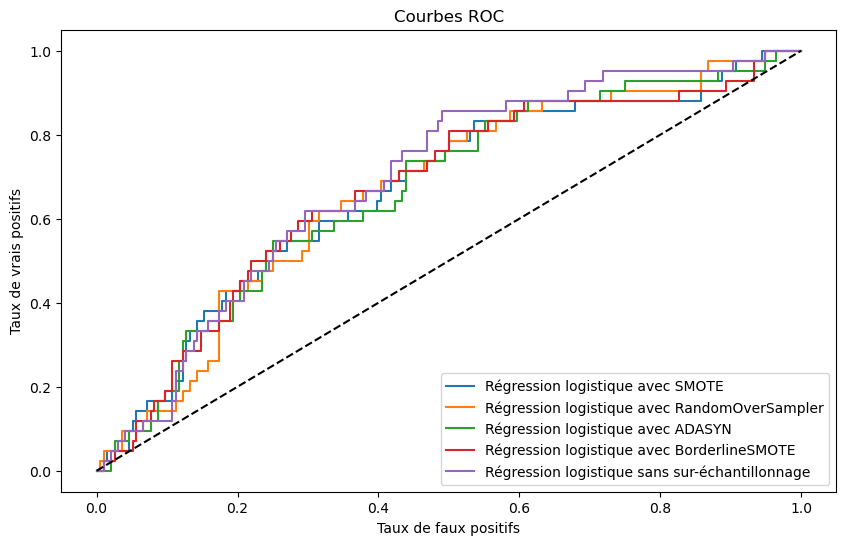

In [189]:
# Comparaison des courbes ROC

from sklearn.metrics import roc_curve

fpr_reg_log_smote, tpr_reg_log_smote, _ = roc_curve(y_test, y_proba_reg_log_smote)
fpr_reg_log_oversampler, tpr_reg_log_oversampler, _ = roc_curve(y_test, y_proba_reg_log_oversampler)
fpr_reg_log_adasyn, tpr_reg_log_adasyn, _ = roc_curve(y_test, y_proba_reg_log_adasyn)
fpr_reg_log_borderline_smote, tpr_reg_log_borderline_smote, _ = roc_curve(y_test, y_proba_reg_log_borderline_smote)
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_test, y_proba_reg_log)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote, tpr_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler, tpr_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn, tpr_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_borderline_smote, tpr_reg_log_borderline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log, tpr_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

plt.show()

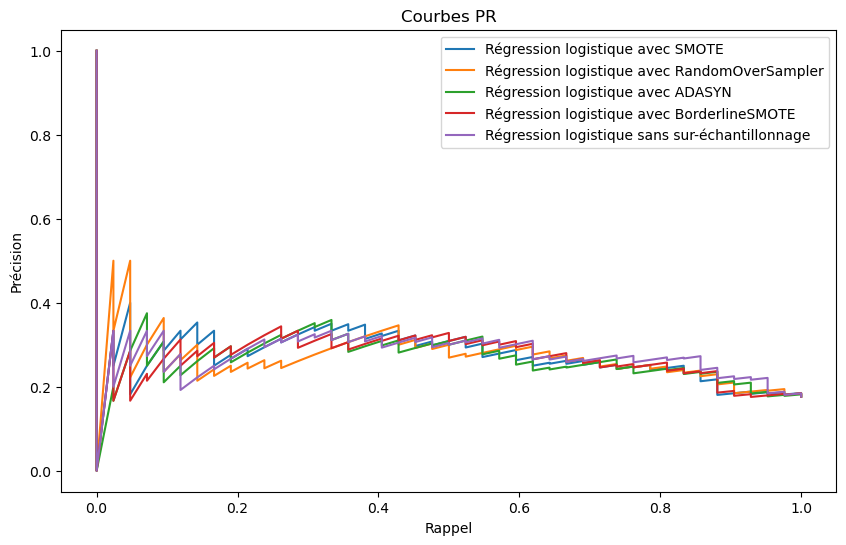

In [190]:
# Comparaison des courbes PR

from sklearn.metrics import precision_recall_curve

precision_reg_log_smote, recall_reg_log_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_smote)
precision_reg_log_oversampler, recall_reg_log_oversampler, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler)
precision_reg_log_adasyn, recall_reg_log_adasyn, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn)
precision_reg_log_borderline_smote, recall_reg_log_borderline_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_borderline_smote)
precision_reg_log, recall_reg_log, _ = precision_recall_curve(y_test, y_proba_reg_log)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote, precision_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler, precision_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn, precision_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_borderline_smote, precision_reg_log_borderline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot(recall_reg_log, precision_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')
plt.legend()
plt.show()

In [191]:
# Résultats

resultats_reg_log = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log, auc_pr_reg_log, log_loss_value_reg_log, f1_reg_log, mcc_reg_log, balanced_acc_reg_log, specificity_reg_log, cohen_kappa_reg_log],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote, auc_pr_reg_log_smote, log_loss_value_reg_log_smote, f1_reg_log_smote, mcc_reg_log_smote, balanced_acc_reg_log_smote, specificity_reg_log_smote, cohen_kappa_reg_log_smote],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler, auc_pr_reg_log_oversampler, log_loss_value_reg_log_oversampler,  f1_reg_log_oversampler, mcc_reg_log_oversampler, balanced_acc_reg_log_oversampler, specificity_reg_log_oversampler, cohen_kappa_reg_log_oversampler],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn, auc_pr_reg_log_adasyn, log_loss_value_reg_log_adasyn, f1_reg_log_adasyn, mcc_reg_log_adasyn, balanced_acc_reg_log_adasyn, specificity_reg_log_adasyn, cohen_kappa_reg_log_adasyn],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote, auc_pr_reg_log_borderline_smote, log_loss_value_reg_log_borderline_smote,  f1_reg_log_borderline_smote, mcc_reg_log_borderline_smote, balanced_acc_reg_log_borderline_smote, specificity_reg_log_borderline_smote, cohen_kappa_reg_log_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log = resultats_reg_log.round(3)
resultats_reg_log

Régression logistique sans sur-échantillonnage  \
AUC-ROC                                               0.694   
AUC-PR                                                0.286   
Log loss                                              0.450   
F1                                                    0.044   
MCC                                                   0.046   
Accuracy                                              0.507   
Spécificité                                           0.990   
Kappa                                                 0.021   

             Régression logistique avec SMOTE  \
AUC-ROC                                 0.669   
AUC-PR                                  0.284   
Log loss                                0.651   
F1                                      0.368   
MCC                                     0.190   
Accuracy                                0.622   
Spécificité                             0.648   
Kappa                                   0.164   

             Régression logistique avec RandomOverSampler  \
AUC-ROC                                             0.669   
AUC-PR                                              0.280   
Log loss                                            0.486   
F1                                                  0.148   
MCC                                                 0.095   
Accuracy                                            0.527   
Spécificité                                         0.959   
Kappa                                               0.076   

             Régression logistique avec ADASYN  \
AUC-ROC                                  0.668   
AUC-PR                                   0.274   
Log loss                                 0.647   
F1                                       0.365   
MCC                                      0.185   
Accuracy                                 0.619   
Spécificité                              0.643   
Kappa                                    0.159   

             Régression logistique avec BorderlineSMOTE  
AUC-ROC                                           0.672  
AUC-PR                                            0.280  
Log loss                                          0.654  
F1                                                0.400  
MCC                                               0.239  
Accuracy                                          0.651  
Spécificité                                       0.684  
Kappa                                             0.212

### C) Ajustement des hyperparamètres

Pour la régression logistique, les hyperparamètres les plus courants à optimiser sont :
- C : Ce paramètre de régularisation inverse. Une valeur plus petite indique une régularisation plus forte.
- solver : L'algorithme utilisé pour l'optimisation. Les choix courants sont 'liblinear', 'lbfgs', 'saga', etc.
- penalty : Le type de régularisation à utiliser ('l1', 'l2', 'elasticnet', 'none')
- fonction de lien

In [192]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, cohen_kappa_score, roc_auc_score

# Définir les grilles de paramètres pour chaque pipeline
param_grid_reg_log_oversampler = {
    'oversampler__sampling_strategy': ['auto', 0.5, 0.75, 1.0],
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'None'], # Type de régularisation
}

param_grid_reg_log_smote = {
    'smote__sampling_strategy': ['auto', 0.5, 0.75, 1.0],
    'smote__k_neighbors': [3, 5, 7],
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'None'], # Type de régularisation
}

param_grid_reg_log_adasyn = {
    'adasyn__sampling_strategy': ['auto', 0.5, 0.75, 1.0],
    'adasyn__n_neighbors': [3, 5, 7],
    'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'None'],
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation 
}

param_grid_reg_log_borderline_smote = {
    'borderline_smote__sampling_strategy': ['auto', 0.5, 0.75, 1.0],
    'borderline_smote__k_neighbors': [3, 5, 7],
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'None'], # Type de régularisation
}

grille_param_reg_log_ = {
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'None'], # Type de régularisation
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Kappa': make_scorer(cohen_kappa_score),
    'AUC': 'roc_auc'
}

# Création des GridSearchCV pour chaque pipeline
grille_recherche_reg_log_oversampler = GridSearchCV(
    estimator=modele_reg_log_oversampler,
    param_grid=param_grid_reg_log_oversampler,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grille_recherche_reg_log_smote = GridSearchCV(
    estimator=modele_reg_log_smote,
    param_grid=param_grid_reg_log_smote,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grille_recherche_reg_log_adasyn = GridSearchCV(
    estimator=modele_reg_log_adasyn,
    param_grid=param_grid_reg_log_adasyn,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grille_recherche_reg_log_borderline_smote = GridSearchCV(
    estimator=modele_reg_log_borderline_smote,
    param_grid=param_grid_reg_log_borderline_smote,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grille_recherche_reg_log = GridSearchCV(
    estimator= modele_reg_log,
    param_grid=grille_param_reg_log_,
    scoring=scoring,
    refit = 'AUC',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [193]:
# Récupération des meilleurs modèles

modele_reg_log_oversampler_opt = grille_recherche_reg_log_oversampler.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 333, in fit
    self._final_estimat

In [194]:
modele_reg_log_smote_opt = grille_recherche_reg_log_smote.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 333, in fit
    self._final_estima

In [195]:
modele_reg_log_adasyn_opt = grille_recherche_reg_log_adasyn.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 333, in fit
    self._final_estima

In [196]:
modele_reg_log_borderline_smote_opt = grille_recherche_reg_log_borderline_smote.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 333, in fit
    self._final_estima

In [197]:
modele_reg_log_opt = grille_recherche_reg_log.fit(X_train, y_train).best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 333, in fit
    self._final_estimator

In [198]:
# Affichage des meilleurs paramètres pour chaque pipeline
print("Meilleurs paramètres pour la régression logistique avec RandomOverSampler:", modele_reg_log_oversampler_opt)
print("Meilleurs paramètres pour la régression logistique avec SMOTE:", modele_reg_log_smote_opt)
print("Meilleurs paramètres pour la régression logistique avec ADASYN:", modele_reg_log_adasyn_opt)
print("Meilleurs paramètres pour la régression logistique avec BorderlineSMOTE:", modele_reg_log_borderline_smote_opt)
print("Meilleurs paramètres pour la régression logistique sans sur-échantillonnage:", modele_reg_log_opt)

Meilleurs paramètres pour la régression logistique avec RandomOverSampler: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler(sampling_strategy=0.5)),
                ('reg_log', LogisticRegression(C=0.01))])
Meilleurs paramètres pour la régression logistique avec SMOTE: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('smote', SMOTE(k_neighbors=7, sampling_strategy=1.0)),
                ('reg_log', LogisticRegression(C=0.01))])
Meilleurs paramètres pour la régression logistique avec ADASYN: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adasyn', ADASYN(sampling_strategy=0.5)),
                ('reg_log', LogisticRegression(C=0.01))])
Meilleurs paramètres pour la régression logistique avec BorderlineSMOTE: Pipeline(steps=[('std_scaler', StandardScaler()),
                ('borderline_smote', BorderlineSMOTE()),
                ('reg_log', LogisticRegression(C=0.01))])
Meilleurs paramètres pour la r

In [199]:
# Entraînement des meilleurs modèles

modele_reg_log_oversampler_opt.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler(sampling_strategy=0.5)),
                ('reg_log', LogisticRegression(C=0.01))])

In [200]:
modele_reg_log_opt.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log', LogisticRegression(C=0.01))])

In [201]:
modele_reg_log_adasyn_opt.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adasyn', ADASYN(sampling_strategy=0.5)),
                ('reg_log', LogisticRegression(C=0.01))])

In [202]:
modele_reg_log_borderline_smote_opt.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('borderline_smote', BorderlineSMOTE()),
                ('reg_log', LogisticRegression(C=0.01))])

In [203]:
modele_reg_log_opt.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log', LogisticRegression(C=0.01))])

In [204]:
# Prédiction sur l'échantillon test
y_proba_reg_log_smote_cv = modele_reg_log_smote_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_smote_cv = modele_reg_log_smote_opt.predict(X_test)

y_proba_reg_log_oversampler_cv = modele_reg_log_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler_cv = modele_reg_log_oversampler_opt.predict(X_test)

y_proba_reg_log_adasyn_cv = modele_reg_log_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn_cv = modele_reg_log_adasyn_opt.predict(X_test)

y_proba_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_borderline_smote_cv = modele_reg_log_borderline_smote_opt.predict(X_test)

y_proba_reg_log_cv = modele_reg_log_opt.predict_proba(X_test)[:, 1]
y_pred_reg_log_cv = modele_reg_log_opt.predict(X_test)


### D) Mesure de la performance des modèles optimisés

In [205]:
# Calcul des métriques pour chaque modèle

# Calcul des métriques
auc_roc_reg_log_smote_cv = roc_auc_score(y_test, y_proba_reg_log_smote_cv)
auc_pr_reg_log_smote_cv = average_precision_score(y_test, y_proba_reg_log_smote_cv)
log_loss_value_reg_log_smote_cv = log_loss(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_smote_cv = precision_score(y_test, y_pred_reg_log_smote_cv)
recall_reg_log_smote_cv = recall_score(y_test, y_pred_reg_log_smote_cv)
f1_reg_log_smote_cv = f1_score(y_test, y_pred_reg_log_smote_cv)
mcc_reg_log_smote_cv = matthews_corrcoef(y_test, y_pred_reg_log_smote_cv)
balanced_acc_reg_log_smote_cv = balanced_accuracy_score(y_test, y_pred_reg_log_smote_cv)
specificity_reg_log_smote_cv = confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 1])
cohen_kappa_reg_log_smote_cv = cohen_kappa_score(y_test, y_pred_reg_log_smote_cv)

In [206]:
auc_roc_reg_log_oversampler_cv = roc_auc_score(y_test, y_proba_reg_log_oversampler_cv)
auc_pr_reg_log_oversampler_cv = average_precision_score(y_test, y_proba_reg_log_oversampler_cv)
log_loss_value_reg_log_oversampler_cv = log_loss(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_oversampler_cv = precision_score(y_test, y_pred_reg_log_oversampler_cv)
recall_reg_log_oversampler_cv = recall_score(y_test, y_pred_reg_log_oversampler_cv)
f1_reg_log_oversampler_cv = f1_score(y_test, y_pred_reg_log_oversampler_cv)
mcc_reg_log_oversampler_cv = matthews_corrcoef(y_test, y_pred_reg_log_oversampler_cv)
balanced_acc_reg_log_oversampler_cv = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler_cv)
specificity_reg_log_oversampler_cv = confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 1])
cohen_kappa_reg_log_oversampler_cv = cohen_kappa_score(y_test, y_pred_reg_log_oversampler_cv)

In [207]:
auc_roc_reg_log_adasyn_cv = roc_auc_score(y_test, y_proba_reg_log_adasyn_cv)
auc_pr_reg_log_adasyn_cv = average_precision_score(y_test, y_proba_reg_log_adasyn_cv)
log_loss_value_reg_log_adasyn_cv = log_loss(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_adasyn_cv = precision_score(y_test, y_pred_reg_log_adasyn_cv)
recall_reg_log_adasyn_cv = recall_score(y_test, y_pred_reg_log_adasyn_cv)
f1_reg_log_adasyn_cv = f1_score(y_test, y_pred_reg_log_adasyn_cv)
mcc_reg_log_adasyn_cv = matthews_corrcoef(y_test, y_pred_reg_log_adasyn_cv)
balanced_acc_reg_log_adasyn_cv = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn_cv)
specificity_reg_log_adasyn_cv = confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 1])
cohen_kappa_reg_log_adasyn_cv = cohen_kappa_score(y_test, y_pred_reg_log_adasyn_cv)

In [208]:
auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_borderline_smote_cv)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_borderline_smote_cv)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_borderline_smote_cv)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_borderline_smote_cv)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_borderline_smote_cv)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_borderline_smote_cv)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_borderline_smote_cv)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_borderline_smote_cv)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_borderline_smote_cv)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_borderline_smote_cv)

In [209]:
auc_roc_reg_log_cv = roc_auc_score(y_test, y_proba_reg_log_cv)
auc_pr_reg_log_cv = average_precision_score(y_test, y_proba_reg_log_cv)
log_loss_value_reg_log_cv = log_loss(y_test, y_proba_reg_log_cv)
precision_reg_log_cv = precision_score(y_test, y_pred_reg_log_cv)
recall_reg_log_cv = recall_score(y_test, y_pred_reg_log_cv)
f1_reg_log_cv = f1_score(y_test, y_pred_reg_log_cv)
mcc_reg_log_cv = matthews_corrcoef(y_test, y_pred_reg_log_cv)
balanced_acc_reg_log_cv = balanced_accuracy_score(y_test, y_pred_reg_log_cv)
specificity_reg_log_cv = confusion_matrix(y_test, y_pred_reg_log_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_cv)[0, 1])
cohen_kappa_reg_log_cv = cohen_kappa_score(y_test, y_pred_reg_log_cv)

In [320]:
# Affichage des résultats

resultats_reg_log_cv = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log_cv, auc_pr_reg_log_cv, log_loss_value_reg_log_cv, f1_reg_log_cv, mcc_reg_log_cv, balanced_acc_reg_log_cv, specificity_reg_log_cv, cohen_kappa_reg_log_cv],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote_cv, auc_pr_reg_log_smote_cv, log_loss_value_reg_log_smote_cv, f1_reg_log_smote_cv, mcc_reg_log_smote_cv, balanced_acc_reg_log_smote_cv, specificity_reg_log_smote_cv, cohen_kappa_reg_log_smote_cv],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler_cv, auc_pr_reg_log_oversampler_cv, log_loss_value_reg_log_oversampler_cv, f1_reg_log_oversampler_cv, mcc_reg_log_oversampler_cv, balanced_acc_reg_log_oversampler_cv, specificity_reg_log_oversampler_cv, cohen_kappa_reg_log_oversampler_cv],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn_cv, auc_pr_reg_log_adasyn_cv, log_loss_value_reg_log_adasyn_cv, f1_reg_log_adasyn_cv, mcc_reg_log_adasyn_cv, balanced_acc_reg_log_adasyn_cv, specificity_reg_log_adasyn_cv, cohen_kappa_reg_log_adasyn_cv],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote, auc_pr_reg_log_borderline_smote, log_loss_value_reg_log_borderline_smote, f1_reg_log_borderline_smote, mcc_reg_log_borderline_smote, balanced_acc_reg_log_borderline_smote, specificity_reg_log_borderline_smote, cohen_kappa_reg_log_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log_cv = resultats_reg_log_cv.round(3)
resultats_reg_log_cv

# Export
resultats_reg_log_cv.to_csv("resultats_reg_log_opt.csv", index=True)
latex_table_reg_log = resultats_reg_log_cv.to_latex(index=True)
print(latex_table_reg_log)


\begin{tabular}{lrrrrr}
\toprule
 & Régression logistique sans sur-échantillonnage & Régression logistique avec SMOTE & Régression logistique avec RandomOverSampler & Régression logistique avec ADASYN & Régression logistique avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.698000 & 0.674000 & 0.689000 & 0.670000 & 0.675000 \\
AUC-PR & 0.294000 & 0.272000 & 0.288000 & 0.276000 & 0.280000 \\
Log loss & 0.448000 & 0.653000 & 0.502000 & 0.520000 & 0.652000 \\
F1 & 0.000000 & 0.415000 & 0.115000 & 0.140000 & 0.415000 \\
MCC & -0.043000 & 0.262000 & 0.068000 & 0.061000 & 0.262000 \\
Accuracy & 0.495000 & 0.666000 & 0.518000 & 0.520000 & 0.668000 \\
Spécificité & 0.990000 & 0.689000 & 0.964000 & 0.944000 & 0.668000 \\
Kappa & -0.016000 & 0.232000 & 0.051000 & 0.052000 & 0.227000 \\
\bottomrule
\end{tabular}



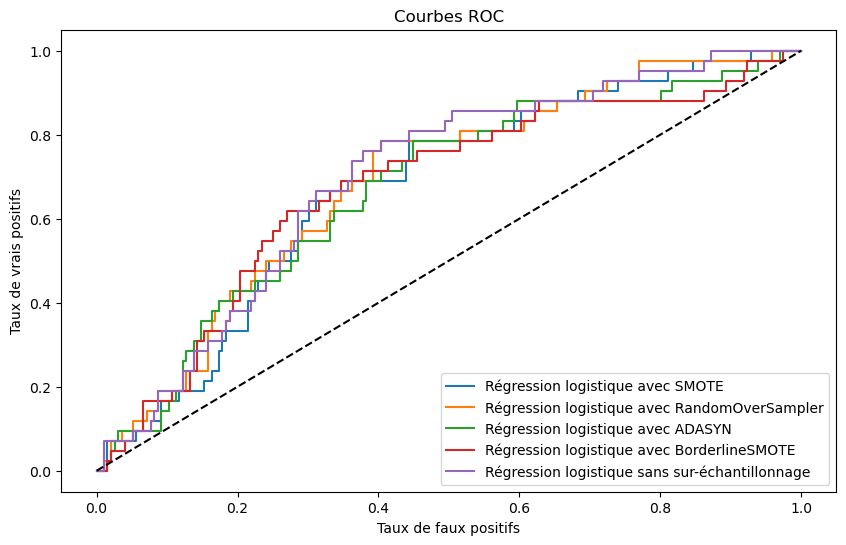

In [211]:
# Comparaison des courbes ROC

fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_smote_cv)
fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, _ = roc_curve(y_test, y_proba_reg_log_oversampler_cv)
fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, _ = roc_curve(y_test, y_proba_reg_log_adasyn_cv)
fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_borderline_smote_cv)
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_borderline_smote_cv, tpr_reg_log_borderline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log, tpr_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

plt.show()

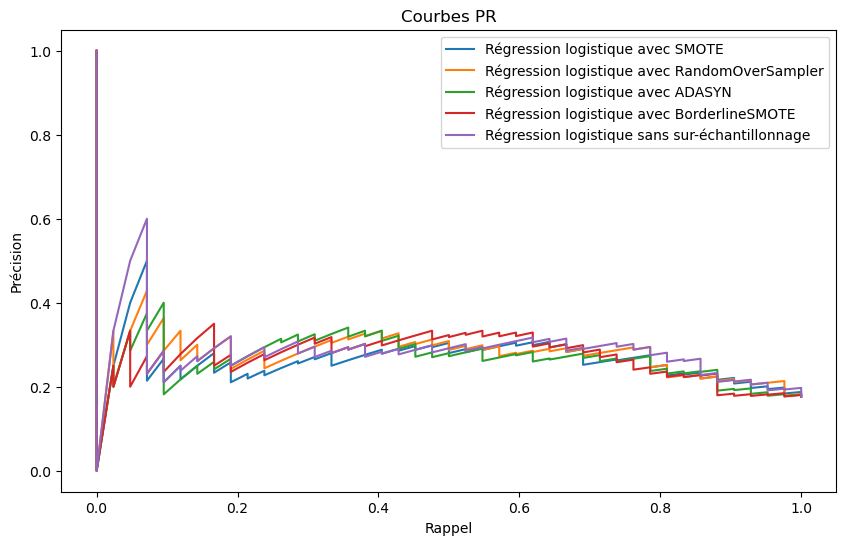

In [212]:
# Comparaison des courbes PR

precision_reg_log_smote_cv, recall_reg_log_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_oversampler_cv, recall_reg_log_oversampler_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_adasyn_cv, recall_reg_log_adasyn_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_borderline_smote_cv, recall_reg_log_borderline_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_borderline_smote_cv)
precision_reg_log_cv, recall_reg_log_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote_cv, precision_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler_cv, precision_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn_cv, precision_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_borderline_smote_cv, precision_reg_log_borderline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(recall_reg_log_cv, precision_reg_log_cv, label='Régression logistique sans sur-échantillonnage')

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')

plt.legend()
plt.show()

### E) Importance des variables

In [213]:
# Importance des variables

# Récupération des coefficients de la régression logistique
coefficients_reg_log_smote = modele_reg_log_smote_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_oversampler = modele_reg_log_oversampler_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_adasyn = modele_reg_log_adasyn_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log_borderline_smote = modele_reg_log_borderline_smote_opt.named_steps['reg_log'].coef_[0]
coefficients_reg_log = modele_reg_log_opt.named_steps['reg_log'].coef_[0]

# Récupération des noms des variables
noms_variables = X.columns

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_reg_log_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_smote
})

resultats_importance_variables_reg_log_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_oversampler
})

resultats_importance_variables_reg_log_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_adasyn
})

resultats_importance_variables_reg_log_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_borderline_smote
})

resultats_importance_variables_reg_log = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log
})

# Affichage des résultats
resultats_importance_variables_reg_log_smote = resultats_importance_variables_reg_log_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_oversampler = resultats_importance_variables_reg_log_oversampler.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_adasyn = resultats_importance_variables_reg_log_adasyn.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_borderline_smote = resultats_importance_variables_reg_log_borderline_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log = resultats_importance_variables_reg_log.sort_values(by="Coefficient", ascending=False)

resultats_importance_variables_reg_log_smote

Variable  Coefficient
12                        superf_choro     0.265588
14                            gare_tgv     0.112066
7                               friche     0.107124
26             part_licencies_sportifs     0.102812
30                          climat_Mer     0.081837
23              abstention_municipales     0.074499
20                       part_inactifs     0.071266
15                part_trajets_voiture     0.063590
22                      dependance_eco     0.058918
16                            med_disp     0.054532
6                nb_actes_france_renov     0.011524
5                        emissions_ges     0.007501
18                           CSP_maire     0.003711
0               moyenne_conso_agri_hab     0.002933
1              moyenne_conso_indus_hab    -0.002298
29                     climat_Estuaire    -0.005906
17                               p_pop    -0.014834
25                   total_entreprises    -0.015965
19  com_variation_encours_dette_ha_pct    -0.021359
8                         ecoquartiers    -0.030606
2          moyenne_conso_tertiaire_hab    -0.035151
4             moyenne_conso_totale_hab    -0.046901
27            part_jeunes_sans_diplome    -0.069252
10                   beneficiaire_prog    -0.074399
28                        climat_Autre    -0.078570
13                         departement    -0.081460
11                            gridens7    -0.107643
24                   taux_creation_ent    -0.119795
21                         part_actifs    -0.139965
3        moyenne_conso_residentiel_hab    -0.140797
9          part_residences_secondaires    -0.157297

In [214]:
resultats_importance_variables_reg_log_oversampler

Variable  Coefficient
12                        superf_choro     0.231873
7                               friche     0.140441
14                            gare_tgv     0.094741
23              abstention_municipales     0.069795
26             part_licencies_sportifs     0.067770
30                          climat_Mer     0.052134
16                            med_disp     0.047447
22                      dependance_eco     0.047215
6                nb_actes_france_renov     0.042128
18                           CSP_maire     0.035460
1              moyenne_conso_indus_hab     0.025412
15                part_trajets_voiture     0.014956
8                         ecoquartiers     0.013827
27            part_jeunes_sans_diplome     0.011051
29                     climat_Estuaire     0.008412
0               moyenne_conso_agri_hab     0.007938
20                       part_inactifs     0.002632
2          moyenne_conso_tertiaire_hab    -0.003258
4             moyenne_conso_totale_hab    -0.013367
5                        emissions_ges    -0.018867
17                               p_pop    -0.022451
25                   total_entreprises    -0.023744
13                         departement    -0.026903
19  com_variation_encours_dette_ha_pct    -0.028056
10                   beneficiaire_prog    -0.034596
24                   taux_creation_ent    -0.038170
11                            gridens7    -0.051023
28                        climat_Autre    -0.053253
21                         part_actifs    -0.094252
9          part_residences_secondaires    -0.110327
3        moyenne_conso_residentiel_hab    -0.150690

In [215]:
resultats_importance_variables_reg_log_adasyn

Variable  Coefficient
12                        superf_choro     0.225722
7                               friche     0.079758
26             part_licencies_sportifs     0.070744
14                            gare_tgv     0.059154
22                      dependance_eco     0.058262
30                          climat_Mer     0.057395
6                nb_actes_france_renov     0.056729
16                            med_disp     0.039667
15                part_trajets_voiture     0.039656
23              abstention_municipales     0.025823
2          moyenne_conso_tertiaire_hab     0.010012
20                       part_inactifs     0.000366
8                         ecoquartiers    -0.001300
1              moyenne_conso_indus_hab    -0.001863
5                        emissions_ges    -0.014767
25                   total_entreprises    -0.015049
17                               p_pop    -0.018734
29                     climat_Estuaire    -0.018836
18                           CSP_maire    -0.022132
19  com_variation_encours_dette_ha_pct    -0.034236
0               moyenne_conso_agri_hab    -0.035707
11                            gridens7    -0.036121
4             moyenne_conso_totale_hab    -0.039894
27            part_jeunes_sans_diplome    -0.048361
10                   beneficiaire_prog    -0.050027
28                        climat_Autre    -0.051241
13                         departement    -0.087086
24                   taux_creation_ent    -0.091010
21                         part_actifs    -0.098175
9          part_residences_secondaires    -0.133962
3        moyenne_conso_residentiel_hab    -0.144628

In [216]:
resultats_importance_variables_reg_log_borderline_smote

Variable  Coefficient
12                        superf_choro     0.296183
7                               friche     0.139111
15                part_trajets_voiture     0.125704
23              abstention_municipales     0.123456
26             part_licencies_sportifs     0.115199
30                          climat_Mer     0.108307
22                      dependance_eco     0.095185
14                            gare_tgv     0.074005
16                            med_disp     0.067142
0               moyenne_conso_agri_hab     0.041863
8                         ecoquartiers     0.033951
6                nb_actes_france_renov     0.029422
20                       part_inactifs     0.014390
2          moyenne_conso_tertiaire_hab    -0.000414
17                               p_pop    -0.000477
18                           CSP_maire    -0.001348
25                   total_entreprises    -0.008286
5                        emissions_ges    -0.011700
10                   beneficiaire_prog    -0.018827
27            part_jeunes_sans_diplome    -0.020711
19  com_variation_encours_dette_ha_pct    -0.028340
11                            gridens7    -0.045896
1              moyenne_conso_indus_hab    -0.048382
13                         departement    -0.054137
4             moyenne_conso_totale_hab    -0.064009
28                        climat_Autre    -0.081801
29                     climat_Estuaire    -0.092205
24                   taux_creation_ent    -0.094968
21                         part_actifs    -0.141663
9          part_residences_secondaires    -0.149196
3        moyenne_conso_residentiel_hab    -0.164388

In [217]:
resultats_importance_variables_reg_log

Variable  Coefficient
12                        superf_choro     0.159774
7                               friche     0.101958
14                            gare_tgv     0.083682
23              abstention_municipales     0.065148
26             part_licencies_sportifs     0.047257
30                          climat_Mer     0.042990
6                nb_actes_france_renov     0.040018
16                            med_disp     0.032111
22                      dependance_eco     0.028473
2          moyenne_conso_tertiaire_hab     0.022674
0               moyenne_conso_agri_hab     0.011462
20                       part_inactifs     0.011068
29                     climat_Estuaire     0.003415
1              moyenne_conso_indus_hab     0.001462
15                part_trajets_voiture     0.000874
8                         ecoquartiers    -0.000413
25                   total_entreprises    -0.002711
4             moyenne_conso_totale_hab    -0.006320
10                   beneficiaire_prog    -0.007358
5                        emissions_ges    -0.008785
17                               p_pop    -0.010761
18                           CSP_maire    -0.014138
27            part_jeunes_sans_diplome    -0.015762
19  com_variation_encours_dette_ha_pct    -0.019062
13                         departement    -0.024525
24                   taux_creation_ent    -0.041983
28                        climat_Autre    -0.042987
11                            gridens7    -0.057659
21                         part_actifs    -0.058877
9          part_residences_secondaires    -0.070141
3        moyenne_conso_residentiel_hab    -0.084670

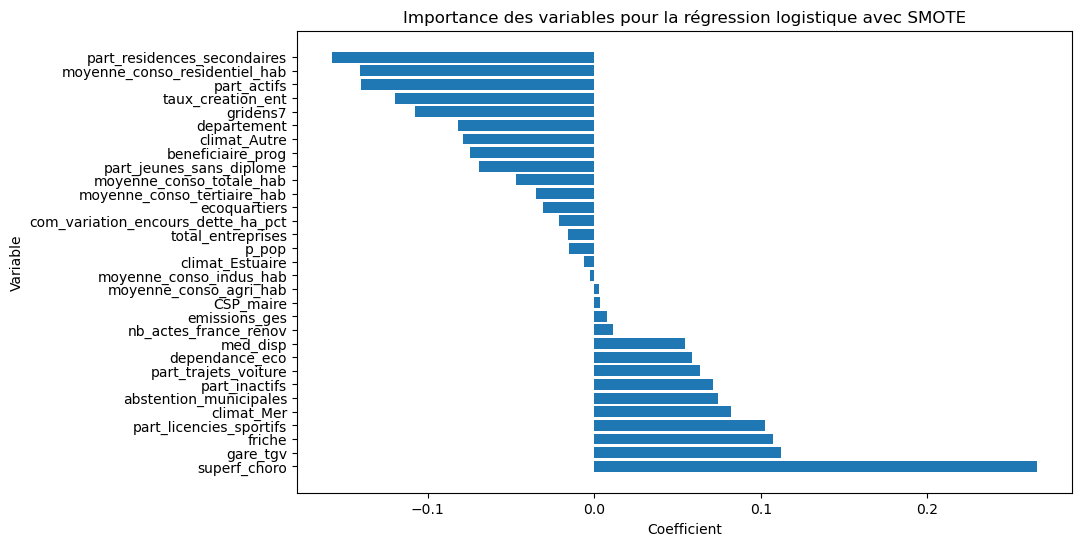

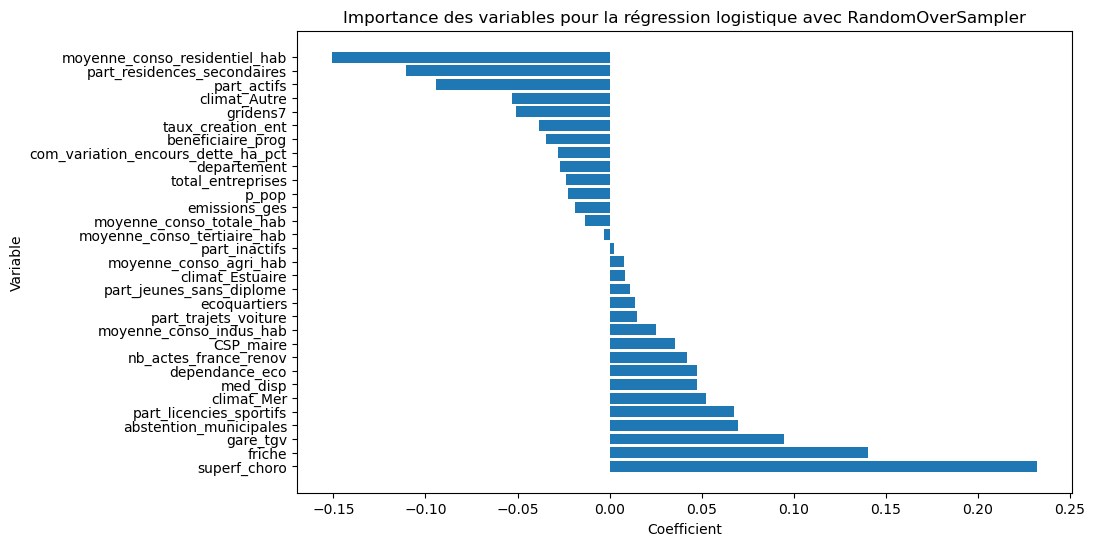

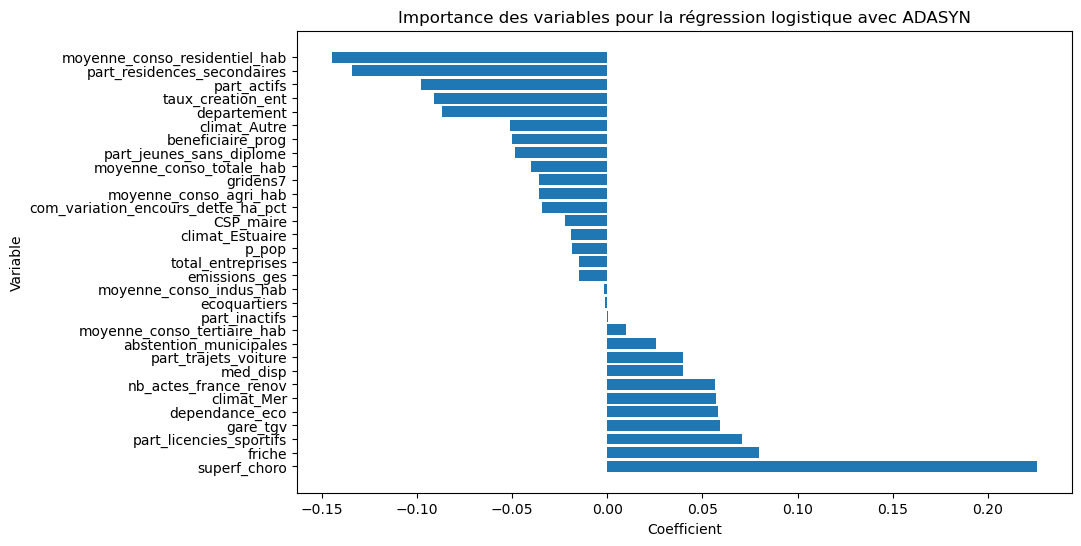

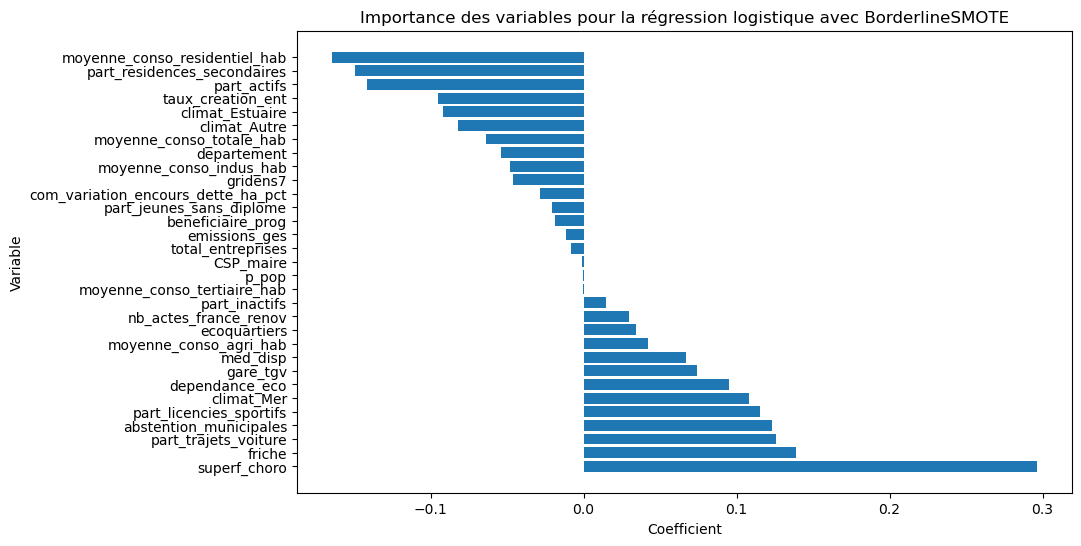

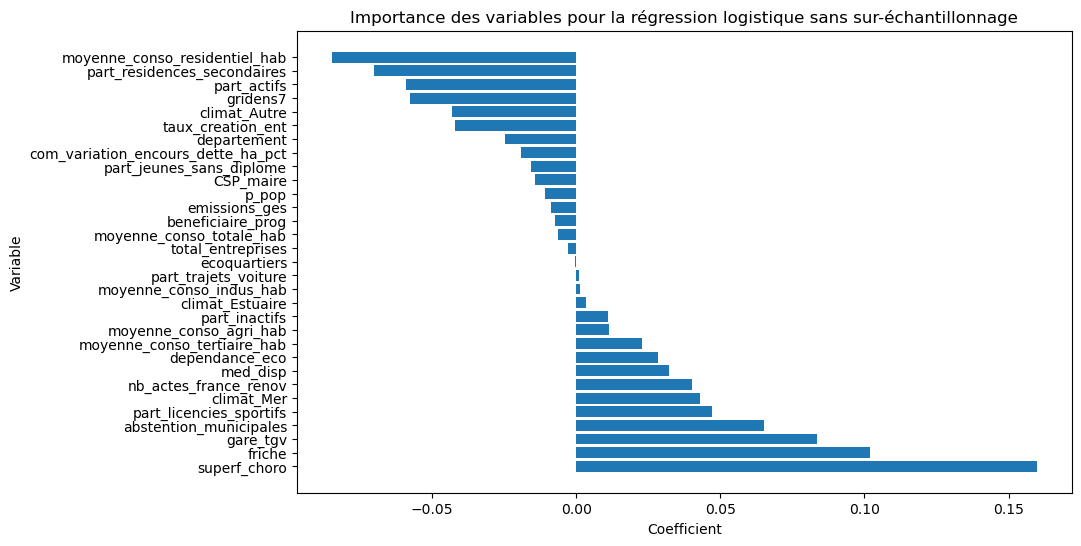

In [218]:
# Graphique pour l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_smote["Variable"], resultats_importance_variables_reg_log_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec SMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_oversampler["Variable"], resultats_importance_variables_reg_log_oversampler["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec RandomOverSampler")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_adasyn["Variable"], resultats_importance_variables_reg_log_adasyn["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec ADASYN")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_borderline_smote["Variable"], resultats_importance_variables_reg_log_borderline_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec BorderlineSMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log["Variable"], resultats_importance_variables_reg_log["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique sans sur-échantillonnage")
plt.show()

## I.2.3. Abres de décision

### A) Construction des modèles

In [219]:
# Construction du modèle d'arbres de décision avec rééquilibrage des classes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.pipeline import Pipeline

etapes_arbre_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbre_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors= 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbre_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbre_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbres = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

# Justification de max_depth=5 : pour éviter l'overfitting
# On a choisi la valeur 5 car c'est une valeur standard qui permet de ne pas trop complexifier l'arbre de décision

modele_arbre_oversampler = Pipeline(steps=etapes_arbre_oversampler) # Création du pipeline
modele_arbre_smote = Pipeline(steps=etapes_arbre_smote) # Création du pipeline
modele_arbre_adasyn = Pipeline(steps=etapes_arbre_adasyn) # Création du pipeline
modele_arbre_borderline_smote = Pipeline(steps=etapes_arbre_borderline_smote) # Création du pipeline
modele_arbre = Pipeline(steps=etapes_arbres) # Création du pipeline

In [220]:
modele_arbre_oversampler.fit(X_train, y_train) # Entraînement
modele_arbre_smote.fit(X_train, y_train) # Entraînement
modele_arbre_adasyn.fit(X_train, y_train) # Entraînement
modele_arbre_borderline_smote.fit(X_train, y_train) # Entraînement
modele_arbre.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('arbre', DecisionTreeClassifier(max_depth=5))])

In [221]:
# Prédictions

y_proba_arbre_oversampler = modele_arbre_oversampler.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler = modele_arbre_oversampler.predict(X_test)

y_proba_arbre_smote = modele_arbre_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_smote = modele_arbre_smote.predict(X_test)

y_proba_arbre_adasyn = modele_arbre_adasyn.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn = modele_arbre_adasyn.predict(X_test)

y_proba_arbre_borderline_smote = modele_arbre_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_borderline_smote = modele_arbre_borderline_smote.predict(X_test)

y_proba_arbre = modele_arbre.predict_proba(X_test)[:, 1]
y_pred_arbre = modele_arbre.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [222]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_arbre_oversampler = roc_auc_score(y_test, y_proba_arbre_oversampler)
auc_pr_arbre_oversampler = average_precision_score(y_test, y_proba_arbre_oversampler)
log_loss_value_arbre_oversampler = log_loss(y_test, y_proba_arbre_oversampler)
precision_arbre_oversampler = precision_score(y_test, y_pred_arbre_oversampler)
recall_arbre_oversampler = recall_score(y_test, y_pred_arbre_oversampler)
f1_arbre_oversampler = f1_score(y_test, y_pred_arbre_oversampler)
mcc_arbre_oversampler = matthews_corrcoef(y_test, y_pred_arbre_oversampler)
balanced_acc_arbre_oversampler = balanced_accuracy_score(y_test, y_pred_arbre_oversampler)
specificity_arbre_oversampler = confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 1])
cohen_kappa_arbre_oversampler = cohen_kappa_score(y_test, y_pred_arbre_oversampler)

In [223]:
auc_roc_arbre_smote = roc_auc_score(y_test, y_proba_arbre_smote)
auc_pr_arbre_smote = average_precision_score(y_test, y_proba_arbre_smote)
log_loss_value_arbre_smote = log_loss(y_test, y_proba_arbre_smote)
precision_arbre_smote = precision_score(y_test, y_pred_arbre_smote)
recall_arbre_smote = recall_score(y_test, y_pred_arbre_smote)
f1_arbre_smote = f1_score(y_test, y_pred_arbre_smote)
mcc_arbre_smote = matthews_corrcoef(y_test, y_pred_arbre_smote)
balanced_acc_arbre_smote = balanced_accuracy_score(y_test, y_pred_arbre_smote)
specificity_arbre_smote = confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote)[0, 1])
cohen_kappa_arbre_smote = cohen_kappa_score(y_test, y_pred_arbre_smote)

In [224]:
auc_roc_arbre_adasyn = roc_auc_score(y_test, y_proba_arbre_adasyn)
auc_pr_arbre_adasyn = average_precision_score(y_test, y_proba_arbre_adasyn)
log_loss_value_arbre_adasyn = log_loss(y_test, y_proba_arbre_adasyn)
precision_arbre_adasyn = precision_score(y_test, y_pred_arbre_adasyn)
recall_arbre_adasyn = recall_score(y_test, y_pred_arbre_adasyn)
f1_arbre_adasyn = f1_score(y_test, y_pred_arbre_adasyn)
mcc_arbre_adasyn = matthews_corrcoef(y_test, y_pred_arbre_adasyn)
balanced_acc_arbre_adasyn = balanced_accuracy_score(y_test, y_pred_arbre_adasyn)
specificity_arbre_adasyn = confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 1])
cohen_kappa_arbre_adasyn = cohen_kappa_score(y_test, y_pred_arbre_adasyn)

In [225]:
auc_roc_arbre_borderline_smote = roc_auc_score(y_test, y_proba_arbre_borderline_smote)
auc_pr_arbre_borderline_smote = average_precision_score(y_test, y_proba_arbre_borderline_smote)
log_loss_value_arbre_borderline_smote = log_loss(y_test, y_proba_arbre_borderline_smote)
precision_arbre_borderline_smote = precision_score(y_test, y_pred_arbre_borderline_smote)
recall_arbre_borderline_smote = recall_score(y_test, y_pred_arbre_borderline_smote)
f1_arbre_borderline_smote = f1_score(y_test, y_pred_arbre_borderline_smote)
mcc_arbre_borderline_smote = matthews_corrcoef(y_test, y_pred_arbre_borderline_smote)
balanced_acc_arbre_borderline_smote = balanced_accuracy_score(y_test, y_pred_arbre_borderline_smote)
specificity_arbre_borderline_smote = confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_borderline_smote)[0, 1])
cohen_kappa_arbre_borderline_smote = cohen_kappa_score(y_test, y_pred_arbre_borderline_smote)

In [226]:
auc_roc_arbre = roc_auc_score(y_test, y_proba_arbre)
auc_pr_arbre = average_precision_score(y_test, y_proba_arbre)
log_loss_value_arbre = log_loss(y_test, y_proba_arbre)
precision_arbre = precision_score(y_test, y_pred_arbre)
recall_arbre = recall_score(y_test, y_pred_arbre)
f1_arbre = f1_score(y_test, y_pred_arbre)
mcc_arbre = matthews_corrcoef(y_test, y_pred_arbre)
balanced_acc_arbre = balanced_accuracy_score(y_test, y_pred_arbre)
specificity_arbre = confusion_matrix(y_test, y_pred_arbre)[0, 0] / (confusion_matrix(y_test, y_pred_arbre)[0, 0] + confusion_matrix(y_test, y_pred_arbre)[0, 1])
cohen_kappa_arbre = cohen_kappa_score(y_test, y_pred_arbre)

In [227]:
# Affichage des résultats
resultats_arbres = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre, auc_pr_arbre, log_loss_value_arbre, f1_arbre, mcc_arbre, balanced_acc_arbre, specificity_arbre, cohen_kappa_arbre],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote, auc_pr_arbre_smote, log_loss_value_arbre_smote, f1_arbre_smote, mcc_arbre_smote, balanced_acc_arbre_smote, specificity_arbre_smote, cohen_kappa_arbre_smote],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler, auc_pr_arbre_oversampler, log_loss_value_arbre_oversampler, f1_arbre_oversampler, mcc_arbre_oversampler, balanced_acc_arbre_oversampler, specificity_arbre_oversampler, cohen_kappa_arbre_oversampler],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn, auc_pr_arbre_adasyn, log_loss_value_arbre_adasyn, f1_arbre_adasyn, mcc_arbre_adasyn, balanced_acc_arbre_adasyn, specificity_arbre_adasyn, cohen_kappa_arbre_adasyn],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_borderline_smote, auc_pr_arbre_borderline_smote, log_loss_value_arbre_borderline_smote, f1_arbre_borderline_smote, mcc_arbre_borderline_smote, balanced_acc_arbre_borderline_smote, specificity_arbre_borderline_smote, cohen_kappa_arbre_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres = resultats_arbres.round(3)
resultats_arbres

Arbre de décision sans sur-échantillonnage  \
AUC-ROC                                           0.662   
AUC-PR                                            0.262   
Log loss                                          1.631   
F1                                                0.077   
MCC                                               0.013   
Accuracy                                          0.503   
Spécificité                                       0.959   
Kappa                                             0.010   

             Arbre de décision avec SMOTE  \
AUC-ROC                             0.648   
AUC-PR                              0.260   
Log loss                            1.474   
F1                                  0.349   
MCC                                 0.158   
Accuracy                            0.603   
Spécificité                         0.587   
Kappa                               0.128   

             Arbre de décision avec RandomOverSampler  \
AUC-ROC                                         0.632   
AUC-PR                                          0.252   
Log loss                                        0.969   
F1                                              0.250   
MCC                                             0.099   
Accuracy                                        0.548   
Spécificité                                     0.857   
Kappa                                           0.099   

             Arbre de décision avec ADASYN  \
AUC-ROC                              0.623   
AUC-PR                               0.222   
Log loss                             0.850   
F1                                   0.302   
MCC                                  0.096   
Accuracy                             0.560   
Spécificité                          0.668   
Kappa                                0.087   

             Arbre de décision avec BorderlineSMOTE  
AUC-ROC                                       0.666  
AUC-PR                                        0.292  
Log loss                                      1.170  
F1                                            0.358  
MCC                                           0.176  
Accuracy                                      0.612  
Spécificité                                   0.653  
Kappa                                         0.153

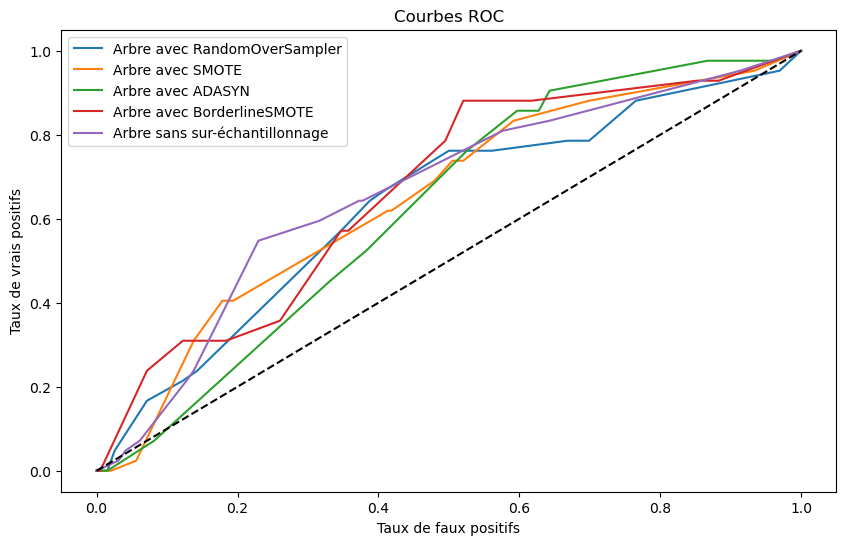

In [228]:
# Tracé des courbes ROC

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_arbre_oversampler, tpr_arbre_oversampler, _ = roc_curve(y_test, y_proba_arbre_oversampler)
fpr_arbre_smote, tpr_arbre_smote, _ = roc_curve(y_test, y_proba_arbre_smote)
fpr_arbre_adasyn, tpr_arbre_adasyn, _ = roc_curve(y_test, y_proba_arbre_adasyn)
fpr_arbre_borderline_smote, tpr_arbre_borderline_smote, _ = roc_curve(y_test, y_proba_arbre_borderline_smote)
fpr_arbre, tpr_arbre, _ = roc_curve(y_test, y_proba_arbre)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler, tpr_arbre_oversampler, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote, tpr_arbre_smote, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn, tpr_arbre_adasyn, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_borderline_smote, tpr_arbre_borderline_smote, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre, tpr_arbre, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### C) Ajustement des hyperparamètres

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, cohen_kappa_score

# Définition de la grille des hyperparamètres pour l'arbre de décision
param_grid_arbres_oversampler = {
    'oversampler__sampling_strategy': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], # Stratégie de sur-échantillonnage: 
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], # Critère d'impureté
    'arbre__max_depth': range(3, 32, 3),  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

param_grid_arbres_smote = {
    'smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins à considérer pour la construction des échantillons synthétiques
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], # Critère d'impureté
    'arbre__max_depth': range(3, 32, 3),  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

param_grid_arbres_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7, 9], # Nombre de voisins à considérer pour la construction des échantillons synthétiques
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], # Critère d'impureté
    'arbre__max_depth': range(3, 32, 3),  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

param_grid_arbres_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins à considérer pour la construction des échantillons synthétiques
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], # Critère d'impureté
    'arbre__max_depth': range(3, 32, 3),  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

param_grid_arbres = {
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], # Critère d'impureté
    'arbre__max_depth': range(3, 32, 3),  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Kappa' : make_scorer(cohen_kappa_score),
    'AUC': 'roc_auc'
}


# Justification de l'optimisation des hyperparamètres

# max_depth : pour éviter l'overfitting, on cherche à limiter la profondeur de l'arbre
# Profondeur Minimale : 3 (pour permettre à l'arbre de commencer à capturer les interactions entre variables)
# Profondeur Maximale : Min(2 * nombre de variables utilisables, nombre total de variables), donc dans ce cas, min(2 * 31, 31) = 31. Cela suppose que chaque variable pourrait être utilisée au maximum deux fois dans le chemin le plus long, mais cela reste une heuristique.
# Pas : 3 ou 5 pour commencer, puis affiner en fonction des résultats obtenus.

In [230]:
# Ajustement des hyperparamètres

grille_recherche_arbre_oversampler = GridSearchCV(modele_arbre_oversampler, param_grid_arbres_oversampler, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_arbre_smote = GridSearchCV(modele_arbre_smote, param_grid_arbres_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_arbre_adasyn = GridSearchCV(modele_arbre_adasyn, param_grid_arbres_adasyn, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_arbre_borderline_smote = GridSearchCV(modele_arbre_borderline_smote, param_grid_arbres_borderline_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_arbre = GridSearchCV(modele_arbre, param_grid_arbres, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)

In [231]:
modele_arbre_oversampler_opt = grille_recherche_arbre_oversampler.fit(X_train, y_train).best_estimator_ 

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4500 fits failed out of a total of 20250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._

In [233]:
modele_arbre_smote_opt = grille_recherche_arbre_smote.fit(X_train, y_train).best_estimator_

In [234]:
modele_arbre_adasyn_opt = grille_recherche_arbre_adasyn.fit(X_train, y_train).best_estimator_

In [235]:
modele_arbre_borderline_smote_opt = grille_recherche_arbre_borderline_smote.fit(X_train, y_train).best_estimator_

In [236]:
modele_arbre_opt = grille_recherche_arbre.fit(X_train, y_train).best_estimator_

In [237]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_arbre_oversampler_cv = modele_arbre_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler_cv = modele_arbre_oversampler_opt.predict(X_test)

y_proba_arbre_smote_cv = modele_arbre_smote_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_smote_cv = modele_arbre_smote_opt.predict(X_test)

y_proba_arbre_adasyn_cv = modele_arbre_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn_cv = modele_arbre_adasyn_opt.predict(X_test)

y_proba_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_borderline_smote_cv = modele_arbre_borderline_smote_opt.predict(X_test)

y_proba_arbre_cv = modele_arbre_opt.predict_proba(X_test)[:, 1]
y_pred_arbre_cv = modele_arbre_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [238]:
# Mesure de la performance

# Calcul des métriques
auc_roc_arbre_oversampler_cv = roc_auc_score(y_test, y_proba_arbre_oversampler_cv)
auc_pr_arbre_oversampler_cv = average_precision_score(y_test, y_proba_arbre_oversampler_cv)
log_loss_value_arbre_oversampler_cv = log_loss(y_test, y_proba_arbre_oversampler_cv)
precision_arbre_oversampler_cv = precision_score(y_test, y_pred_arbre_oversampler_cv)
recall_arbre_oversampler_cv = recall_score(y_test, y_pred_arbre_oversampler_cv)
f1_arbre_oversampler_cv = f1_score(y_test, y_pred_arbre_oversampler_cv)
mcc_arbre_oversampler_cv = matthews_corrcoef(y_test, y_pred_arbre_oversampler_cv)
balanced_acc_arbre_oversampler_cv = balanced_accuracy_score(y_test, y_pred_arbre_oversampler_cv)
specificity_arbre_oversampler_cv = confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler_cv)[0, 1])
cohen_kappa_arbre_oversampler_cv = cohen_kappa_score(y_test, y_pred_arbre_oversampler_cv)

auc_roc_arbre_smote_cv = roc_auc_score(y_test, y_proba_arbre_smote_cv)
auc_pr_arbre_smote_cv = average_precision_score(y_test, y_proba_arbre_smote_cv)
log_loss_value_arbre_smote_cv = log_loss(y_test, y_proba_arbre_smote_cv)
precision_arbre_smote_cv = precision_score(y_test, y_pred_arbre_smote_cv)
recall_arbre_smote_cv = recall_score(y_test, y_pred_arbre_smote_cv)
f1_arbre_smote_cv = f1_score(y_test, y_pred_arbre_smote_cv)
mcc_arbre_smote_cv = matthews_corrcoef(y_test, y_pred_arbre_smote_cv)
specificity_arbre_smote_cv = confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote_cv)[0, 1])
balanced_acc_arbre_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_smote_cv)
cohen_kappa_arbre_smote_cv = cohen_kappa_score(y_test, y_pred_arbre_smote_cv)

auc_roc_arbre_adasyn_cv = roc_auc_score(y_test, y_proba_arbre_adasyn_cv)
auc_pr_arbre_adasyn_cv = average_precision_score(y_test, y_proba_arbre_adasyn_cv)
log_loss_value_arbre_adasyn_cv = log_loss(y_test, y_proba_arbre_adasyn_cv)
precision_arbre_adasyn_cv = precision_score(y_test, y_pred_arbre_adasyn_cv)
recall_arbre_adasyn_cv = recall_score(y_test, y_pred_arbre_adasyn_cv)
f1_arbre_adasyn_cv = f1_score(y_test, y_pred_arbre_adasyn_cv)
mcc_arbre_adasyn_cv = matthews_corrcoef(y_test, y_pred_arbre_adasyn_cv)
balanced_acc_arbre_adasyn_cv = balanced_accuracy_score(y_test, y_pred_arbre_adasyn_cv)
specificity_arbre_adasyn_cv = confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn_cv)[0, 1])
cohen_kappa_arbre_adasyn_cv = cohen_kappa_score(y_test, y_pred_arbre_adasyn_cv)

auc_roc_arbre_borderline_smote_cv = roc_auc_score(y_test, y_proba_arbre_borderline_smote_cv)
auc_pr_arbre_borderline_smote_cv = average_precision_score(y_test, y_proba_arbre_borderline_smote_cv)
log_loss_value_arbre_borderline_smote_cv = log_loss(y_test, y_proba_arbre_borderline_smote_cv)
precision_arbre_borderline_smote_cv = precision_score(y_test, y_pred_arbre_borderline_smote_cv)
recall_arbre_borderline_smote_cv = recall_score(y_test, y_pred_arbre_borderline_smote_cv)
f1_arbre_borderline_smote_cv = f1_score(y_test, y_pred_arbre_borderline_smote_cv)
mcc_arbre_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_arbre_borderline_smote_cv)
balanced_acc_arbre_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_borderline_smote_cv)
specificity_arbre_borderline_smote_cv = confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_borderline_smote_cv)[0, 1])
cohens_kappa_arbre_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_arbre_borderline_smote_cv)

auc_roc_arbre_cv = roc_auc_score(y_test, y_proba_arbre_cv)
auc_pr_arbre_cv = average_precision_score(y_test, y_proba_arbre_cv)
log_loss_value_arbre_cv = log_loss(y_test, y_proba_arbre_cv)
precision_arbre_cv = precision_score(y_test, y_pred_arbre_cv)
recall_arbre_cv = recall_score(y_test, y_pred_arbre_cv)
f1_arbre_cv = f1_score(y_test, y_pred_arbre_cv)
mcc_arbre_cv = matthews_corrcoef(y_test, y_pred_arbre_cv)
balanced_acc_arbre_cv = balanced_accuracy_score(y_test, y_pred_arbre_cv)
specificity_arbre_cv = confusion_matrix(y_test, y_pred_arbre_cv)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_cv)[0, 0] + confusion_matrix(y_test, y_pred_arbre_cv)[0, 1])
cohen_kappa_arbre_cv = cohen_kappa_score(y_test, y_pred_arbre_cv)

In [321]:
# Affichage des résultats

resultats_arbres_cv = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre_cv, auc_pr_arbre_cv, log_loss_value_arbre_cv, f1_arbre_cv, mcc_arbre_cv, balanced_acc_arbre_cv, specificity_arbre_cv, cohen_kappa_arbre_cv],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote_cv, auc_pr_arbre_smote_cv, log_loss_value_arbre_smote_cv, f1_arbre_smote_cv, mcc_arbre_smote_cv, balanced_acc_arbre_smote_cv, specificity_arbre_smote_cv, cohen_kappa_arbre_smote_cv],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler_cv, auc_pr_arbre_oversampler_cv, log_loss_value_arbre_oversampler_cv, f1_arbre_oversampler_cv, mcc_arbre_oversampler_cv, balanced_acc_arbre_oversampler_cv, specificity_arbre_oversampler_cv, cohen_kappa_arbre_oversampler_cv],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn_cv, auc_pr_arbre_adasyn_cv, log_loss_value_arbre_adasyn_cv, f1_arbre_adasyn_cv, mcc_arbre_adasyn_cv, balanced_acc_arbre_adasyn_cv, specificity_arbre_adasyn_cv, cohen_kappa_arbre_adasyn_cv],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_borderline_smote_cv, auc_pr_arbre_borderline_smote_cv, log_loss_value_arbre_borderline_smote_cv, f1_arbre_borderline_smote_cv, mcc_arbre_borderline_smote_cv, balanced_acc_arbre_borderline_smote_cv, specificity_arbre_borderline_smote_cv, cohens_kappa_arbre_borderline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres_cv = resultats_arbres_cv.round(3)

resultats_arbres_cv

# Export
resultats_arbres_cv.to_csv("resultats_arbres_opt.csv", index=True)
latex_table_arbres = resultats_arbres_cv.to_latex(index=True)
print(latex_table_arbres)


\begin{tabular}{lrrrrr}
\toprule
 & Arbre de décision sans sur-échantillonnage & Arbre de décision avec SMOTE & Arbre de décision avec RandomOverSampler & Arbre de décision avec ADASYN & Arbre de décision avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.681000 & 0.578000 & 0.668000 & 0.643000 & 0.637000 \\
AUC-PR & 0.290000 & 0.205000 & 0.261000 & 0.241000 & 0.261000 \\
Log loss & 0.438000 & 2.763000 & 0.922000 & 1.266000 & 1.718000 \\
F1 & 0.000000 & 0.238000 & 0.411000 & 0.353000 & 0.358000 \\
MCC & -0.030000 & 0.041000 & 0.258000 & 0.175000 & 0.192000 \\
Accuracy & 0.497000 & 0.523000 & 0.667000 & 0.607000 & 0.611000 \\
Spécificité & 0.995000 & 0.760000 & 0.643000 & 0.714000 & 0.770000 \\
Kappa & -0.008000 & 0.040000 & 0.217000 & 0.161000 & 0.185000 \\
\bottomrule
\end{tabular}



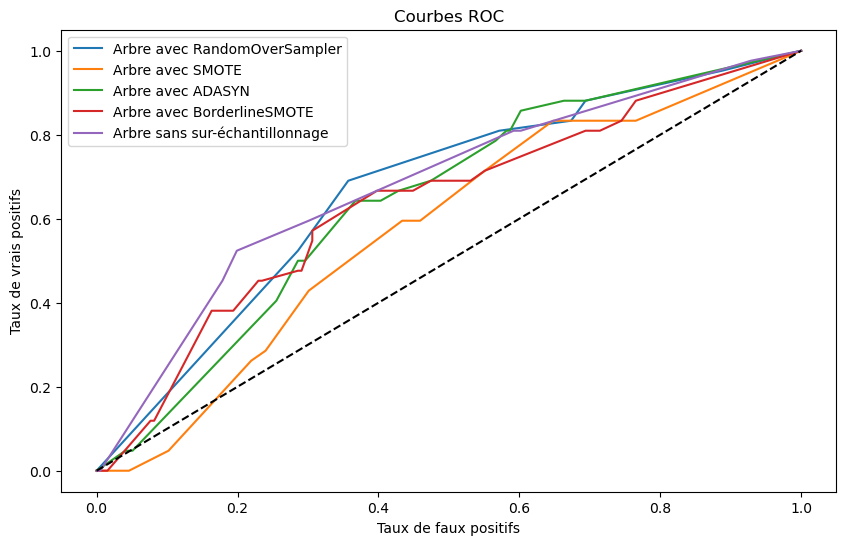

In [240]:
# Comparaison des courbes ROC

fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, _ = roc_curve(y_test, y_proba_arbre_oversampler_cv)
fpr_arbre_smote_cv, tpr_arbre_smote_cv, _ = roc_curve(y_test, y_proba_arbre_smote_cv)
fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, _ = roc_curve(y_test, y_proba_arbre_adasyn_cv)
fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, _ = roc_curve(y_test, y_proba_arbre_borderline_smote_cv)
fpr_arbre_cv, tpr_arbre_cv, _ = roc_curve(y_test, y_proba_arbre_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote_cv, tpr_arbre_smote_cv, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_borderline_smote_cv, tpr_arbre_borderline_smote_cv, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre_cv, tpr_arbre_cv, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### E) Importance des variables

In [241]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_arbre_oversampler = modele_arbre_oversampler_opt.named_steps['arbre'].feature_importances_
importances_arbre_smote = modele_arbre_smote_opt.named_steps['arbre'].feature_importances_
importances_arbre_adasyn = modele_arbre_adasyn_opt.named_steps['arbre'].feature_importances_
importances_arbre_borderline_smote = modele_arbre_borderline_smote_opt.named_steps['arbre'].feature_importances_
importances_arbre = modele_arbre_opt.named_steps['arbre'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_arbre_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_oversampler
})

resultats_importance_variables_arbre_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_smote
})

resultats_importance_variables_arbre_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_adasyn
})

resultats_importance_variables_arbre_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_borderline_smote
})

resultats_importance_variables_arbre = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre
})

# Affichage des résultats
resultats_importance_variables_arbre_oversampler = resultats_importance_variables_arbre_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_smote = resultats_importance_variables_arbre_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_adasyn = resultats_importance_variables_arbre_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_borderline_smote = resultats_importance_variables_arbre_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre = resultats_importance_variables_arbre.sort_values(by="Importance", ascending=False)

resultats_importance_variables_arbre_oversampler

Variable  Importance
25                   total_entreprises    0.360883
19  com_variation_encours_dette_ha_pct    0.130574
26             part_licencies_sportifs    0.110695
12                        superf_choro    0.103921
16                            med_disp    0.101085
24                   taux_creation_ent    0.100261
6                nb_actes_france_renov    0.092580
27            part_jeunes_sans_diplome    0.000000
17                               p_pop    0.000000
23              abstention_municipales    0.000000
22                      dependance_eco    0.000000
21                         part_actifs    0.000000
28                        climat_Autre    0.000000
20                       part_inactifs    0.000000
29                     climat_Estuaire    0.000000
18                           CSP_maire    0.000000
0               moyenne_conso_agri_hab    0.000000
15                part_trajets_voiture    0.000000
1              moyenne_conso_indus_hab    0.000000
14                            gare_tgv    0.000000
13                         departement    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
9          part_residences_secondaires    0.000000
8                         ecoquartiers    0.000000
7                               friche    0.000000
5                        emissions_ges    0.000000
4             moyenne_conso_totale_hab    0.000000
3        moyenne_conso_residentiel_hab    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
30                          climat_Mer    0.000000

In [242]:
resultats_importance_variables_arbre_smote

Variable  Importance
7                               friche    0.386455
1              moyenne_conso_indus_hab    0.178615
17                               p_pop    0.082536
13                         departement    0.063375
23              abstention_municipales    0.053290
9          part_residences_secondaires    0.036066
20                       part_inactifs    0.033131
15                part_trajets_voiture    0.029376
24                   taux_creation_ent    0.027575
19  com_variation_encours_dette_ha_pct    0.024211
4             moyenne_conso_totale_hab    0.020637
26             part_licencies_sportifs    0.020164
2          moyenne_conso_tertiaire_hab    0.016761
27            part_jeunes_sans_diplome    0.010642
14                            gare_tgv    0.008148
22                      dependance_eco    0.004986
16                            med_disp    0.003118
5                        emissions_ges    0.000913
28                        climat_Autre    0.000000
25                   total_entreprises    0.000000
29                     climat_Estuaire    0.000000
0               moyenne_conso_agri_hab    0.000000
21                         part_actifs    0.000000
18                           CSP_maire    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
6                nb_actes_france_renov    0.000000
3        moyenne_conso_residentiel_hab    0.000000
30                          climat_Mer    0.000000

In [243]:
resultats_importance_variables_arbre_adasyn

Variable  Importance
7                               friche    0.440207
1              moyenne_conso_indus_hab    0.182243
13                         departement    0.120179
9          part_residences_secondaires    0.061279
6                nb_actes_france_renov    0.058528
24                   taux_creation_ent    0.023703
20                       part_inactifs    0.020355
27            part_jeunes_sans_diplome    0.016450
23              abstention_municipales    0.013591
26             part_licencies_sportifs    0.013511
29                     climat_Estuaire    0.011820
19  com_variation_encours_dette_ha_pct    0.011571
15                part_trajets_voiture    0.009105
3        moyenne_conso_residentiel_hab    0.005561
25                   total_entreprises    0.005440
16                            med_disp    0.004512
28                        climat_Autre    0.001596
22                      dependance_eco    0.000348
21                         part_actifs    0.000000
0               moyenne_conso_agri_hab    0.000000
18                           CSP_maire    0.000000
17                               p_pop    0.000000
14                            gare_tgv    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
5                        emissions_ges    0.000000
4             moyenne_conso_totale_hab    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
30                          climat_Mer    0.000000

In [244]:
resultats_importance_variables_arbre_borderline_smote

Variable  Importance
7                               friche    0.427914
13                         departement    0.167703
1              moyenne_conso_indus_hab    0.079444
17                               p_pop    0.071717
19  com_variation_encours_dette_ha_pct    0.052781
26             part_licencies_sportifs    0.050587
24                   taux_creation_ent    0.048942
27            part_jeunes_sans_diplome    0.025027
20                       part_inactifs    0.024043
5                        emissions_ges    0.017803
21                         part_actifs    0.011835
22                      dependance_eco    0.007727
2          moyenne_conso_tertiaire_hab    0.006064
16                            med_disp    0.004357
23              abstention_municipales    0.003238
4             moyenne_conso_totale_hab    0.000820
0               moyenne_conso_agri_hab    0.000000
28                        climat_Autre    0.000000
29                     climat_Estuaire    0.000000
25                   total_entreprises    0.000000
15                part_trajets_voiture    0.000000
18                           CSP_maire    0.000000
14                            gare_tgv    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
9          part_residences_secondaires    0.000000
8                         ecoquartiers    0.000000
6                nb_actes_france_renov    0.000000
3        moyenne_conso_residentiel_hab    0.000000
30                          climat_Mer    0.000000

In [245]:
resultats_importance_variables_arbre

Variable  Importance
25                   total_entreprises    0.420797
6                nb_actes_france_renov    0.134075
4             moyenne_conso_totale_hab    0.114981
17                               p_pop    0.091019
16                            med_disp    0.087706
26             part_licencies_sportifs    0.081773
19  com_variation_encours_dette_ha_pct    0.069648
27            part_jeunes_sans_diplome    0.000000
28                        climat_Autre    0.000000
29                     climat_Estuaire    0.000000
24                   taux_creation_ent    0.000000
23              abstention_municipales    0.000000
22                      dependance_eco    0.000000
21                         part_actifs    0.000000
20                       part_inactifs    0.000000
18                           CSP_maire    0.000000
0               moyenne_conso_agri_hab    0.000000
15                part_trajets_voiture    0.000000
1              moyenne_conso_indus_hab    0.000000
14                            gare_tgv    0.000000
13                         departement    0.000000
12                        superf_choro    0.000000
11                            gridens7    0.000000
10                   beneficiaire_prog    0.000000
9          part_residences_secondaires    0.000000
8                         ecoquartiers    0.000000
7                               friche    0.000000
5                        emissions_ges    0.000000
3        moyenne_conso_residentiel_hab    0.000000
2          moyenne_conso_tertiaire_hab    0.000000
30                          climat_Mer    0.000000

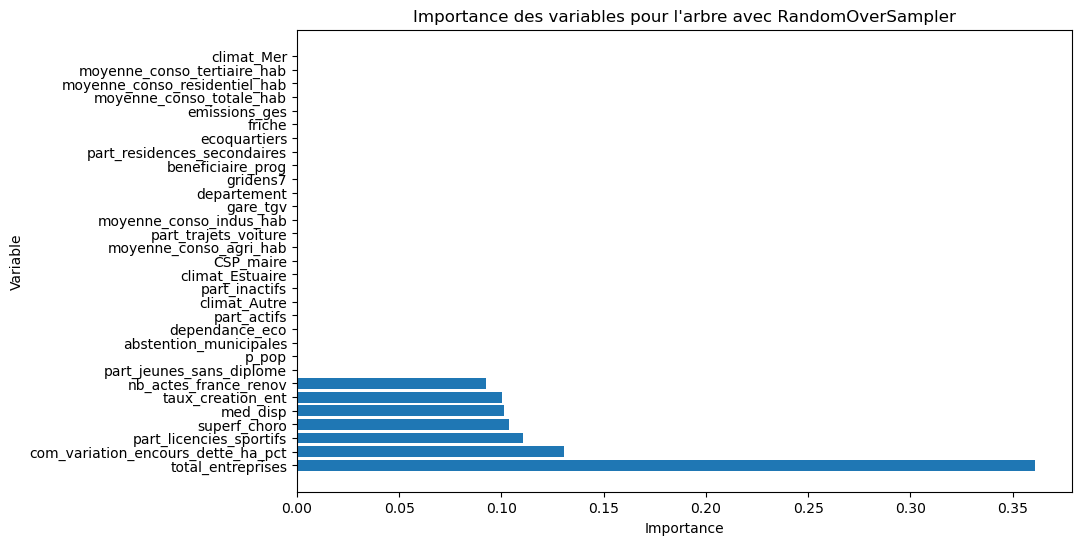

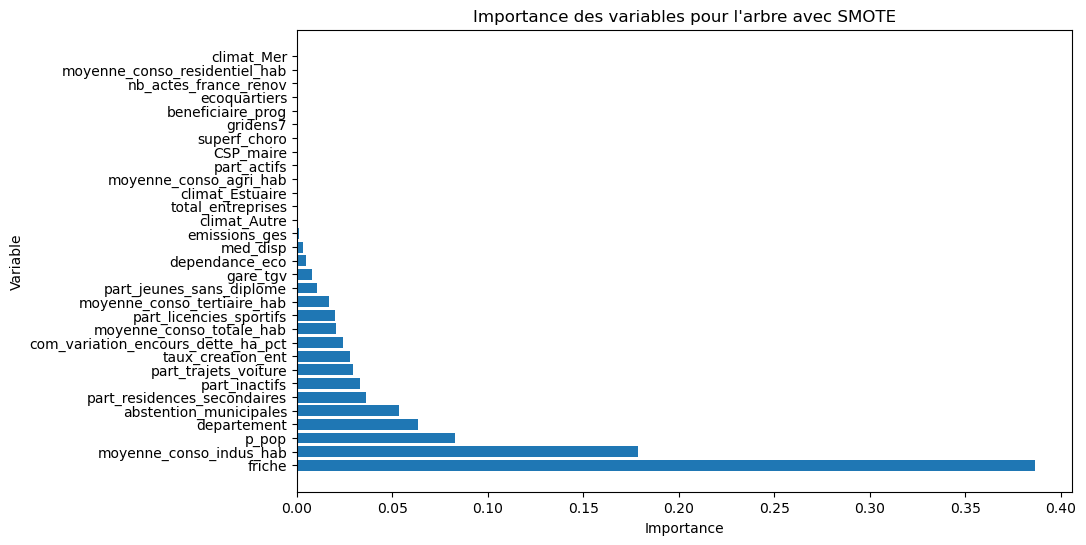

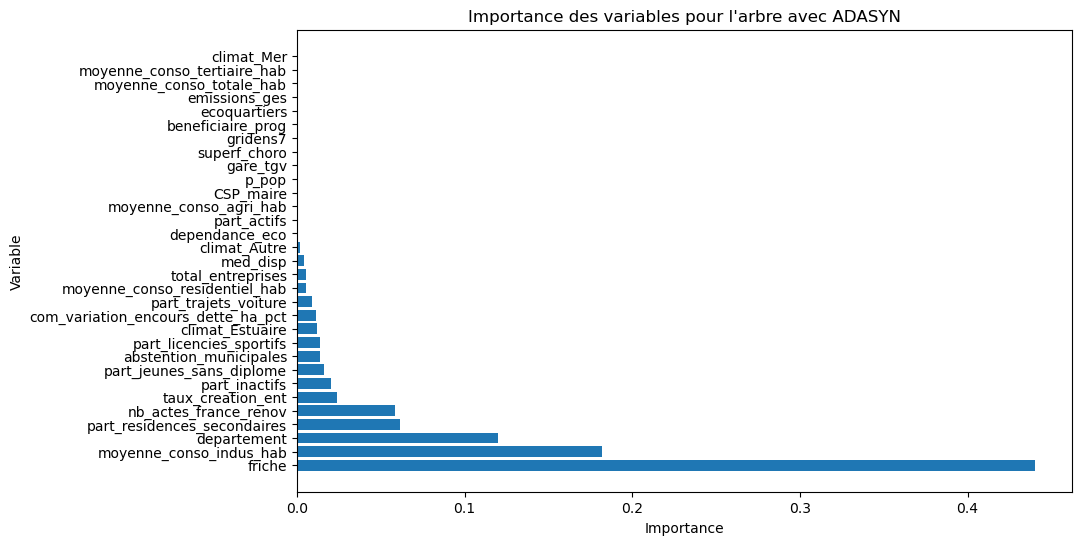

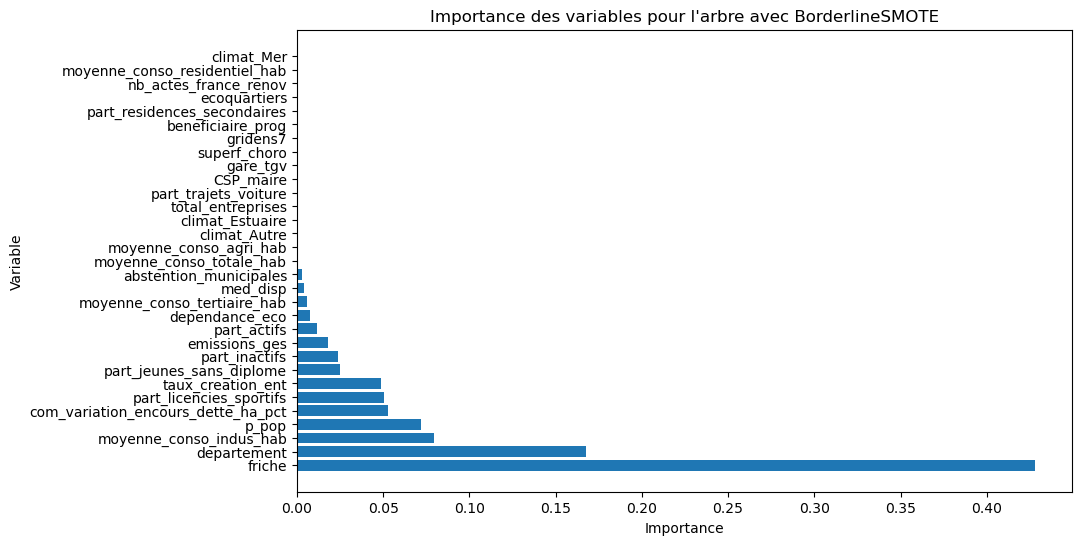

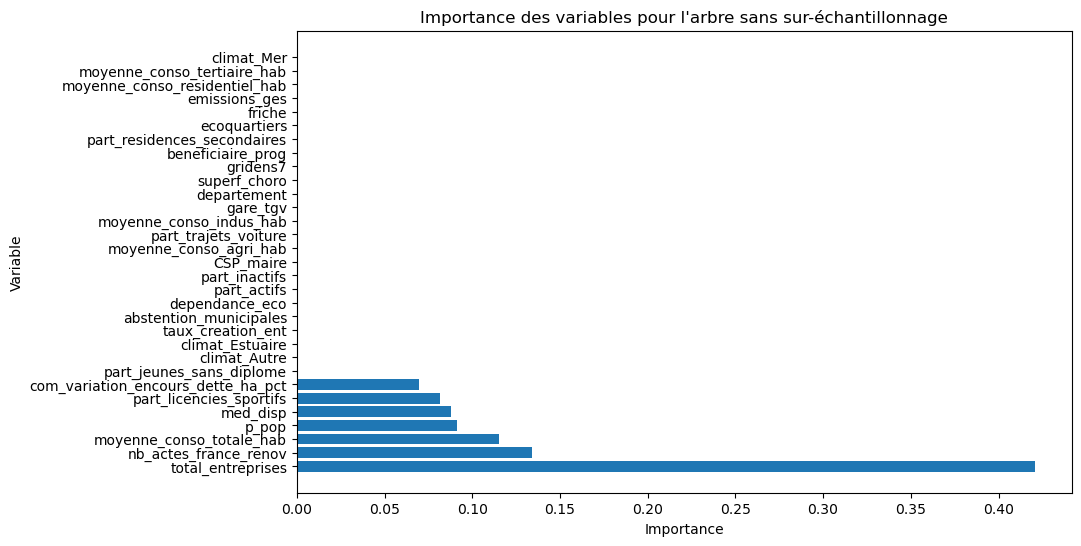

In [246]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_oversampler['Variable'], resultats_importance_variables_arbre_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_smote['Variable'], resultats_importance_variables_arbre_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_adasyn['Variable'], resultats_importance_variables_arbre_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_borderline_smote['Variable'], resultats_importance_variables_arbre_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre['Variable'], resultats_importance_variables_arbre['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre sans sur-échantillonnage')
plt.show()

## I.2.4. Forêts Aléatoires

### A) Construction des modèles

In [247]:
# Construction du modèle de forêts aléatoires avec rééquilibrage des classes

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

etapes_rf_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('rf', RandomForestClassifier())
        ]

etapes_rf_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('rf', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('rf', RandomForestClassifier()) # Forets aléatoires
        ]


modele_rf_oversampler = Pipeline(steps=etapes_rf_oversampler) # Création du pipeline
modele_rf_smote = Pipeline(steps=etapes_rf_smote) # Création du pipeline
modele_rf_adasyn = Pipeline(steps=etapes_rf_adasyn) # Création du pipeline
modele_rf_borderline_smote = Pipeline(steps=etapes_rf_borderline_smote) # Création du pipeline
modele_rf = Pipeline(steps=etapes_rf) # Création du pipeline

modele_rf_oversampler.fit(X_train, y_train) # Entraînement
modele_rf_smote.fit(X_train, y_train) # Entraînement
modele_rf_adasyn.fit(X_train, y_train) # Entraînement
modele_rf_borderline_smote.fit(X_train, y_train) # Entraînement
modele_rf.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf', RandomForestClassifier())])

In [248]:
# Prédictions

y_proba_rf_oversampler = modele_rf_oversampler.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler = modele_rf_oversampler.predict(X_test)

y_proba_rf_smote = modele_rf_smote.predict_proba(X_test)[:, 1]
y_pred_rf_smote = modele_rf_smote.predict(X_test)

y_proba_rf_adasyn = modele_rf_adasyn.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn = modele_rf_adasyn.predict(X_test)

y_proba_rf_borderline_smote = modele_rf_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_rf_borderline_smote = modele_rf_borderline_smote.predict(X_test)

y_proba_rf = modele_rf.predict_proba(X_test)[:, 1]
y_pred_rf = modele_rf.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [249]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_rf_oversampler = roc_auc_score(y_test, y_proba_rf_oversampler)
auc_pr_rf_oversampler = average_precision_score(y_test, y_proba_rf_oversampler)
log_loss_value_rf_oversampler = log_loss(y_test, y_proba_rf_oversampler)
precision_rf_oversampler = precision_score(y_test, y_pred_rf_oversampler)
recall_rf_oversampler = recall_score(y_test, y_pred_rf_oversampler)
f1_rf_oversampler = f1_score(y_test, y_pred_rf_oversampler)
mcc_rf_oversampler = matthews_corrcoef(y_test, y_pred_rf_oversampler)
balanced_acc_rf_oversampler = balanced_accuracy_score(y_test, y_pred_rf_oversampler)
specificity_rf_oversampler = confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_rf_oversampler)[0, 1])
cohen_kappa_rf_oversampler = cohen_kappa_score(y_test, y_pred_rf_oversampler)

auc_roc_rf_smote = roc_auc_score(y_test, y_proba_rf_smote)
auc_pr_rf_smote = average_precision_score(y_test, y_proba_rf_smote)
log_loss_value_rf_smote = log_loss(y_test, y_proba_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote)
mcc_rf_smote = matthews_corrcoef(y_test, y_pred_rf_smote)
balanced_acc_rf_smote = balanced_accuracy_score(y_test, y_pred_rf_smote)
specificity_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_smote)[0, 1])
cohen_kappa_rf_smote = cohen_kappa_score(y_test, y_pred_rf_smote)

auc_roc_rf_adasyn = roc_auc_score(y_test, y_proba_rf_adasyn)
auc_pr_rf_adasyn = average_precision_score(y_test, y_proba_rf_adasyn)
log_loss_value_rf_adasyn = log_loss(y_test, y_proba_rf_adasyn)
precision_rf_adasyn = precision_score(y_test, y_pred_rf_adasyn)
recall_rf_adasyn = recall_score(y_test, y_pred_rf_adasyn)
f1_rf_adasyn = f1_score(y_test, y_pred_rf_adasyn)
mcc_rf_adasyn = matthews_corrcoef(y_test, y_pred_rf_adasyn)
balanced_acc_rf_adasyn = balanced_accuracy_score(y_test, y_pred_rf_adasyn)
specificity_rf_adasyn = confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_rf_adasyn)[0, 1])
cohen_kappa_rf_adasyn = cohen_kappa_score(y_test, y_pred_rf_adasyn)

auc_roc_rf_borderline_smote = roc_auc_score(y_test, y_proba_rf_borderline_smote)
auc_pr_rf_borderline_smote = average_precision_score(y_test, y_proba_rf_borderline_smote)
log_loss_value_rf_borderline_smote = log_loss(y_test, y_proba_rf_borderline_smote)
precision_rf_borderline_smote = precision_score(y_test, y_pred_rf_borderline_smote)
recall_rf_borderline_smote = recall_score(y_test, y_pred_rf_borderline_smote)
f1_rf_borderline_smote = f1_score(y_test, y_pred_rf_borderline_smote)
mcc_rf_borderline_smote = matthews_corrcoef(y_test, y_pred_rf_borderline_smote)
balanced_acc_rf_borderline_smote = balanced_accuracy_score(y_test, y_pred_rf_borderline_smote)
specificity_rf_borderline_smote = confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_borderline_smote)[0, 1])
cohen_kappa_rf_borderline_smote = cohen_kappa_score(y_test, y_pred_rf_borderline_smote)

auc_roc_rf = roc_auc_score(y_test, y_proba_rf)
auc_pr_rf = average_precision_score(y_test, y_proba_rf)
log_loss_value_rf = log_loss(y_test, y_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
specificity_rf = confusion_matrix(y_test, y_pred_rf)[0, 0] / (confusion_matrix(y_test, y_pred_rf)[0, 0] + confusion_matrix(y_test, y_pred_rf)[0, 1])
cohen_kappa_rf = cohen_kappa_score(y_test, y_pred_rf)

In [250]:
# Affichage des résultats

resultats_rf = pd.DataFrame({
    "Random Forest sans sur-échantillonnage": [auc_roc_rf, auc_pr_rf, log_loss_value_rf, f1_rf, mcc_rf, balanced_acc_rf, specificity_rf, cohen_kappa_rf],
    "Random Forest avec SMOTE": [auc_roc_rf_smote, auc_pr_rf_smote, log_loss_value_rf_smote, f1_rf_smote, mcc_rf_smote, balanced_acc_rf_smote, specificity_rf_smote, cohen_kappa_rf_smote],
    "Random Forest avec RandomOverSampler": [auc_roc_rf_oversampler, auc_pr_rf_oversampler, log_loss_value_rf_oversampler, f1_rf_oversampler, mcc_rf_oversampler, balanced_acc_rf_oversampler, specificity_rf_oversampler, cohen_kappa_rf_oversampler],
    "Random Forest avec ADASYN": [auc_roc_rf_adasyn, auc_pr_rf_adasyn, log_loss_value_rf_adasyn, f1_rf_adasyn, mcc_rf_adasyn, balanced_acc_rf_adasyn, specificity_rf_adasyn, cohen_kappa_rf_adasyn],
    "Random Forest avec BorderlineSMOTE": [auc_roc_rf_borderline_smote, auc_pr_rf_borderline_smote, log_loss_value_rf_borderline_smote, f1_rf_borderline_smote, mcc_rf_borderline_smote, balanced_acc_rf_borderline_smote, specificity_rf_borderline_smote, cohen_kappa_rf_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf = resultats_rf.round(3)
resultats_rf

Random Forest sans sur-échantillonnage  Random Forest avec SMOTE  \
AUC-ROC                                       0.626                     0.638   
AUC-PR                                        0.278                     0.338   
Log loss                                      0.593                     0.501   
F1                                            0.047                     0.213   
MCC                                           0.140                     0.069   
Accuracy                                      0.512                     0.531   
Spécificité                                   1.000                     0.872   
Kappa                                         0.039                     0.069   

             Random Forest avec RandomOverSampler  Random Forest avec ADASYN  \
AUC-ROC                                     0.646                      0.665   
AUC-PR                                      0.290                      0.329   
Log loss                                    0.458                      0.493   
F1                                          0.085                      0.228   
MCC                                         0.086                      0.075   
Accuracy                                    0.516                      0.536   
Spécificité                                 0.985                      0.857   
Kappa                                       0.049                      0.075   

             Random Forest avec BorderlineSMOTE  
AUC-ROC                                   0.644  
AUC-PR                                    0.285  
Log loss                                  0.499  
F1                                        0.240  
MCC                                       0.101  
Accuracy                                  0.546  
Spécificité                               0.878  
Kappa                                     0.100

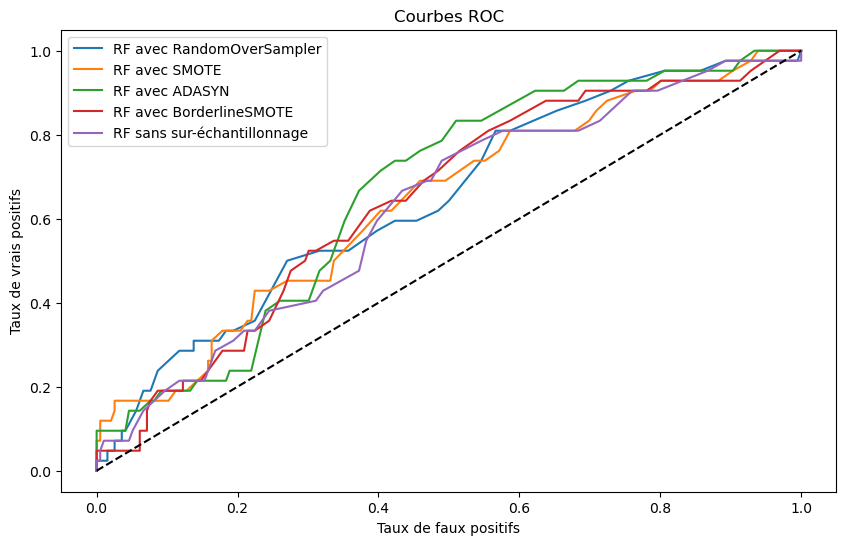

In [251]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_rf_oversampler, tpr_rf_oversampler, _ = roc_curve(y_test, y_proba_rf_oversampler)
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_proba_rf_smote)
fpr_rf_adasyn, tpr_rf_adasyn, _ = roc_curve(y_test, y_proba_rf_adasyn)
fpr_rf_borderline_smote, tpr_rf_borderline_smote, _ = roc_curve(y_test, y_proba_rf_borderline_smote)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler, tpr_rf_oversampler, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote, tpr_rf_smote, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn, tpr_rf_adasyn, label='RF avec ADASYN')
plt.plot(fpr_rf_borderline_smote, tpr_rf_borderline_smote, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf, tpr_rf, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### C) Ajustement des hyperparamètres

In [252]:
# Ajustement des hyperparamètres par validation croisée

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

# Définition de la grille des hyperparamètres pour les forêts aléatoires
param_grid_rf_oversampler = {
    'oversampler__sampling_strategy': [0.4, 0.5, 0.6, 0.8], # Taux de sur-échantillonnage
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 30], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 10, 30], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4],
    'rf__bootstrap': [True, False]
}


param_grid_rf_smote = {
    'smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 30], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 10, 30], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4]
}


param_grid_rf_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 30], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 10, 30], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4]
}
param_grid_rf_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 30], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 10, 30], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4]
}


param_grid_rf = {
    'rf__n_estimators': [100, 300, 500], # Moins d'options pour le nombre d'arbres
    'rf__criterion': ['gini'], # Utilisation d'un seul critère d'impureté
    'rf__max_depth': [3, 15, 30], # Réduction des options de profondeur maximale
    'rf__min_samples_split': [2, 10, 30], # Moins d'options pour le nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 4]
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Kappa': make_scorer(cohen_kappa_score),
    'AUC': 'roc_auc'
}

In [253]:
# Ajustement des hyperparamètres

grille_recherche_rf_oversampler = GridSearchCV(modele_rf_oversampler, param_grid_rf_oversampler, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_rf_smote = GridSearchCV(modele_rf_smote, param_grid_rf_smote, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_rf_adasyn = GridSearchCV(modele_rf_adasyn, param_grid_rf_adasyn, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_rf_borderline_smote = GridSearchCV(modele_rf_borderline_smote, param_grid_rf_borderline_smote, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_rf = GridSearchCV(modele_rf, param_grid_rf, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)

In [254]:
modele_rf_oversampler_opt = grille_recherche_rf_oversampler.fit(X_train, y_train).best_estimator_

In [255]:
modele_rf_smote_opt = grille_recherche_rf_smote.fit(X_train, y_train).best_estimator_

In [256]:
modele_rf_adasyn_opt = grille_recherche_rf_adasyn.fit(X_train, y_train).best_estimator_

In [257]:
modele_rf_borderline_smote_opt = grille_recherche_rf_borderline_smote.fit(X_train, y_train).best_estimator_

In [258]:
modele_rf_opt = grille_recherche_rf.fit(X_train, y_train).best_estimator_

In [259]:
# Affichage des meilleurs paramètres
best_params_rf_oversampler = modele_rf_oversampler_opt.get_params()
best_params_rf_smote = modele_rf_smote_opt.get_params()
best_params_rf_adasyn = modele_rf_adasyn_opt.get_params()
best_params_rf_borderline_smote = modele_rf_borderline_smote_opt.get_params()
best_params_rf = modele_rf_opt.get_params()

In [260]:
# Affichage des meilleurs paramètres pour chaque modèle

print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec oversampler : \n", best_params_rf_oversampler)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec smote :\n", best_params_rf_smote)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec adasyn :\n", best_params_rf_adasyn)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires avec borderline smote :\n", best_params_rf_borderline_smote)
print('\n')
print("Les meilleurs paramètres pour le modèle de forêts aléatoires sans méthode de sur-échantillonnage :\n", best_params_rf)


Les meilleurs paramètres pour le modèle de forêts aléatoires avec oversampler : 
 {'memory': None, 'steps': [('std_scaler', StandardScaler()), ('oversampler', RandomOverSampler(sampling_strategy=0.6)), ('rf', RandomForestClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=30))], 'verbose': False, 'std_scaler': StandardScaler(), 'oversampler': RandomOverSampler(sampling_strategy=0.6), 'rf': RandomForestClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=30), 'std_scaler__copy': True, 'std_scaler__with_mean': True, 'std_scaler__with_std': True, 'oversampler__random_state': None, 'oversampler__sampling_strategy': 0.6, 'oversampler__shrinkage': None, 'rf__bootstrap': True, 'rf__ccp_alpha': 0.0, 'rf__class_weight': None, 'rf__criterion': 'gini', 'rf__max_depth': 3, 'rf__max_features': 'sqrt', 'rf__max_leaf_nodes': None, 'rf__max_samples': None, 'rf__min_impurity_decrease': 0.0, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 30, 'rf__min_weight_fraction_leaf': 0.0, '

In [261]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_rf_oversampler_cv = modele_rf_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler_cv = modele_rf_oversampler_opt.predict(X_test)

y_proba_rf_smote_cv = modele_rf_smote_opt.predict_proba(X_test)[:, 1]
y_pred_rf_smote_cv = modele_rf_smote_opt.predict(X_test)

y_proba_rf_adasyn_cv = modele_rf_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn_cv = modele_rf_adasyn_opt.predict(X_test)

y_proba_rf_borderline_smote_cv = modele_rf_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_rf_borderline_smote_cv = modele_rf_borderline_smote_opt.predict(X_test)

y_proba_rf_cv = modele_rf_opt.predict_proba(X_test)[:, 1]
y_pred_rf_cv = modele_rf_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [262]:
# Calcul des métriques

auc_roc_rf_oversampler_cv = roc_auc_score(y_test, y_proba_rf_oversampler_cv)
auc_pr_rf_oversampler_cv = average_precision_score(y_test, y_proba_rf_oversampler_cv)
log_loss_value_rf_oversampler_cv = log_loss(y_test, y_proba_rf_oversampler_cv)
precision_rf_oversampler_cv = precision_score(y_test, y_pred_rf_oversampler_cv)
recall_rf_oversampler_cv = recall_score(y_test, y_pred_rf_oversampler_cv)
f1_rf_oversampler_cv = f1_score(y_test, y_pred_rf_oversampler_cv)
mcc_rf_oversampler_cv = matthews_corrcoef(y_test, y_pred_rf_oversampler_cv)
balanced_acc_rf_oversampler_cv = balanced_accuracy_score(y_test, y_pred_rf_oversampler_cv)
specificity_rf_oversampler_cv = confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_oversampler_cv)[0, 1])
cohen_kappa_rf_oversampler_cv = cohen_kappa_score(y_test, y_pred_rf_oversampler_cv)

auc_roc_rf_smote_cv = roc_auc_score(y_test, y_proba_rf_smote_cv)
auc_pr_rf_smote_cv = average_precision_score(y_test, y_proba_rf_smote_cv)
log_loss_value_rf_smote_cv = log_loss(y_test, y_proba_rf_smote_cv)
precision_rf_smote_cv = precision_score(y_test, y_pred_rf_smote_cv)
recall_rf_smote_cv = recall_score(y_test, y_pred_rf_smote_cv)
f1_rf_smote_cv = f1_score(y_test, y_pred_rf_smote_cv)
mcc_rf_smote_cv = matthews_corrcoef(y_test, y_pred_rf_smote_cv)
balanced_acc_rf_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_smote_cv)
specificity_rf_smote_cv = confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_smote_cv)[0, 1])
cohen_kappa_rf_smote_cv = cohen_kappa_score(y_test, y_pred_rf_smote_cv)

auc_roc_rf_adasyn_cv = roc_auc_score(y_test, y_proba_rf_adasyn_cv)
auc_pr_rf_adasyn_cv = average_precision_score(y_test, y_proba_rf_adasyn_cv)
log_loss_value_rf_adasyn_cv = log_loss(y_test, y_proba_rf_adasyn_cv)
precision_rf_adasyn_cv = precision_score(y_test, y_pred_rf_adasyn_cv)
recall_rf_adasyn_cv = recall_score(y_test, y_pred_rf_adasyn_cv)
f1_rf_adasyn_cv = f1_score(y_test, y_pred_rf_adasyn_cv)
mcc_rf_adasyn_cv = matthews_corrcoef(y_test, y_pred_rf_adasyn_cv)
balanced_acc_rf_adasyn_cv = balanced_accuracy_score(y_test, y_pred_rf_adasyn_cv)
specificity_rf_adasyn_cv = confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_adasyn_cv)[0, 1])
cohen_kappa_rf_adasyn_cv = cohen_kappa_score(y_test, y_pred_rf_adasyn_cv)

auc_roc_rf_borderline_smote_cv = roc_auc_score(y_test, y_proba_rf_borderline_smote_cv)
auc_pr_rf_borderline_smote_cv = average_precision_score(y_test, y_proba_rf_borderline_smote_cv)
log_loss_value_rf_borderline_smote_cv = log_loss(y_test, y_proba_rf_borderline_smote_cv)
precision_rf_borderline_smote_cv = precision_score(y_test, y_pred_rf_borderline_smote_cv)
recall_rf_borderline_smote_cv = recall_score(y_test, y_pred_rf_borderline_smote_cv)
f1_rf_borderline_smote_cv = f1_score(y_test, y_pred_rf_borderline_smote_cv)
mcc_rf_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_rf_borderline_smote_cv)
balanced_acc_rf_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_rf_borderline_smote_cv)
specificity_rf_borderline_smote_cv = confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_borderline_smote_cv)[0, 1])
cohen_kappa_rf_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_rf_borderline_smote_cv)

auc_roc_rf_cv = roc_auc_score(y_test, y_proba_rf_cv)
auc_pr_rf_cv = average_precision_score(y_test, y_proba_rf_cv)
log_loss_value_rf_cv = log_loss(y_test, y_proba_rf_cv)
precision_rf_cv = precision_score(y_test, y_pred_rf_cv)
recall_rf_cv = recall_score(y_test, y_pred_rf_cv)
f1_rf_cv = f1_score(y_test, y_pred_rf_cv)
mcc_rf_cv = matthews_corrcoef(y_test, y_pred_rf_cv)
balanced_acc_rf_cv = balanced_accuracy_score(y_test, y_pred_rf_cv)
specificity_rf_cv = confusion_matrix(y_test, y_pred_rf_cv)[0, 0] / (confusion_matrix(y_test, y_pred_rf_cv)[0, 0] + confusion_matrix(y_test, y_pred_rf_cv)[0, 1])
cohen_kappa_rf_cv = cohen_kappa_score(y_test, y_pred_rf_cv)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [322]:
# Affichage des résultats

resultats_rf_opt = pd.DataFrame({
    "Random Forest sans sur-échantillonnage": [auc_roc_rf_cv, auc_pr_rf_cv, log_loss_value_rf_cv, f1_rf_cv, mcc_rf_cv, balanced_acc_rf_cv, specificity_rf_cv, cohen_kappa_rf_cv],
    "Random Forest avec SMOTE": [auc_roc_rf_smote_cv, auc_pr_rf_smote_cv, log_loss_value_rf_smote_cv, f1_rf_smote_cv, mcc_rf_smote_cv, balanced_acc_rf_smote_cv, specificity_rf_smote_cv, cohen_kappa_rf_smote_cv],
    "Random Forest avec RandomOverSampler": [auc_roc_rf_oversampler_cv, auc_pr_rf_oversampler_cv, log_loss_value_rf_oversampler_cv, f1_rf_oversampler_cv, mcc_rf_oversampler_cv, balanced_acc_rf_oversampler_cv, specificity_rf_oversampler_cv, cohen_kappa_rf_oversampler_cv],
    "Random Forest avec ADASYN": [auc_roc_rf_adasyn_cv, auc_pr_rf_adasyn_cv, log_loss_value_rf_adasyn_cv, f1_rf_adasyn_cv, mcc_rf_adasyn_cv, balanced_acc_rf_adasyn_cv, specificity_rf_adasyn_cv, cohen_kappa_rf_adasyn_cv],
    "Random Forest avec BorderlineSMOTE": [auc_roc_rf_borderline_smote_cv, auc_pr_rf_borderline_smote_cv, log_loss_value_rf_borderline_smote_cv, f1_rf_borderline_smote_cv, mcc_rf_borderline_smote_cv, balanced_acc_rf_borderline_smote_cv, specificity_rf_borderline_smote_cv, cohen_kappa_rf_borderline_smote_cv]
}, index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf_opt = resultats_rf_opt.round(3)
resultats_rf_opt

# Export
resultats_rf_opt.to_csv("resultats_rf_opt.csv", index=True)
latex_table_rf = resultats_rf_opt.to_latex(index=True)
print(latex_table_rf)

\begin{tabular}{lrrrrr}
\toprule
 & Random Forest sans sur-échantillonnage & Random Forest avec SMOTE & Random Forest avec RandomOverSampler & Random Forest avec ADASYN & Random Forest avec BorderlineSMOTE \\
\midrule
0 & 0.686000 & 0.665000 & 0.691000 & 0.665000 & 0.679000 \\
1 & 0.286000 & 0.316000 & 0.298000 & 0.290000 & 0.293000 \\
2 & 0.438000 & 0.500000 & 0.519000 & 0.517000 & 0.518000 \\
3 & 0.000000 & 0.275000 & 0.253000 & 0.293000 & 0.322000 \\
4 & 0.000000 & 0.129000 & 0.106000 & 0.146000 & 0.171000 \\
5 & 0.500000 & 0.562000 & 0.550000 & 0.571000 & 0.588000 \\
6 & 1.000000 & 0.862000 & 0.862000 & 0.857000 & 0.842000 \\
7 & 0.000000 & 0.129000 & 0.105000 & 0.146000 & 0.170000 \\
\bottomrule
\end{tabular}



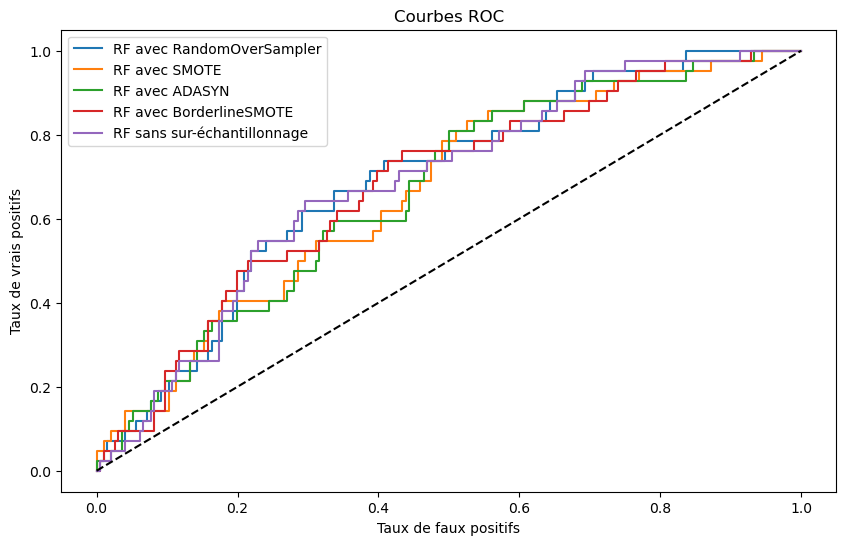

In [264]:
# Comparaison des courbes ROC

fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, _ = roc_curve(y_test, y_proba_rf_oversampler_cv)
fpr_rf_smote_cv, tpr_rf_smote_cv, _ = roc_curve(y_test, y_proba_rf_smote_cv)
fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, _ = roc_curve(y_test, y_proba_rf_adasyn_cv)
fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, _ = roc_curve(y_test, y_proba_rf_borderline_smote_cv)
fpr_rf_cv, tpr_rf_cv, _ = roc_curve(y_test, y_proba_rf_cv)


plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote_cv, tpr_rf_smote_cv, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, label='RF avec ADASYN')
plt.plot(fpr_rf_borderline_smote_cv, tpr_rf_borderline_smote_cv, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf_cv, tpr_rf_cv, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()


### E) Importance des variables

In [265]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importance_rf_oversampler = modele_rf_oversampler_opt.named_steps['rf'].feature_importances_
importance_rf_smote = modele_rf_smote_opt.named_steps['rf'].feature_importances_
importance_rf_adasyn = modele_rf_adasyn_opt.named_steps['rf'].feature_importances_
importance_rf_borderline_smote = modele_rf_borderline_smote_opt.named_steps['rf'].feature_importances_
importance_rf = modele_rf_opt.named_steps['rf'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_rf_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_oversampler
})

resultats_importance_variables_rf_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_smote
})

resultats_importance_variables_rf_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_adasyn
})

resultats_importance_variables_rf_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf_borderline_smote
})

resultats_importance_variables_rf = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importance_rf
})

# Affichage des résultats
resultats_importance_variables_rf_oversampler = resultats_importance_variables_rf_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_smote = resultats_importance_variables_rf_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_adasyn = resultats_importance_variables_rf_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_borderline_smote = resultats_importance_variables_rf_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf = resultats_importance_variables_rf.sort_values(by="Importance", ascending=False)

resultats_importance_variables_rf_oversampler

Variable  Importance
6                nb_actes_france_renov    0.138521
25                   total_entreprises    0.131169
17                               p_pop    0.109306
21                         part_actifs    0.084772
5                        emissions_ges    0.056522
1              moyenne_conso_indus_hab    0.048414
19  com_variation_encours_dette_ha_pct    0.047857
23              abstention_municipales    0.040483
26             part_licencies_sportifs    0.032124
7                               friche    0.031302
2          moyenne_conso_tertiaire_hab    0.031205
12                        superf_choro    0.028061
24                   taux_creation_ent    0.027612
20                       part_inactifs    0.027142
3        moyenne_conso_residentiel_hab    0.022016
16                            med_disp    0.021196
0               moyenne_conso_agri_hab    0.017307
22                      dependance_eco    0.016649
9          part_residences_secondaires    0.016335
4             moyenne_conso_totale_hab    0.012483
15                part_trajets_voiture    0.012017
14                            gare_tgv    0.010247
18                           CSP_maire    0.010221
13                         departement    0.010155
27            part_jeunes_sans_diplome    0.008912
11                            gridens7    0.005886
10                   beneficiaire_prog    0.000745
30                          climat_Mer    0.000710
28                        climat_Autre    0.000632
8                         ecoquartiers    0.000000
29                     climat_Estuaire    0.000000

In [266]:
resultats_importance_variables_rf_smote

Variable  Importance
7                               friche    0.079330
1              moyenne_conso_indus_hab    0.066362
19  com_variation_encours_dette_ha_pct    0.052901
6                nb_actes_france_renov    0.052128
20                       part_inactifs    0.049129
11                            gridens7    0.047743
21                         part_actifs    0.044398
26             part_licencies_sportifs    0.042206
13                         departement    0.041999
24                   taux_creation_ent    0.039422
25                   total_entreprises    0.039310
17                               p_pop    0.038662
18                           CSP_maire    0.036696
12                        superf_choro    0.033270
23              abstention_municipales    0.033232
2          moyenne_conso_tertiaire_hab    0.033196
22                      dependance_eco    0.033051
3        moyenne_conso_residentiel_hab    0.031750
0               moyenne_conso_agri_hab    0.030806
27            part_jeunes_sans_diplome    0.029333
5                        emissions_ges    0.029257
9          part_residences_secondaires    0.028250
16                            med_disp    0.028217
15                part_trajets_voiture    0.025114
4             moyenne_conso_totale_hab    0.024458
28                        climat_Autre    0.002837
30                          climat_Mer    0.002439
14                            gare_tgv    0.002355
10                   beneficiaire_prog    0.001418
8                         ecoquartiers    0.000731
29                     climat_Estuaire    0.000000

In [267]:
resultats_importance_variables_rf_adasyn

Variable  Importance
7                               friche    0.070746
13                         departement    0.063146
1              moyenne_conso_indus_hab    0.061651
11                            gridens7    0.050114
18                           CSP_maire    0.046374
19  com_variation_encours_dette_ha_pct    0.046080
20                       part_inactifs    0.045755
26             part_licencies_sportifs    0.045256
6                nb_actes_france_renov    0.044203
21                         part_actifs    0.043543
25                   total_entreprises    0.041335
24                   taux_creation_ent    0.039351
17                               p_pop    0.039176
12                        superf_choro    0.036193
22                      dependance_eco    0.035398
9          part_residences_secondaires    0.031824
23              abstention_municipales    0.030945
0               moyenne_conso_agri_hab    0.030082
2          moyenne_conso_tertiaire_hab    0.029667
27            part_jeunes_sans_diplome    0.027628
16                            med_disp    0.026687
5                        emissions_ges    0.026620
4             moyenne_conso_totale_hab    0.026364
3        moyenne_conso_residentiel_hab    0.026083
15                part_trajets_voiture    0.024654
28                        climat_Autre    0.003232
30                          climat_Mer    0.002657
14                            gare_tgv    0.002390
10                   beneficiaire_prog    0.001667
8                         ecoquartiers    0.000893
29                     climat_Estuaire    0.000286

In [268]:
resultats_importance_variables_rf_borderline_smote

Variable  Importance
25                   total_entreprises    0.069290
1              moyenne_conso_indus_hab    0.067071
11                            gridens7    0.065546
7                               friche    0.056713
26             part_licencies_sportifs    0.056706
6                nb_actes_france_renov    0.053753
17                               p_pop    0.050415
13                         departement    0.048021
21                         part_actifs    0.045345
18                           CSP_maire    0.044203
20                       part_inactifs    0.044137
4             moyenne_conso_totale_hab    0.037434
19  com_variation_encours_dette_ha_pct    0.036792
24                   taux_creation_ent    0.032855
9          part_residences_secondaires    0.032603
22                      dependance_eco    0.032398
2          moyenne_conso_tertiaire_hab    0.030828
12                        superf_choro    0.027176
3        moyenne_conso_residentiel_hab    0.025877
0               moyenne_conso_agri_hab    0.024582
5                        emissions_ges    0.024489
23              abstention_municipales    0.022796
16                            med_disp    0.021447
15                part_trajets_voiture    0.019214
27            part_jeunes_sans_diplome    0.019088
14                            gare_tgv    0.005251
30                          climat_Mer    0.002077
28                        climat_Autre    0.002002
10                   beneficiaire_prog    0.001006
8                         ecoquartiers    0.000740
29                     climat_Estuaire    0.000146

In [269]:
resultats_importance_variables_rf

Variable  Importance
25                   total_entreprises    0.116404
17                               p_pop    0.106965
6                nb_actes_france_renov    0.099563
5                        emissions_ges    0.052194
21                         part_actifs    0.050705
12                        superf_choro    0.046563
19  com_variation_encours_dette_ha_pct    0.045647
7                               friche    0.044744
26             part_licencies_sportifs    0.041849
2          moyenne_conso_tertiaire_hab    0.041505
1              moyenne_conso_indus_hab    0.036082
4             moyenne_conso_totale_hab    0.033117
20                       part_inactifs    0.031823
23              abstention_municipales    0.031437
0               moyenne_conso_agri_hab    0.027740
22                      dependance_eco    0.027718
24                   taux_creation_ent    0.025975
3        moyenne_conso_residentiel_hab    0.025198
16                            med_disp    0.018765
15                part_trajets_voiture    0.018412
18                           CSP_maire    0.015541
9          part_residences_secondaires    0.015125
27            part_jeunes_sans_diplome    0.014684
14                            gare_tgv    0.010158
11                            gridens7    0.009785
13                         departement    0.007973
30                          climat_Mer    0.001336
28                        climat_Autre    0.000978
29                     climat_Estuaire    0.000959
8                         ecoquartiers    0.000790
10                   beneficiaire_prog    0.000267

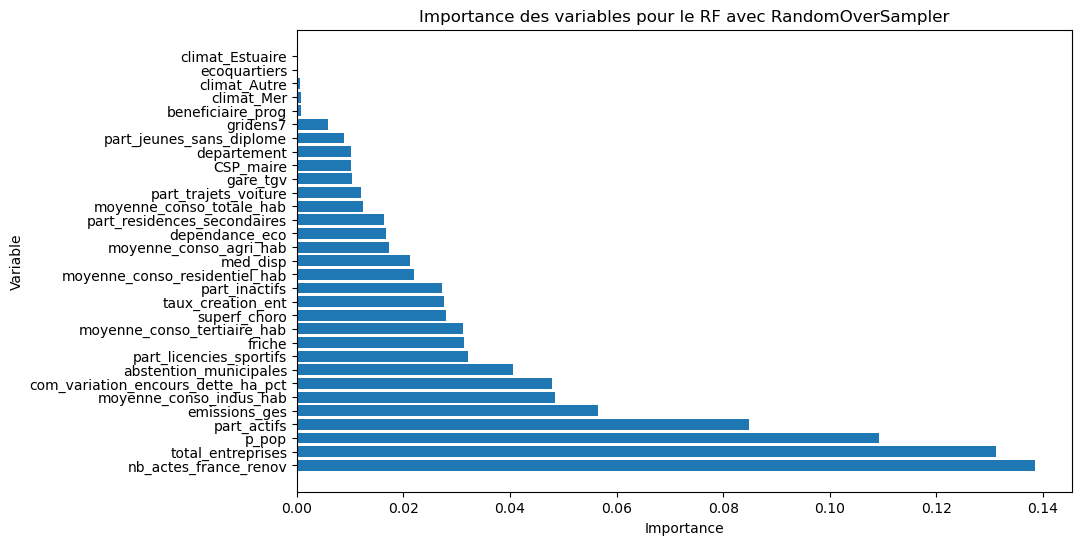

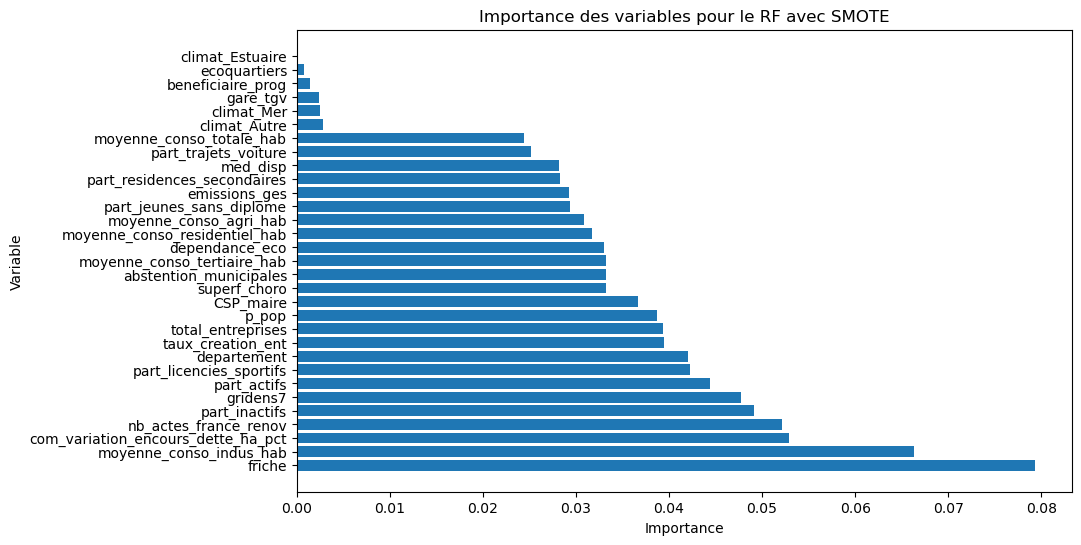

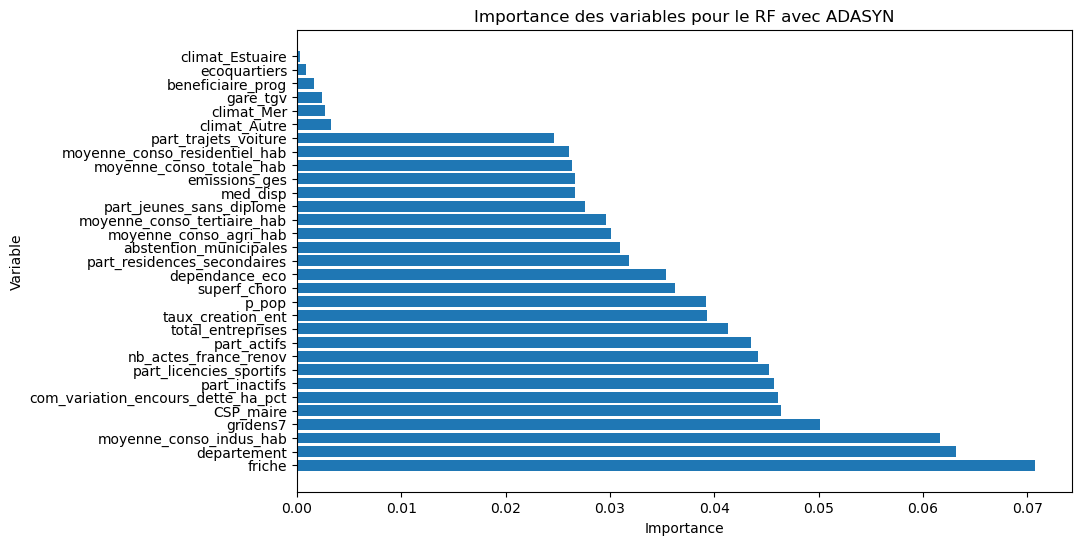

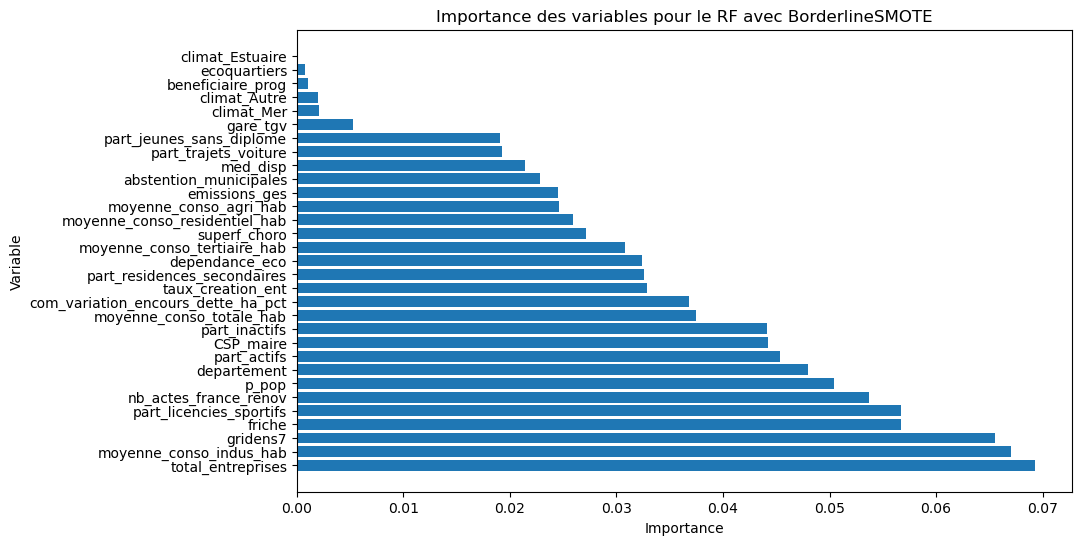

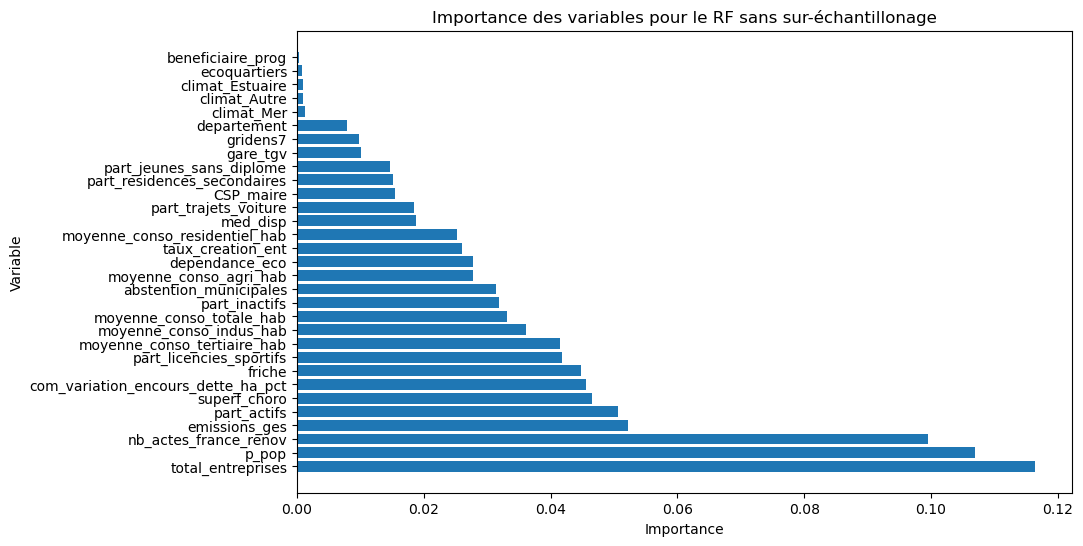

In [270]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_oversampler['Variable'], resultats_importance_variables_rf_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_smote['Variable'], resultats_importance_variables_rf_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_adasyn['Variable'], resultats_importance_variables_rf_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_borderline_smote['Variable'], resultats_importance_variables_rf_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf['Variable'], resultats_importance_variables_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF sans sur-échantillonage')
plt.show()

## I.2.4. Gradient Boosting

### A) Construction des modèles

In [271]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# Construction des étapes
etapes_gb_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

modele_gb_randomoversampler = Pipeline(steps=etapes_gb_randomoversampler) # Création du pipeline
modele_gb_smote = Pipeline(steps=etapes_gb_smote) # Création du pipeline
modele_gb_adasyn = Pipeline(steps=etapes_gb_adasyn) # Création du pipeline
modele_gb_borderline_smote = Pipeline(steps=etapes_gb_borderline_smote) # Création du pipeline
modele_gb = Pipeline(steps=etapes_gb) # Création du pipeline

In [272]:
# Entraînement des modèles
modele_gb_randomoversampler.fit(X_train, y_train) # Entraînement
modele_gb_smote.fit(X_train, y_train) # Entraînement
modele_gb_adasyn.fit(X_train, y_train) # Entraînement
modele_gb_borderline_smote.fit(X_train, y_train) # Entraînement
modele_gb.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('gb', GradientBoostingClassifier())])

In [273]:
# Prédictions

y_proba_gb_randomoversampler = modele_gb_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler = modele_gb_randomoversampler.predict(X_test)

y_proba_gb_smote = modele_gb_smote.predict_proba(X_test)[:, 1]
y_pred_gb_smote = modele_gb_smote.predict(X_test)

y_proba_gb_adasyn = modele_gb_adasyn.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn = modele_gb_adasyn.predict(X_test)

y_proba_gb_borderline_smote = modele_gb_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_gb_borderline_smote = modele_gb_borderline_smote.predict(X_test)

y_proba_gb = modele_gb.predict_proba(X_test)[:, 1]
y_pred_gb = modele_gb.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [274]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

auc_roc_gb_randomoversampler = roc_auc_score(y_test, y_proba_gb_randomoversampler)
auc_pr_gb_randomoversampler = average_precision_score(y_test, y_proba_gb_randomoversampler)
log_loss_value_gb_randomoversampler = log_loss(y_test, y_proba_gb_randomoversampler)
precision_gb_randomoversampler = precision_score(y_test, y_pred_gb_randomoversampler)
recall_gb_randomoversampler = recall_score(y_test, y_pred_gb_randomoversampler)
f1_gb_randomoversampler = f1_score(y_test, y_pred_gb_randomoversampler)
mcc_gb_randomoversampler = matthews_corrcoef(y_test, y_pred_gb_randomoversampler)
balanced_acc_gb_randomoversampler = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler)
specificity_gb_randomoversampler = confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 1])
cohen_kappa_gb_randomoversampler = cohen_kappa_score(y_test, y_pred_gb_randomoversampler)

auc_roc_gb_smote = roc_auc_score(y_test, y_proba_gb_smote)
auc_pr_gb_smote = average_precision_score(y_test, y_proba_gb_smote)
log_loss_value_gb_smote = log_loss(y_test, y_proba_gb_smote)
precision_gb_smote = precision_score(y_test, y_pred_gb_smote)
recall_gb_smote = recall_score(y_test, y_pred_gb_smote)
f1_gb_smote = f1_score(y_test, y_pred_gb_smote)
mcc_gb_smote = matthews_corrcoef(y_test, y_pred_gb_smote)
balanced_acc_gb_smote = balanced_accuracy_score(y_test, y_pred_gb_smote)
specificity_gb_smote = confusion_matrix(y_test, y_pred_gb_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_smote)[0, 1])
cohen_kappa_gb_smote = cohen_kappa_score(y_test, y_pred_gb_smote)

auc_roc_gb_adasyn = roc_auc_score(y_test, y_proba_gb_adasyn)
auc_pr_gb_adasyn = average_precision_score(y_test, y_proba_gb_adasyn)
log_loss_value_gb_adasyn = log_loss(y_test, y_proba_gb_adasyn)
precision_gb_adasyn = precision_score(y_test, y_pred_gb_adasyn)
recall_gb_adasyn = recall_score(y_test, y_pred_gb_adasyn)
f1_gb_adasyn = f1_score(y_test, y_pred_gb_adasyn)
mcc_gb_adasyn = matthews_corrcoef(y_test, y_pred_gb_adasyn)
balanced_acc_gb_adasyn = balanced_accuracy_score(y_test, y_pred_gb_adasyn)
specificity_gb_adasyn = confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_gb_adasyn)[0, 1])
cohen_kappa_gb_adasyn = cohen_kappa_score(y_test, y_pred_gb_adasyn)

auc_roc_gb_borderline_smote = roc_auc_score(y_test, y_proba_gb_borderline_smote)
auc_pr_gb_borderline_smote = average_precision_score(y_test, y_proba_gb_borderline_smote)
log_loss_value_gb_borderline_smote = log_loss(y_test, y_proba_gb_borderline_smote)
precision_gb_borderline_smote = precision_score(y_test, y_pred_gb_borderline_smote)
recall_gb_borderline_smote = recall_score(y_test, y_pred_gb_borderline_smote)
f1_gb_borderline_smote = f1_score(y_test, y_pred_gb_borderline_smote)
mcc_gb_borderline_smote = matthews_corrcoef(y_test, y_pred_gb_borderline_smote)
balanced_acc_gb_borderline_smote = balanced_accuracy_score(y_test, y_pred_gb_borderline_smote)
specificity_gb_borderline_smote = confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_borderline_smote)[0, 1])
cohen_kappa_gb_borderline_smote = cohen_kappa_score(y_test, y_pred_gb_borderline_smote)

auc_roc_gb = roc_auc_score(y_test, y_proba_gb)
auc_pr_gb = average_precision_score(y_test, y_proba_gb)
log_loss_value_gb = log_loss(y_test, y_proba_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
mcc_gb = matthews_corrcoef(y_test, y_pred_gb)
balanced_acc_gb = balanced_accuracy_score(y_test, y_pred_gb)
specificity_gb = confusion_matrix(y_test, y_pred_gb)[0, 0] / (confusion_matrix(y_test, y_pred_gb)[0, 0] + confusion_matrix(y_test, y_pred_gb)[0, 1])
cohen_kappa_gb = cohen_kappa_score(y_test, y_pred_gb)

In [275]:
# Affichage des résultats
resultats_gb = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb, auc_pr_gb, log_loss_value_gb, f1_gb, mcc_gb, balanced_acc_gb, specificity_gb, cohen_kappa_gb],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote, auc_pr_gb_smote, log_loss_value_gb_smote, f1_gb_smote, mcc_gb_smote, balanced_acc_gb_smote, specificity_gb_smote, cohen_kappa_gb_smote],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler, auc_pr_gb_randomoversampler, log_loss_value_gb_randomoversampler, f1_gb_randomoversampler, mcc_gb_randomoversampler, balanced_acc_gb_randomoversampler, specificity_gb_randomoversampler, cohen_kappa_gb_randomoversampler],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn, auc_pr_gb_adasyn, log_loss_value_gb_adasyn, f1_gb_adasyn, mcc_gb_adasyn, balanced_acc_gb_adasyn, specificity_gb_adasyn, cohen_kappa_gb_adasyn],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_borderline_smote, auc_pr_gb_borderline_smote, log_loss_value_gb_borderline_smote, f1_gb_borderline_smote, mcc_gb_borderline_smote, balanced_acc_gb_borderline_smote, specificity_gb_borderline_smote, cohen_kappa_gb_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb = resultats_gb.round(3)
resultats_gb

Gradient Boosting sans sur-échantillonnage  \
AUC-ROC                                           0.639   
AUC-PR                                            0.252   
Log loss                                          0.468   
F1                                                0.075   
MCC                                               0.003   
Accuracy                                          0.501   
Spécificité                                       0.954   
Kappa                                             0.002   

             Gradient Boosting avec SMOTE  \
AUC-ROC                             0.652   
AUC-PR                              0.258   
Log loss                            0.494   
F1                                  0.234   
MCC                                 0.088   
Accuracy                            0.541   
Spécificité                         0.867   
Kappa                               0.087   

             Gradient Boosting avec RandomOverSampler  \
AUC-ROC                                         0.641   
AUC-PR                                          0.271   
Log loss                                        0.476   
F1                                              0.136   
MCC                                             0.043   
Accuracy                                        0.514   
Spécificité                                     0.934   
Kappa                                           0.038   

             Gradient Boosting avec ADASYN  \
AUC-ROC                              0.645   
AUC-PR                               0.289   
Log loss                             0.494   
F1                                   0.263   
MCC                                  0.126   
Accuracy                             0.558   
Spécificité                          0.878   
Kappa                                0.125   

             Gradient Boosting avec BorderlineSMOTE  
AUC-ROC                                       0.645  
AUC-PR                                        0.238  
Log loss                                      0.507  
F1                                            0.220  
MCC                                           0.057  
Accuracy                                      0.528  
Spécificité                                   0.842  
Kappa                                         0.057

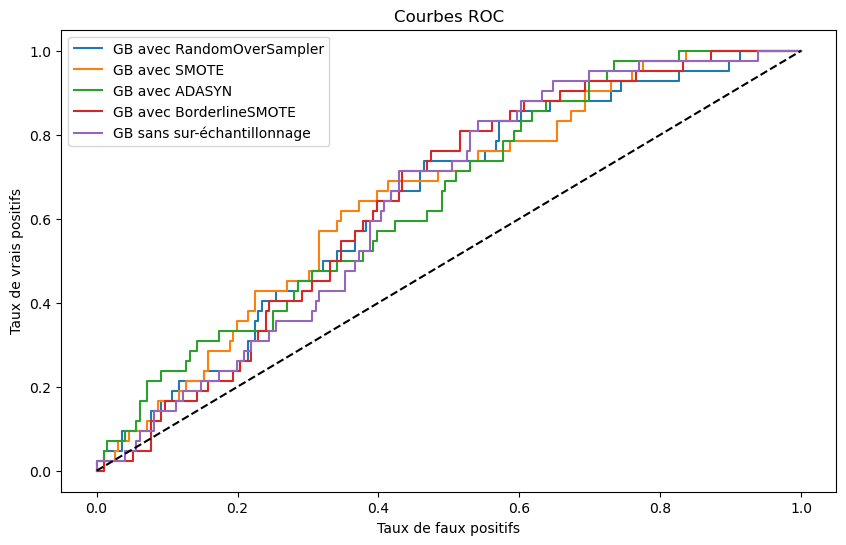

In [276]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_gb_randomoversampler, tpr_gb_randomoversampler, _ = roc_curve(y_test, y_proba_gb_randomoversampler)
fpr_gb_smote, tpr_gb_smote, _ = roc_curve(y_test, y_proba_gb_smote)
fpr_gb_adasyn, tpr_gb_adasyn, _ = roc_curve(y_test, y_proba_gb_adasyn)
fpr_gb_borderline_smote, tpr_gb_borderline_smote, _ = roc_curve(y_test, y_proba_gb_borderline_smote)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler, tpr_gb_randomoversampler, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote, tpr_gb_smote, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn, tpr_gb_adasyn, label='GB avec ADASYN')
plt.plot(fpr_gb_borderline_smote, tpr_gb_borderline_smote, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb, tpr_gb, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### C) Ajustement des hyperparamètres

In [277]:
# Ajustement des hyperparamètres par validation croisée

from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres pour le gradient boosting

param_grid_gb_oversampler = {
    'oversampler__sampling_strategy': ['auto', 0.5, 0.75, 1.0], 
    'gb__n_estimators': [100, 200, 300], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7], # Profondeur maximale de l'arbre
}

param_grid_gb_smote = {
    'smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'gb__n_estimators': [100, 200, 300], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7], # Profondeur maximale de l'arbre
}

param_grid_gb_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'gb__n_estimators': [100, 200, 300], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7], # Profondeur maximale de l'arbre
}

param_grid_gb_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'gb__n_estimators': [100, 200, 300], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7], # Profondeur maximale de l'arbre
}


param_grid_gb = {
    'gb__n_estimators': [100, 200, 300], # Nombre d'arbres
    'gb__learning_rate': [0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7], # Profondeur maximale de l'arbre
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Kappa': make_scorer(cohen_kappa_score),
    'AUC': 'roc_auc'
}


In [278]:
from sklearn.model_selection import RandomizedSearchCV

# Ajustement des hyperparamètres
grille_recherche_gb_randomoversampler = GridSearchCV(modele_gb_randomoversampler, param_grid_gb_oversampler, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_gb_smote = GridSearchCV(modele_gb_smote, param_grid_gb_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_gb_adasyn = GridSearchCV(modele_gb_adasyn, param_grid_gb_adasyn, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_gb_borderline_smote = GridSearchCV(modele_gb_borderline_smote, param_grid_gb_borderline_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_gb = GridSearchCV(modele_gb, param_grid_gb, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)

In [279]:
modele_gb_oversampler_opt = grille_recherche_gb_randomoversampler.fit(X_train, y_train).best_estimator_

In [280]:
modele_gb_smote_opt = grille_recherche_gb_smote.fit(X_train, y_train).best_estimator_

In [281]:
modele_gb_adasyn_opt = grille_recherche_gb_adasyn.fit(X_train, y_train).best_estimator_

In [282]:
modele_gb_borderline_smote_opt = grille_recherche_gb_borderline_smote.fit(X_train, y_train).best_estimator_

In [283]:
modele_gb_opt = grille_recherche_gb.fit(X_train, y_train).best_estimator_

In [284]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_gb_randomoversampler_cv = modele_gb_oversampler_opt.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler_cv = modele_gb_oversampler_opt.predict(X_test)

y_proba_gb_smote_cv = modele_gb_smote_opt.predict_proba(X_test)[:, 1]
y_pred_gb_smote_cv = modele_gb_smote_opt.predict(X_test)

y_proba_gb_adasyn_cv = modele_gb_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn_cv = modele_gb_adasyn_opt.predict(X_test)

y_proba_gb_borderline_smote_cv = modele_gb_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_gb_borderline_smote_cv = modele_gb_borderline_smote_opt.predict(X_test)

y_proba_gb_cv = modele_gb_opt.predict_proba(X_test)[:, 1]
y_pred_gb_cv = modele_gb_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [285]:
# Calcul des métriques

auc_roc_gb_randomoversampler_cv = roc_auc_score(y_test, y_proba_gb_randomoversampler_cv)
auc_pr_gb_randomoversampler_cv = average_precision_score(y_test, y_proba_gb_randomoversampler_cv)
log_loss_value_gb_randomoversampler_cv = log_loss(y_test, y_proba_gb_randomoversampler_cv)
precision_gb_randomoversampler_cv = precision_score(y_test, y_pred_gb_randomoversampler_cv)
recall_gb_randomoversampler_cv = recall_score(y_test, y_pred_gb_randomoversampler_cv)
f1_gb_randomoversampler_cv = f1_score(y_test, y_pred_gb_randomoversampler_cv)
mcc_gb_randomoversampler_cv = matthews_corrcoef(y_test, y_pred_gb_randomoversampler_cv)
balanced_acc_gb_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler_cv)
specificity_gb_randomoversampler_cv = confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_randomoversampler_cv)[0, 1])
cohen_kappa_gb_randomoversampler_cv = cohen_kappa_score(y_test, y_pred_gb_randomoversampler_cv)

auc_roc_gb_smote_cv = roc_auc_score(y_test, y_proba_gb_smote_cv)
auc_pr_gb_smote_cv = average_precision_score(y_test, y_proba_gb_smote_cv)
log_loss_value_gb_smote_cv = log_loss(y_test, y_proba_gb_smote_cv)
precision_gb_smote_cv = precision_score(y_test, y_pred_gb_smote_cv)
recall_gb_smote_cv = recall_score(y_test, y_pred_gb_smote_cv)
f1_gb_smote_cv = f1_score(y_test, y_pred_gb_smote_cv)
mcc_gb_smote_cv = matthews_corrcoef(y_test, y_pred_gb_smote_cv)
balanced_acc_gb_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_smote_cv)
specificity_gb_smote_cv = confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_smote_cv)[0, 1])
cohen_kappa_gb_smote_cv = cohen_kappa_score(y_test, y_pred_gb_smote_cv)

auc_roc_gb_adasyn_cv = roc_auc_score(y_test, y_proba_gb_adasyn_cv)
auc_pr_gb_adasyn_cv = average_precision_score(y_test, y_proba_gb_adasyn_cv)
log_loss_value_gb_adasyn_cv = log_loss(y_test, y_proba_gb_adasyn_cv)
precision_gb_adasyn_cv = precision_score(y_test, y_pred_gb_adasyn_cv)
recall_gb_adasyn_cv = recall_score(y_test, y_pred_gb_adasyn_cv)
f1_gb_adasyn_cv = f1_score(y_test, y_pred_gb_adasyn_cv)
mcc_gb_adasyn_cv = matthews_corrcoef(y_test, y_pred_gb_adasyn_cv)
balanced_acc_gb_adasyn_cv = balanced_accuracy_score(y_test, y_pred_gb_adasyn_cv)
specificity_gb_adasyn_cv = confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_adasyn_cv)[0, 1])
cohen_kappa_gb_adasyn_cv = cohen_kappa_score(y_test, y_pred_gb_adasyn_cv)

auc_roc_gb_borderline_smote_cv = roc_auc_score(y_test, y_proba_gb_borderline_smote_cv)
auc_pr_gb_borderline_smote_cv = average_precision_score(y_test, y_proba_gb_borderline_smote_cv)
log_loss_value_gb_borderline_smote_cv = log_loss(y_test, y_proba_gb_borderline_smote_cv)
precision_gb_borderline_smote_cv = precision_score(y_test, y_pred_gb_borderline_smote_cv)
recall_gb_borderline_smote_cv = recall_score(y_test, y_pred_gb_borderline_smote_cv)
f1_gb_borderline_smote_cv = f1_score(y_test, y_pred_gb_borderline_smote_cv)
mcc_gb_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_gb_borderline_smote_cv)
balanced_acc_gb_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_gb_borderline_smote_cv)
specificity_gb_borderline_smote_cv = confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_borderline_smote_cv)[0, 1])
cohen_kappa_gb_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_gb_borderline_smote_cv)

auc_roc_gb_cv = roc_auc_score(y_test, y_proba_gb_cv)
auc_pr_gb_cv = average_precision_score(y_test, y_proba_gb_cv)
log_loss_value_gb_cv = log_loss(y_test, y_proba_gb_cv)
precision_gb_cv = precision_score(y_test, y_pred_gb_cv)
recall_gb_cv = recall_score(y_test, y_pred_gb_cv)
f1_gb_cv = f1_score(y_test, y_pred_gb_cv)
mcc_gb_cv = matthews_corrcoef(y_test, y_pred_gb_cv)
balanced_acc_gb_cv = balanced_accuracy_score(y_test, y_pred_gb_cv)
specificity_gb_cv = confusion_matrix(y_test, y_pred_gb_cv)[0, 0] / (confusion_matrix(y_test, y_pred_gb_cv)[0, 0] + confusion_matrix(y_test, y_pred_gb_cv)[0, 1])
cohen_kappa_gb_cv = cohen_kappa_score(y_test, y_pred_gb_cv)

In [323]:
# Affichage des résultats

resultats_gb_cv = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb_cv, auc_pr_gb_cv, log_loss_value_gb_cv, f1_gb_cv, mcc_gb_cv, balanced_acc_gb_cv, specificity_gb_cv, cohen_kappa_gb_cv],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote_cv, auc_pr_gb_smote_cv, log_loss_value_gb_smote_cv, f1_gb_smote_cv, mcc_gb_smote_cv, balanced_acc_gb_smote_cv, specificity_gb_smote_cv, cohen_kappa_gb_smote_cv],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler_cv, auc_pr_gb_randomoversampler_cv, log_loss_value_gb_randomoversampler_cv, f1_gb_randomoversampler_cv, mcc_gb_randomoversampler_cv, balanced_acc_gb_randomoversampler_cv, specificity_gb_randomoversampler_cv, cohen_kappa_gb_randomoversampler_cv],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn_cv, auc_pr_gb_adasyn_cv, log_loss_value_gb_adasyn_cv, f1_gb_adasyn_cv, mcc_gb_adasyn_cv, balanced_acc_gb_adasyn_cv, specificity_gb_adasyn_cv, cohen_kappa_gb_adasyn_cv],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_borderline_smote_cv, auc_pr_gb_borderline_smote_cv, log_loss_value_gb_borderline_smote_cv, f1_gb_borderline_smote_cv, mcc_gb_borderline_smote_cv, balanced_acc_gb_borderline_smote_cv, specificity_gb_borderline_smote_cv, cohen_kappa_gb_borderline_smote_cv]
}, index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb_cv = resultats_gb_cv.round(3)
resultats_gb_cv

# Export
resultats_gb_cv.to_csv("resultats_gb_cv.csv", index=True)
latex_table_gb = resultats_gb_cv.to_latex(index=True)
print(latex_table_gb)

\begin{tabular}{lrrrrr}
\toprule
 & Gradient Boosting sans sur-échantillonnage & Gradient Boosting avec SMOTE & Gradient Boosting avec RandomOverSampler & Gradient Boosting avec ADASYN & Gradient Boosting avec BorderlineSMOTE \\
\midrule
0 & 0.638000 & 0.650000 & 0.654000 & 0.623000 & 0.610000 \\
1 & 0.257000 & 0.275000 & 0.260000 & 0.240000 & 0.242000 \\
2 & 0.618000 & 0.502000 & 0.504000 & 0.540000 & 0.795000 \\
3 & 0.085000 & 0.228000 & 0.265000 & 0.247000 & 0.197000 \\
4 & 0.086000 & 0.075000 & 0.110000 & 0.116000 & 0.108000 \\
5 & 0.516000 & 0.536000 & 0.554000 & 0.551000 & 0.538000 \\
6 & 0.985000 & 0.857000 & 0.847000 & 0.888000 & 0.934000 \\
7 & 0.049000 & 0.075000 & 0.110000 & 0.114000 & 0.098000 \\
\bottomrule
\end{tabular}



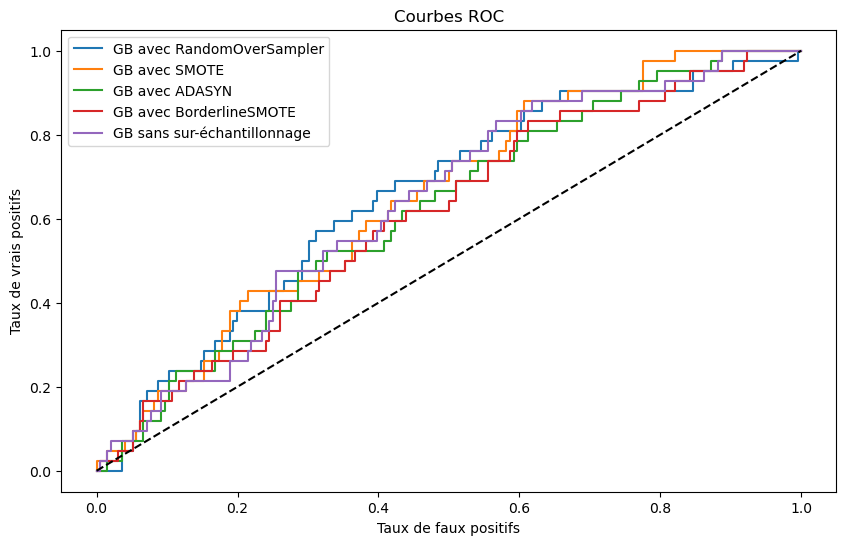

In [287]:
# Courbes ROC

fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, _ = roc_curve(y_test, y_proba_gb_randomoversampler_cv)
fpr_gb_smote_cv, tpr_gb_smote_cv, _ = roc_curve(y_test, y_proba_gb_smote_cv)
fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, _ = roc_curve(y_test, y_proba_gb_adasyn_cv)
fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, _ = roc_curve(y_test, y_proba_gb_borderline_smote_cv)
fpr_gb_cv, tpr_gb_cv, _ = roc_curve(y_test, y_proba_gb_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote_cv, tpr_gb_smote_cv, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, label='GB avec ADASYN')
plt.plot(fpr_gb_borderline_smote_cv, tpr_gb_borderline_smote_cv, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb_cv, tpr_gb_cv, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### E) Importance des variables

In [288]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_gb_randomoversampler = grille_recherche_gb_randomoversampler.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_smote = grille_recherche_gb_smote.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_adasyn = grille_recherche_gb_adasyn.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_borderline_smote = grille_recherche_gb_borderline_smote.best_estimator_.named_steps['gb'].feature_importances_
importances_gb = grille_recherche_gb.best_estimator_.named_steps['gb'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_gb_randomoversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_randomoversampler
})

resultats_importance_variables_gb_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_smote
})

resultats_importance_variables_gb_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_adasyn
})

resultats_importance_variables_gb_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_borderline_smote
})

resultats_importance_variables_gb = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb
})

# Affichage des résultats
resultats_importance_variables_gb_randomoversampler = resultats_importance_variables_gb_randomoversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_smote = resultats_importance_variables_gb_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_adasyn = resultats_importance_variables_gb_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_borderline_smote = resultats_importance_variables_gb_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_gb = resultats_importance_variables_gb.sort_values(by="Importance", ascending=False)

resultats_importance_variables_gb_randomoversampler

Variable  Importance
25                   total_entreprises    0.096146
6                nb_actes_france_renov    0.065753
26             part_licencies_sportifs    0.064663
20                       part_inactifs    0.063907
24                   taux_creation_ent    0.054032
2          moyenne_conso_tertiaire_hab    0.052503
12                        superf_choro    0.047845
1              moyenne_conso_indus_hab    0.047158
27            part_jeunes_sans_diplome    0.046348
19  com_variation_encours_dette_ha_pct    0.045030
4             moyenne_conso_totale_hab    0.043878
21                         part_actifs    0.042942
0               moyenne_conso_agri_hab    0.042705
17                               p_pop    0.037302
16                            med_disp    0.033601
3        moyenne_conso_residentiel_hab    0.033543
23              abstention_municipales    0.029955
9          part_residences_secondaires    0.028914
15                part_trajets_voiture    0.027850
5                        emissions_ges    0.026074
18                           CSP_maire    0.024322
22                      dependance_eco    0.013169
7                               friche    0.012355
13                         departement    0.008485
11                            gridens7    0.007970
28                        climat_Autre    0.002123
10                   beneficiaire_prog    0.000826
8                         ecoquartiers    0.000339
30                          climat_Mer    0.000173
14                            gare_tgv    0.000088
29                     climat_Estuaire    0.000000

In [289]:
resultats_importance_variables_gb_smote

Variable  Importance
7                               friche    0.217313
13                         departement    0.157415
11                            gridens7    0.127811
1              moyenne_conso_indus_hab    0.061791
19  com_variation_encours_dette_ha_pct    0.053858
26             part_licencies_sportifs    0.045576
18                           CSP_maire    0.044912
20                       part_inactifs    0.042218
21                         part_actifs    0.034064
6                nb_actes_france_renov    0.031752
25                   total_entreprises    0.026583
12                        superf_choro    0.024682
24                   taux_creation_ent    0.021122
9          part_residences_secondaires    0.014738
23              abstention_municipales    0.013660
17                               p_pop    0.011364
27            part_jeunes_sans_diplome    0.009679
3        moyenne_conso_residentiel_hab    0.009593
5                        emissions_ges    0.008741
0               moyenne_conso_agri_hab    0.008510
2          moyenne_conso_tertiaire_hab    0.008237
22                      dependance_eco    0.007948
4             moyenne_conso_totale_hab    0.006461
15                part_trajets_voiture    0.005745
16                            med_disp    0.004875
10                   beneficiaire_prog    0.000862
28                        climat_Autre    0.000488
14                            gare_tgv    0.000000
8                         ecoquartiers    0.000000
29                     climat_Estuaire    0.000000
30                          climat_Mer    0.000000

In [290]:
resultats_importance_variables_gb_adasyn

Variable  Importance
7                               friche    0.155963
1              moyenne_conso_indus_hab    0.103171
13                         departement    0.094465
11                            gridens7    0.064757
20                       part_inactifs    0.047110
6                nb_actes_france_renov    0.043212
19  com_variation_encours_dette_ha_pct    0.040727
18                           CSP_maire    0.038104
24                   taux_creation_ent    0.037314
26             part_licencies_sportifs    0.036196
21                         part_actifs    0.035050
9          part_residences_secondaires    0.031869
23              abstention_municipales    0.031383
27            part_jeunes_sans_diplome    0.028555
22                      dependance_eco    0.024756
5                        emissions_ges    0.022491
4             moyenne_conso_totale_hab    0.022189
17                               p_pop    0.021272
3        moyenne_conso_residentiel_hab    0.021172
2          moyenne_conso_tertiaire_hab    0.018709
15                part_trajets_voiture    0.017605
16                            med_disp    0.016518
12                        superf_choro    0.015167
0               moyenne_conso_agri_hab    0.013497
25                   total_entreprises    0.012815
10                   beneficiaire_prog    0.002004
29                     climat_Estuaire    0.001100
28                        climat_Autre    0.001035
14                            gare_tgv    0.000928
30                          climat_Mer    0.000435
8                         ecoquartiers    0.000431

In [291]:
resultats_importance_variables_gb_adasyn

Variable  Importance
7                               friche    0.155963
1              moyenne_conso_indus_hab    0.103171
13                         departement    0.094465
11                            gridens7    0.064757
20                       part_inactifs    0.047110
6                nb_actes_france_renov    0.043212
19  com_variation_encours_dette_ha_pct    0.040727
18                           CSP_maire    0.038104
24                   taux_creation_ent    0.037314
26             part_licencies_sportifs    0.036196
21                         part_actifs    0.035050
9          part_residences_secondaires    0.031869
23              abstention_municipales    0.031383
27            part_jeunes_sans_diplome    0.028555
22                      dependance_eco    0.024756
5                        emissions_ges    0.022491
4             moyenne_conso_totale_hab    0.022189
17                               p_pop    0.021272
3        moyenne_conso_residentiel_hab    0.021172
2          moyenne_conso_tertiaire_hab    0.018709
15                part_trajets_voiture    0.017605
16                            med_disp    0.016518
12                        superf_choro    0.015167
0               moyenne_conso_agri_hab    0.013497
25                   total_entreprises    0.012815
10                   beneficiaire_prog    0.002004
29                     climat_Estuaire    0.001100
28                        climat_Autre    0.001035
14                            gare_tgv    0.000928
30                          climat_Mer    0.000435
8                         ecoquartiers    0.000431

In [292]:
resultats_importance_variables_gb

Variable  Importance
0               moyenne_conso_agri_hab    0.046708
1              moyenne_conso_indus_hab    0.034111
2          moyenne_conso_tertiaire_hab    0.046814
3        moyenne_conso_residentiel_hab    0.034124
4             moyenne_conso_totale_hab    0.056128
5                        emissions_ges    0.029916
6                nb_actes_france_renov    0.044994
7                               friche    0.010923
8                         ecoquartiers    0.000128
9          part_residences_secondaires    0.033812
10                   beneficiaire_prog    0.001245
11                            gridens7    0.010403
12                        superf_choro    0.039945
13                         departement    0.007187
14                            gare_tgv    0.005960
15                part_trajets_voiture    0.034545
16                            med_disp    0.024004
17                               p_pop    0.049131
18                           CSP_maire    0.034029
19  com_variation_encours_dette_ha_pct    0.071510
20                       part_inactifs    0.042225
21                         part_actifs    0.060451
22                      dependance_eco    0.022678
23              abstention_municipales    0.039385
24                   taux_creation_ent    0.047149
25                   total_entreprises    0.066758
26             part_licencies_sportifs    0.053086
27            part_jeunes_sans_diplome    0.050110
28                        climat_Autre    0.001031
29                     climat_Estuaire    0.000877
30                          climat_Mer    0.000633

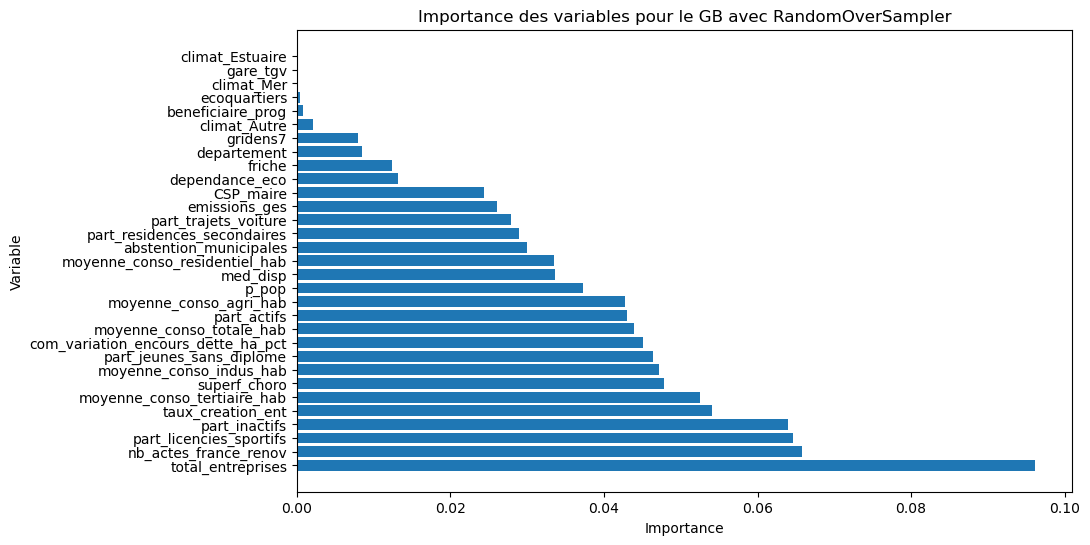

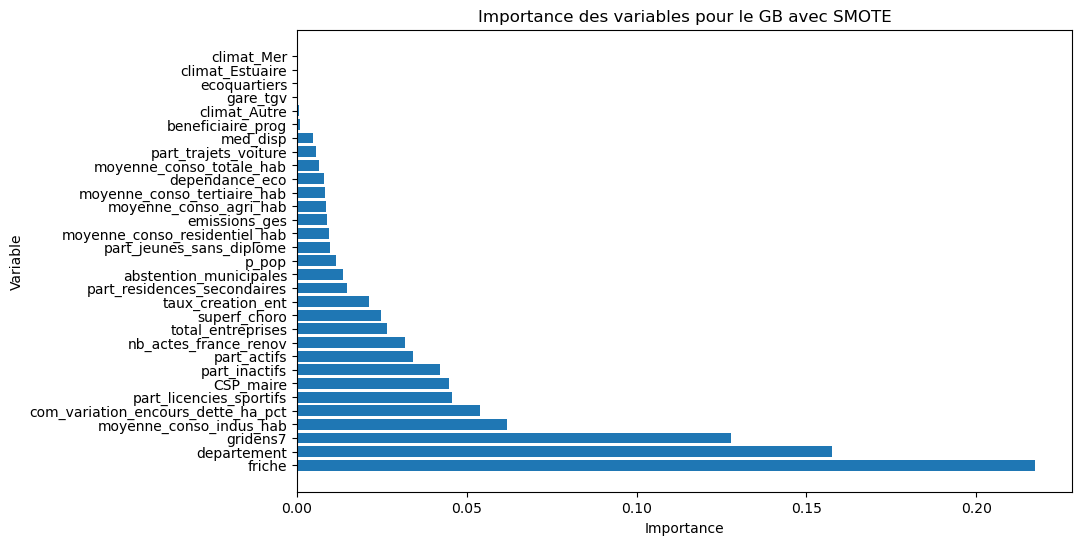

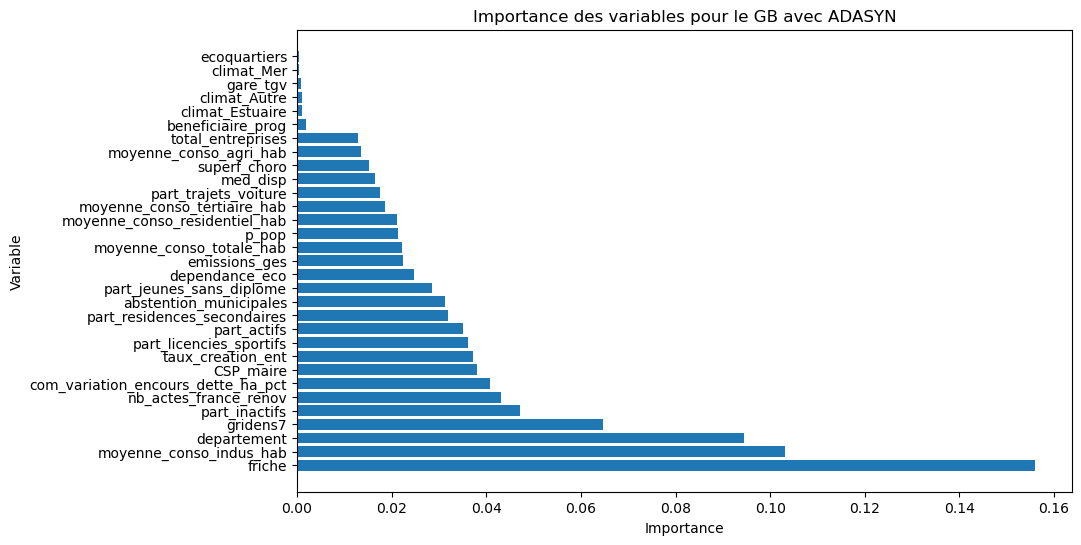

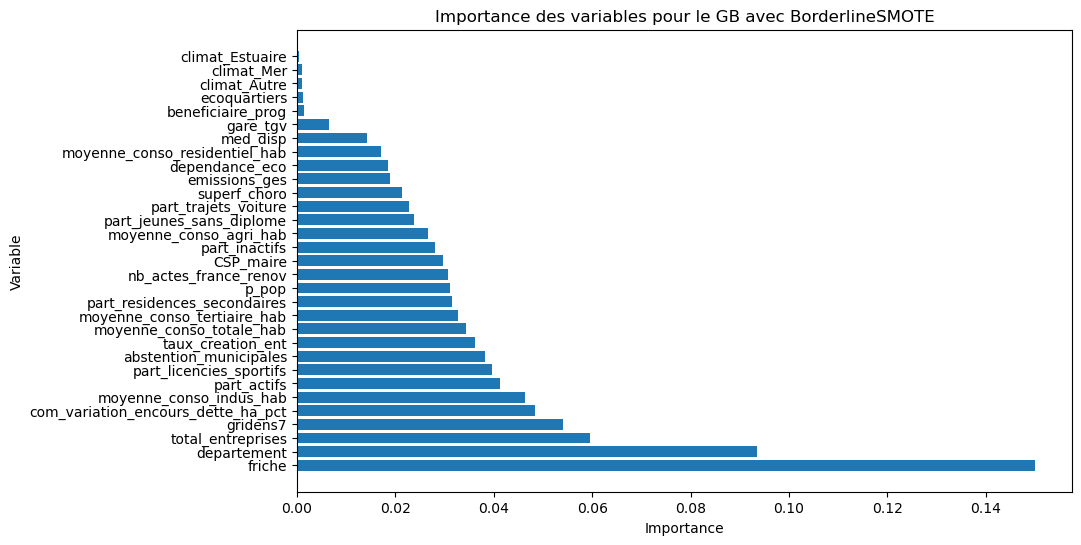

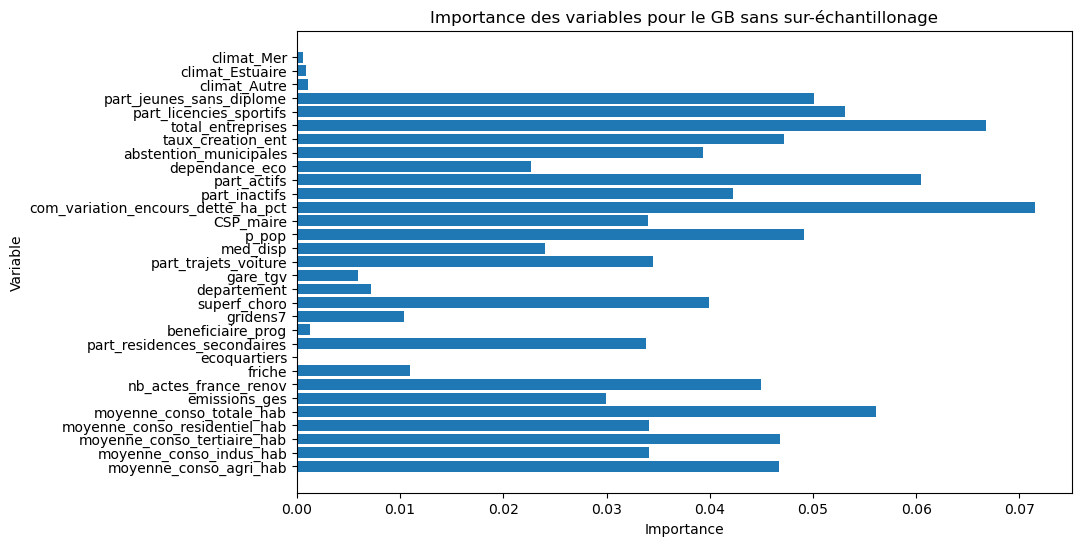

In [293]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_randomoversampler['Variable'], resultats_importance_variables_gb_randomoversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_smote['Variable'], resultats_importance_variables_gb_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_adasyn['Variable'], resultats_importance_variables_gb_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_borderline_smote['Variable'], resultats_importance_variables_gb_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb['Variable'], resultats_importance_variables_gb['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB sans sur-échantillonage')
plt.show()

## I.2.5. Adaboost

### A) Construction des modèles

In [294]:
# Construction des modèles
from sklearn.ensemble import AdaBoostClassifier

etapes_adaboost_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler(sampling_strategy = 0.4)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN(n_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_borderline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('borderline_smote', BorderlineSMOTE(k_neighbors = 5)), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

modele_adaboost_randomoversampler = Pipeline(steps=etapes_adaboost_randomoversampler) # Création du pipeline
modele_adaboost_smote = Pipeline(steps=etapes_adaboost_smote) # Création du pipeline
modele_adaboost_adasyn = Pipeline(steps=etapes_adaboost_adasyn) # Création du pipeline
modele_adaboost_borderline_smote = Pipeline(steps=etapes_adaboost_borderline_smote) # Création du pipeline
modele_adaboost = Pipeline(steps=etapes_adaboost) # Création du pipeline

In [295]:
modele_adaboost_randomoversampler.fit(X_train, y_train) # Entraînement
modele_adaboost_smote.fit(X_train, y_train) # Entraînement
modele_adaboost_adasyn.fit(X_train, y_train) # Entraînement
modele_adaboost_borderline_smote.fit(X_train, y_train) # Entraînement
modele_adaboost.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('adaboost', AdaBoostClassifier())])

In [296]:
# Prédictions

y_proba_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict(X_test)

y_proba_adaboost_smote = modele_adaboost_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote = modele_adaboost_smote.predict(X_test)

y_proba_adaboost_adasyn = modele_adaboost_adasyn.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn = modele_adaboost_adasyn.predict(X_test)

y_proba_adaboost_borderline_smote = modele_adaboost_borderline_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_borderline_smote = modele_adaboost_borderline_smote.predict(X_test)

y_proba_adaboost = modele_adaboost.predict_proba(X_test)[:, 1]
y_pred_adaboost = modele_adaboost.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [297]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler = roc_auc_score(y_test, y_proba_adaboost_randomoversampler)
auc_pr_adaboost_randomoversampler = average_precision_score(y_test, y_proba_adaboost_randomoversampler)
log_loss_value_adaboost_randomoversampler = log_loss(y_test, y_proba_adaboost_randomoversampler)
precision_adaboost_randomoversampler = precision_score(y_test, y_pred_adaboost_randomoversampler)
recall_adaboost_randomoversampler = recall_score(y_test, y_pred_adaboost_randomoversampler)
f1_adaboost_randomoversampler = f1_score(y_test, y_pred_adaboost_randomoversampler)
mcc_adaboost_randomoversampler = matthews_corrcoef(y_test, y_pred_adaboost_randomoversampler)
balanced_acc_adaboost_randomoversampler = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler)
specificity_adaboost_randomoversampler = confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 1])
cohen_kappa_adaboost_randomoversampler = cohen_kappa_score(y_test, y_pred_adaboost_randomoversampler)

auc_roc_adaboost_smote = roc_auc_score(y_test, y_proba_adaboost_smote)
auc_pr_adaboost_smote = average_precision_score(y_test, y_proba_adaboost_smote)
log_loss_value_adaboost_smote = log_loss(y_test, y_proba_adaboost_smote)
precision_adaboost_smote = precision_score(y_test, y_pred_adaboost_smote)
recall_adaboost_smote = recall_score(y_test, y_pred_adaboost_smote)
f1_adaboost_smote = f1_score(y_test, y_pred_adaboost_smote)
mcc_adaboost_smote = matthews_corrcoef(y_test, y_pred_adaboost_smote)
balanced_acc_adaboost_smote = balanced_accuracy_score(y_test, y_pred_adaboost_smote)
specificity_adaboost_smote = confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_smote)[0, 1])
cohen_kappa_adaboost_smote = cohen_kappa_score(y_test, y_pred_adaboost_smote)

auc_roc_adaboost_adasyn = roc_auc_score(y_test, y_proba_adaboost_adasyn)
auc_pr_adaboost_adasyn = average_precision_score(y_test, y_proba_adaboost_adasyn)
log_loss_value_adaboost_adasyn = log_loss(y_test, y_proba_adaboost_adasyn)
precision_adaboost_adasyn = precision_score(y_test, y_pred_adaboost_adasyn)
recall_adaboost_adasyn = recall_score(y_test, y_pred_adaboost_adasyn)
f1_adaboost_adasyn = f1_score(y_test, y_pred_adaboost_adasyn)
mcc_adaboost_adasyn = matthews_corrcoef(y_test, y_pred_adaboost_adasyn)
balanced_acc_adaboost_adasyn = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn)
specificity_adaboost_adasyn = confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 1])
cohen_kappa_adaboost_adasyn = cohen_kappa_score(y_test, y_pred_adaboost_adasyn)

auc_roc_adaboost_borderline_smote = roc_auc_score(y_test, y_proba_adaboost_borderline_smote)
auc_pr_adaboost_borderline_smote = average_precision_score(y_test, y_proba_adaboost_borderline_smote)
log_loss_value_adaboost_borderline_smote = log_loss(y_test, y_proba_adaboost_borderline_smote)
precision_adaboost_borderline_smote = precision_score(y_test, y_pred_adaboost_borderline_smote)
recall_adaboost_borderline_smote = recall_score(y_test, y_pred_adaboost_borderline_smote)
f1_adaboost_borderline_smote = f1_score(y_test, y_pred_adaboost_borderline_smote)
mcc_adaboost_borderline_smote = matthews_corrcoef(y_test, y_pred_adaboost_borderline_smote)
balanced_acc_adaboost_borderline_smote = balanced_accuracy_score(y_test, y_pred_adaboost_borderline_smote)
specificity_adaboost_borderline_smote = confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_borderline_smote)[0, 1])
cohen_kappa_adaboost_borderline_smote = cohen_kappa_score(y_test, y_pred_adaboost_borderline_smote)

auc_roc_adaboost = roc_auc_score(y_test, y_proba_adaboost)
auc_pr_adaboost = average_precision_score(y_test, y_proba_adaboost)
log_loss_value_adaboost = log_loss(y_test, y_proba_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)
mcc_adaboost = matthews_corrcoef(y_test, y_pred_adaboost)
balanced_acc_adaboost = balanced_accuracy_score(y_test, y_pred_adaboost)
specificity_adaboost = confusion_matrix(y_test, y_pred_adaboost)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost)[0, 0] + confusion_matrix(y_test, y_pred_adaboost)[0, 1])
cohen_kappa_adaboost = cohen_kappa_score(y_test, y_pred_adaboost)

In [298]:
# Affichage des résultats

resultats_adaboost = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost, auc_pr_adaboost, log_loss_value_adaboost, f1_adaboost, mcc_adaboost, balanced_acc_adaboost, specificity_adaboost, cohen_kappa_adaboost],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote, auc_pr_adaboost_smote, log_loss_value_adaboost_smote, f1_adaboost_smote, mcc_adaboost_smote, balanced_acc_adaboost_smote, specificity_adaboost_smote, cohen_kappa_adaboost_smote],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler, auc_pr_adaboost_randomoversampler, log_loss_value_adaboost_randomoversampler, f1_adaboost_randomoversampler, mcc_adaboost_randomoversampler, balanced_acc_adaboost_randomoversampler, specificity_adaboost_randomoversampler, cohen_kappa_adaboost_randomoversampler],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn, auc_pr_adaboost_adasyn, log_loss_value_adaboost_adasyn, f1_adaboost_adasyn, mcc_adaboost_adasyn, balanced_acc_adaboost_adasyn, specificity_adaboost_adasyn, cohen_kappa_adaboost_adasyn],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_borderline_smote, auc_pr_adaboost_borderline_smote, log_loss_value_adaboost_borderline_smote, f1_adaboost_borderline_smote, mcc_adaboost_borderline_smote, balanced_acc_adaboost_borderline_smote, specificity_adaboost_borderline_smote, cohen_kappa_adaboost_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost = resultats_adaboost.round(3)
resultats_adaboost

AdaBoost sans sur-échantillonnage  AdaBoost avec SMOTE  \
AUC-ROC                                  0.666                0.641   
AUC-PR                                   0.279                0.281   
Log loss                                 0.647                0.680   
F1                                       0.182                0.300   
MCC                                      0.131                0.122   
Accuracy                                 0.539                0.569   
Spécificité                              0.959                0.781   
Kappa                                    0.107                0.120   

             AdaBoost avec RandomOverSampler  AdaBoost avec ADASYN  \
AUC-ROC                                0.628                 0.659   
AUC-PR                                 0.250                 0.282   
Log loss                               0.646                 0.672   
F1                                     0.243                 0.340   
MCC                                    0.108                 0.174   
Accuracy                               0.548                 0.598   
Spécificité                            0.883                 0.791   
Kappa                                  0.107                 0.170   

             AdaBoost avec BorderlineSMOTE  
AUC-ROC                              0.652  
AUC-PR                               0.277  
Log loss                             0.680  
F1                                   0.283  
MCC                                  0.102  
Accuracy                             0.557  
Spécificité                          0.781  
Kappa                                0.100

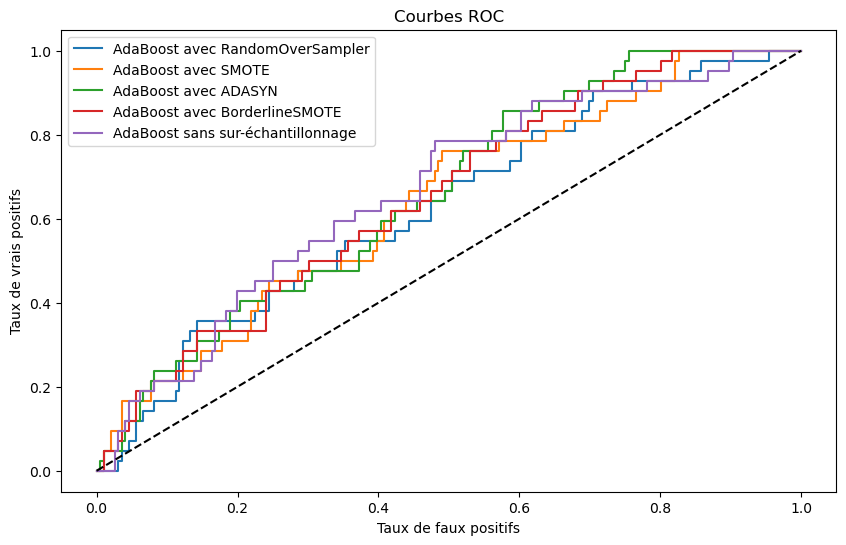

In [299]:
# Courbes ROC

fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler)
fpr_adaboost_smote, tpr_adaboost_smote, _ = roc_curve(y_test, y_proba_adaboost_smote)
fpr_adaboost_adasyn, tpr_adaboost_adasyn, _ = roc_curve(y_test, y_proba_adaboost_adasyn)
fpr_adaboost_borderline_smote, tpr_adaboost_borderline_smote, _ = roc_curve(y_test, y_proba_adaboost_borderline_smote)
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_proba_adaboost)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote, tpr_adaboost_smote, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn, tpr_adaboost_adasyn, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_borderline_smote, tpr_adaboost_borderline_smote, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### C) Ajustement des hyperparamètres

In [300]:
# Ajustement des hyperparamètres par validation croisée

# Définition de la grille des hyperparamètres pour le AdaBoost

param_grid_adaboost_oversampler = {
    'oversampler__sampling_strategy': ['auto', 0.5, 0.75, 1.0],
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

param_grid_adaboost_smote = {
    'smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

param_grid_adaboost_adasyn = {
    'adasyn__n_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

param_grid_adaboost_borderline_smote = {
    'borderline_smote__k_neighbors': [3, 5, 7, 9], # Nombre de voisins
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

param_grid_adaboost = {
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score),
    'Kappa': make_scorer(cohen_kappa_score),
    'AUC': 'roc_auc'
}


In [301]:
# Ajustement des hyperparamètres

grille_recherche_adaboost_randomoversampler = GridSearchCV(modele_adaboost_randomoversampler, param_grid_adaboost_oversampler, cv=5, scoring=scoring, refit = 'AUC', n_jobs=-1)
grille_recherche_adaboost_smote = GridSearchCV(modele_adaboost_smote, param_grid_adaboost_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_adaboost_adasyn = GridSearchCV(modele_adaboost_adasyn, param_grid_adaboost_adasyn, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_adaboost_borderline_smote = GridSearchCV(modele_adaboost_borderline_smote, param_grid_adaboost_borderline_smote, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)
grille_recherche_adaboost = GridSearchCV(modele_adaboost, param_grid_adaboost, cv=5, scoring=scoring, refit = 'AUC',n_jobs=-1)

In [302]:
# Sélection du meilleur modèle

modele_adaboost_randomoversampler_opt = grille_recherche_adaboost_randomoversampler.fit(X_train, y_train).best_estimator_

In [303]:
modele_adaboost_smote_opt = grille_recherche_adaboost_smote.fit(X_train, y_train).best_estimator_

In [304]:
modele_adaboost_adasyn_opt = grille_recherche_adaboost_adasyn.fit(X_train, y_train).best_estimator_

In [305]:
modele_adaboost_borderline_smote_opt = grille_recherche_adaboost_borderline_smote.fit(X_train, y_train).best_estimator_

In [306]:
modele_adaboost_opt = grille_recherche_adaboost.fit(X_train, y_train).best_estimator_

In [307]:
# Prédictions

y_proba_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler_cv = modele_adaboost_randomoversampler_opt.predict(X_test)

y_proba_adaboost_smote_cv = modele_adaboost_smote_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote_cv = modele_adaboost_smote_opt.predict(X_test)

y_proba_adaboost_adasyn_cv = modele_adaboost_adasyn_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn_cv = modele_adaboost_adasyn_opt.predict(X_test)

y_proba_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_borderline_smote_cv = modele_adaboost_borderline_smote_opt.predict(X_test)

y_proba_adaboost_cv = modele_adaboost_opt.predict_proba(X_test)[:, 1]
y_pred_adaboost_cv = modele_adaboost_opt.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [308]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler_cv = roc_auc_score(y_test, y_proba_adaboost_randomoversampler_cv)
auc_pr_adaboost_randomoversampler_cv = average_precision_score(y_test, y_proba_adaboost_randomoversampler_cv)
log_loss_value_adaboost_randomoversampler_cv = log_loss(y_test, y_proba_adaboost_randomoversampler_cv)
precision_adaboost_randomoversampler_cv = precision_score(y_test, y_pred_adaboost_randomoversampler_cv)
recall_adaboost_randomoversampler_cv = recall_score(y_test, y_pred_adaboost_randomoversampler_cv)
f1_adaboost_randomoversampler_cv = f1_score(y_test, y_pred_adaboost_randomoversampler_cv)
mcc_adaboost_randomoversampler_cv = matthews_corrcoef(y_test, y_pred_adaboost_randomoversampler_cv)
balanced_acc_adaboost_randomoversampler_cv = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler_cv)
specificity_adaboost_randomoversampler_cv = confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_randomoversampler_cv)[0, 1])
cohen_kappa_adaboost_randomoversampler_cv = cohen_kappa_score(y_test, y_pred_adaboost_randomoversampler_cv)

auc_roc_adaboost_smote_cv = roc_auc_score(y_test, y_proba_adaboost_smote_cv)
auc_pr_adaboost_smote_cv = average_precision_score(y_test, y_proba_adaboost_smote_cv)
log_loss_value_adaboost_smote_cv = log_loss(y_test, y_proba_adaboost_smote_cv)
precision_adaboost_smote_cv = precision_score(y_test, y_pred_adaboost_smote_cv)
recall_adaboost_smote_cv = recall_score(y_test, y_pred_adaboost_smote_cv)
f1_adaboost_smote_cv = f1_score(y_test, y_pred_adaboost_smote_cv)
mcc_adaboost_smote_cv = matthews_corrcoef(y_test, y_pred_adaboost_smote_cv)
balanced_acc_adaboost_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_smote_cv)
specificity_adaboost_smote_cv = confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_smote_cv)[0, 1])
cohen_kappa_adaboost_smote_cv = cohen_kappa_score(y_test, y_pred_adaboost_smote_cv)

auc_roc_adaboost_adasyn_cv = roc_auc_score(y_test, y_proba_adaboost_adasyn_cv)
auc_pr_adaboost_adasyn_cv = average_precision_score(y_test, y_proba_adaboost_adasyn_cv)
log_loss_value_adaboost_adasyn_cv = log_loss(y_test, y_proba_adaboost_adasyn_cv)
precision_adaboost_adasyn_cv = precision_score(y_test, y_pred_adaboost_adasyn_cv)
recall_adaboost_adasyn_cv = recall_score(y_test, y_pred_adaboost_adasyn_cv)
f1_adaboost_adasyn_cv = f1_score(y_test, y_pred_adaboost_adasyn_cv)
mcc_adaboost_adasyn_cv = matthews_corrcoef(y_test, y_pred_adaboost_adasyn_cv)
balanced_acc_adaboost_adasyn_cv = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn_cv)
specificity_adaboost_adasyn_cv = confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_adasyn_cv)[0, 1])
cohen_kappa_adaboost_adasyn_cv = cohen_kappa_score(y_test, y_pred_adaboost_adasyn_cv)

auc_roc_adaboost_borderline_smote_cv = roc_auc_score(y_test, y_proba_adaboost_borderline_smote_cv)
auc_pr_adaboost_borderline_smote_cv = average_precision_score(y_test, y_proba_adaboost_borderline_smote_cv)
log_loss_value_adaboost_borderline_smote_cv = log_loss(y_test, y_proba_adaboost_borderline_smote_cv)
precision_adaboost_borderline_smote_cv = precision_score(y_test, y_pred_adaboost_borderline_smote_cv)
recall_adaboost_borderline_smote_cv = recall_score(y_test, y_pred_adaboost_borderline_smote_cv)
f1_adaboost_borderline_smote_cv = f1_score(y_test, y_pred_adaboost_borderline_smote_cv)
mcc_adaboost_borderline_smote_cv = matthews_corrcoef(y_test, y_pred_adaboost_borderline_smote_cv)
balanced_acc_adaboost_borderline_smote_cv = balanced_accuracy_score(y_test, y_pred_adaboost_borderline_smote_cv)
specificity_adaboost_borderline_smote_cv = confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_borderline_smote_cv)[0, 1])
cohen_kappa_adaboost_borderline_smote_cv = cohen_kappa_score(y_test, y_pred_adaboost_borderline_smote_cv)

auc_roc_adaboost_cv = roc_auc_score(y_test, y_proba_adaboost_cv)
auc_pr_adaboost_cv = average_precision_score(y_test, y_proba_adaboost_cv)
log_loss_value_adaboost_cv = log_loss(y_test, y_proba_adaboost_cv)
precision_adaboost_cv = precision_score(y_test, y_pred_adaboost_cv)
recall_adaboost_cv = recall_score(y_test, y_pred_adaboost_cv)
f1_adaboost_cv = f1_score(y_test, y_pred_adaboost_cv)
mcc_adaboost_cv = matthews_corrcoef(y_test, y_pred_adaboost_cv)
balanced_acc_adaboost_cv = balanced_accuracy_score(y_test, y_pred_adaboost_cv)
specificity_adaboost_cv = confusion_matrix(y_test, y_pred_adaboost_cv)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_cv)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_cv)[0, 1])
cohen_kappa_adaboost_cv = cohen_kappa_score(y_test, y_pred_adaboost_cv)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [324]:
# Affichage des résultats

resultats_adaboost_cv = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost_cv, auc_pr_adaboost_cv, log_loss_value_adaboost_cv, f1_adaboost_cv, mcc_adaboost_cv, balanced_acc_adaboost_cv, specificity_adaboost_cv, cohen_kappa_adaboost_cv],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote_cv, auc_pr_adaboost_smote_cv, log_loss_value_adaboost_smote_cv, f1_adaboost_smote_cv, mcc_adaboost_smote_cv, balanced_acc_adaboost_smote_cv, specificity_adaboost_smote_cv, cohen_kappa_adaboost_smote_cv],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler_cv, auc_pr_adaboost_randomoversampler_cv, log_loss_value_adaboost_randomoversampler_cv, f1_adaboost_randomoversampler_cv, mcc_adaboost_randomoversampler_cv, balanced_acc_adaboost_randomoversampler_cv, specificity_adaboost_randomoversampler_cv, cohen_kappa_adaboost_randomoversampler_cv],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn_cv, auc_pr_adaboost_adasyn_cv, log_loss_value_adaboost_adasyn_cv, f1_adaboost_adasyn_cv, mcc_adaboost_adasyn_cv, balanced_acc_adaboost_adasyn_cv, specificity_adaboost_adasyn_cv, cohen_kappa_adaboost_adasyn_cv],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_borderline_smote_cv, auc_pr_adaboost_borderline_smote_cv, log_loss_value_adaboost_borderline_smote_cv, f1_adaboost_borderline_smote_cv, mcc_adaboost_borderline_smote_cv, balanced_acc_adaboost_borderline_smote_cv, specificity_adaboost_borderline_smote_cv, cohen_kappa_adaboost_borderline_smote_cv]}, 
    index=["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost_cv = resultats_adaboost_cv.round(3)
resultats_adaboost_cv

# Export 
resultats_adaboost_cv.to_csv("resultats_adaboost_cv.csv", index=True)
latex_table_adaboost = resultats_adaboost_cv.to_latex(index=True)
print(latex_table_adaboost)

\begin{tabular}{lrrrrr}
\toprule
 & AdaBoost sans sur-échantillonnage & AdaBoost avec SMOTE & AdaBoost avec RandomOverSampler & AdaBoost avec ADASYN & AdaBoost avec BorderlineSMOTE \\
\midrule
AUC-ROC & 0.670000 & 0.684000 & 0.670000 & 0.680000 & 0.699000 \\
AUC-PR & 0.292000 & 0.318000 & 0.290000 & 0.301000 & 0.327000 \\
Log loss & 0.559000 & 0.668000 & 0.633000 & 0.670000 & 0.662000 \\
F1 & 0.000000 & 0.362000 & 0.294000 & 0.362000 & 0.390000 \\
MCC & 0.000000 & 0.197000 & 0.102000 & 0.189000 & 0.227000 \\
Accuracy & 0.500000 & 0.614000 & 0.560000 & 0.615000 & 0.639000 \\
Spécificité & 1.000000 & 0.776000 & 0.740000 & 0.730000 & 0.730000 \\
Kappa & 0.000000 & 0.190000 & 0.098000 & 0.177000 & 0.210000 \\
\bottomrule
\end{tabular}



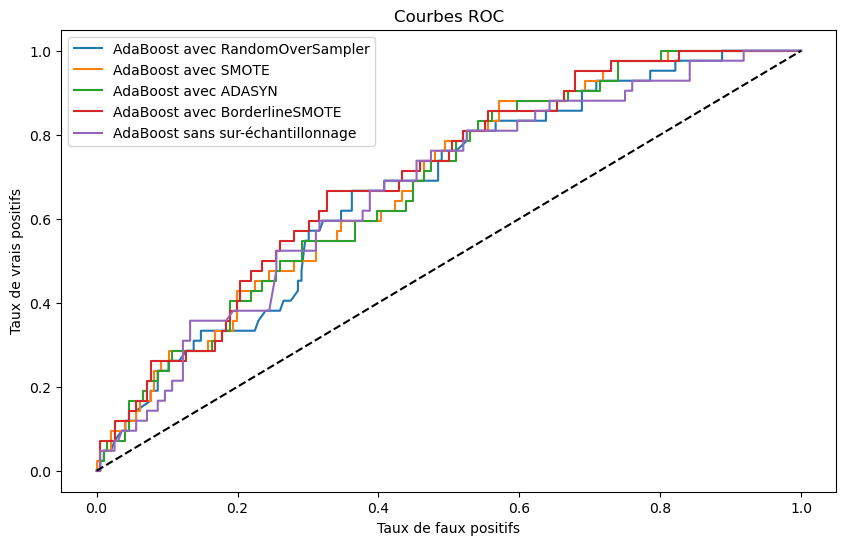

In [310]:
# Courbes ROC

fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler_cv)
fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_smote_cv)
fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, _ = roc_curve(y_test, y_proba_adaboost_adasyn_cv)
fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_borderline_smote_cv)
fpr_adaboost_cv, tpr_adaboost_cv, _ = roc_curve(y_test, y_proba_adaboost_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_borderline_smote_cv, tpr_adaboost_borderline_smote_cv, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost_cv, tpr_adaboost_cv, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### E) Importance des variables

In [311]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_adaboost_randomoversampler = modele_adaboost_randomoversampler_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_smote = modele_adaboost_smote_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_adasyn = modele_adaboost_adasyn_opt.named_steps['adaboost'].feature_importances_
importances_adaboost_borderline_smote = modele_adaboost_borderline_smote_opt.named_steps['adaboost'].feature_importances_
importances_adaboost = modele_adaboost_opt.named_steps['adaboost'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_adaboost_randomoversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_randomoversampler
})

resultats_importance_variables_adaboost_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_smote
})

resultats_importance_variables_adaboost_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_adasyn
})

resultats_importance_variables_adaboost_borderline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_borderline_smote
})

resultats_importance_variables_adaboost = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost
})

# Affichage des résultats
resultats_importance_variables_adaboost_randomoversampler = resultats_importance_variables_adaboost_randomoversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_smote = resultats_importance_variables_adaboost_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_adasyn = resultats_importance_variables_adaboost_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_borderline_smote = resultats_importance_variables_adaboost_borderline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost = resultats_importance_variables_adaboost.sort_values(by="Importance", ascending=False)

resultats_importance_variables_adaboost_randomoversampler

Variable  Importance
21                         part_actifs        0.16
20                       part_inactifs        0.14
19  com_variation_encours_dette_ha_pct        0.14
17                               p_pop        0.12
26             part_licencies_sportifs        0.12
6                nb_actes_france_renov        0.06
1              moyenne_conso_indus_hab        0.05
25                   total_entreprises        0.05
12                        superf_choro        0.04
9          part_residences_secondaires        0.04
24                   taux_creation_ent        0.02
5                        emissions_ges        0.02
27            part_jeunes_sans_diplome        0.02
7                               friche        0.01
23              abstention_municipales        0.01
22                      dependance_eco        0.00
28                        climat_Autre        0.00
29                     climat_Estuaire        0.00
0               moyenne_conso_agri_hab        0.00
15                part_trajets_voiture        0.00
18                           CSP_maire        0.00
16                            med_disp        0.00
14                            gare_tgv        0.00
13                         departement        0.00
11                            gridens7        0.00
10                   beneficiaire_prog        0.00
8                         ecoquartiers        0.00
4             moyenne_conso_totale_hab        0.00
3        moyenne_conso_residentiel_hab        0.00
2          moyenne_conso_tertiaire_hab        0.00
30                          climat_Mer        0.00

In [312]:
resultats_importance_variables_adaboost_smote

Variable  Importance
11                            gridens7      0.2050
13                         departement      0.1750
7                               friche      0.1150
18                           CSP_maire      0.1000
21                         part_actifs      0.0675
19  com_variation_encours_dette_ha_pct      0.0650
26             part_licencies_sportifs      0.0575
20                       part_inactifs      0.0575
1              moyenne_conso_indus_hab      0.0325
24                   taux_creation_ent      0.0200
4             moyenne_conso_totale_hab      0.0175
9          part_residences_secondaires      0.0150
0               moyenne_conso_agri_hab      0.0125
5                        emissions_ges      0.0125
27            part_jeunes_sans_diplome      0.0100
23              abstention_municipales      0.0100
15                part_trajets_voiture      0.0075
17                               p_pop      0.0050
16                            med_disp      0.0050
12                        superf_choro      0.0050
10                   beneficiaire_prog      0.0025
6                nb_actes_france_renov      0.0025
14                            gare_tgv      0.0000
22                      dependance_eco      0.0000
8                         ecoquartiers      0.0000
25                   total_entreprises      0.0000
3        moyenne_conso_residentiel_hab      0.0000
2          moyenne_conso_tertiaire_hab      0.0000
28                        climat_Autre      0.0000
29                     climat_Estuaire      0.0000
30                          climat_Mer      0.0000

In [313]:
resultats_importance_variables_adaboost_smote

Variable  Importance
11                            gridens7      0.2050
13                         departement      0.1750
7                               friche      0.1150
18                           CSP_maire      0.1000
21                         part_actifs      0.0675
19  com_variation_encours_dette_ha_pct      0.0650
26             part_licencies_sportifs      0.0575
20                       part_inactifs      0.0575
1              moyenne_conso_indus_hab      0.0325
24                   taux_creation_ent      0.0200
4             moyenne_conso_totale_hab      0.0175
9          part_residences_secondaires      0.0150
0               moyenne_conso_agri_hab      0.0125
5                        emissions_ges      0.0125
27            part_jeunes_sans_diplome      0.0100
23              abstention_municipales      0.0100
15                part_trajets_voiture      0.0075
17                               p_pop      0.0050
16                            med_disp      0.0050
12                        superf_choro      0.0050
10                   beneficiaire_prog      0.0025
6                nb_actes_france_renov      0.0025
14                            gare_tgv      0.0000
22                      dependance_eco      0.0000
8                         ecoquartiers      0.0000
25                   total_entreprises      0.0000
3        moyenne_conso_residentiel_hab      0.0000
2          moyenne_conso_tertiaire_hab      0.0000
28                        climat_Autre      0.0000
29                     climat_Estuaire      0.0000
30                          climat_Mer      0.0000

In [314]:
resultats_importance_variables_adaboost_borderline_smote

Variable  Importance
13                         departement    0.193333
11                            gridens7    0.156667
7                               friche    0.116667
18                           CSP_maire    0.103333
20                       part_inactifs    0.073333
21                         part_actifs    0.070000
19  com_variation_encours_dette_ha_pct    0.063333
26             part_licencies_sportifs    0.040000
1              moyenne_conso_indus_hab    0.033333
9          part_residences_secondaires    0.026667
4             moyenne_conso_totale_hab    0.023333
17                               p_pop    0.023333
0               moyenne_conso_agri_hab    0.016667
27            part_jeunes_sans_diplome    0.013333
12                        superf_choro    0.010000
25                   total_entreprises    0.010000
23              abstention_municipales    0.006667
6                nb_actes_france_renov    0.006667
5                        emissions_ges    0.006667
2          moyenne_conso_tertiaire_hab    0.003333
24                   taux_creation_ent    0.003333
28                        climat_Autre    0.000000
29                     climat_Estuaire    0.000000
15                part_trajets_voiture    0.000000
22                      dependance_eco    0.000000
16                            med_disp    0.000000
14                            gare_tgv    0.000000
10                   beneficiaire_prog    0.000000
8                         ecoquartiers    0.000000
3        moyenne_conso_residentiel_hab    0.000000
30                          climat_Mer    0.000000

In [315]:
resultats_importance_variables_adaboost

Variable  Importance
21                         part_actifs        0.22
19  com_variation_encours_dette_ha_pct        0.12
20                       part_inactifs        0.12
17                               p_pop        0.10
25                   total_entreprises        0.08
26             part_licencies_sportifs        0.06
6                nb_actes_france_renov        0.04
9          part_residences_secondaires        0.04
12                        superf_choro        0.04
23              abstention_municipales        0.04
5                        emissions_ges        0.02
7                               friche        0.02
27            part_jeunes_sans_diplome        0.02
24                   taux_creation_ent        0.02
1              moyenne_conso_indus_hab        0.02
18                           CSP_maire        0.02
0               moyenne_conso_agri_hab        0.02
22                      dependance_eco        0.00
28                        climat_Autre        0.00
29                     climat_Estuaire        0.00
15                part_trajets_voiture        0.00
16                            med_disp        0.00
14                            gare_tgv        0.00
13                         departement        0.00
11                            gridens7        0.00
10                   beneficiaire_prog        0.00
8                         ecoquartiers        0.00
4             moyenne_conso_totale_hab        0.00
3        moyenne_conso_residentiel_hab        0.00
2          moyenne_conso_tertiaire_hab        0.00
30                          climat_Mer        0.00

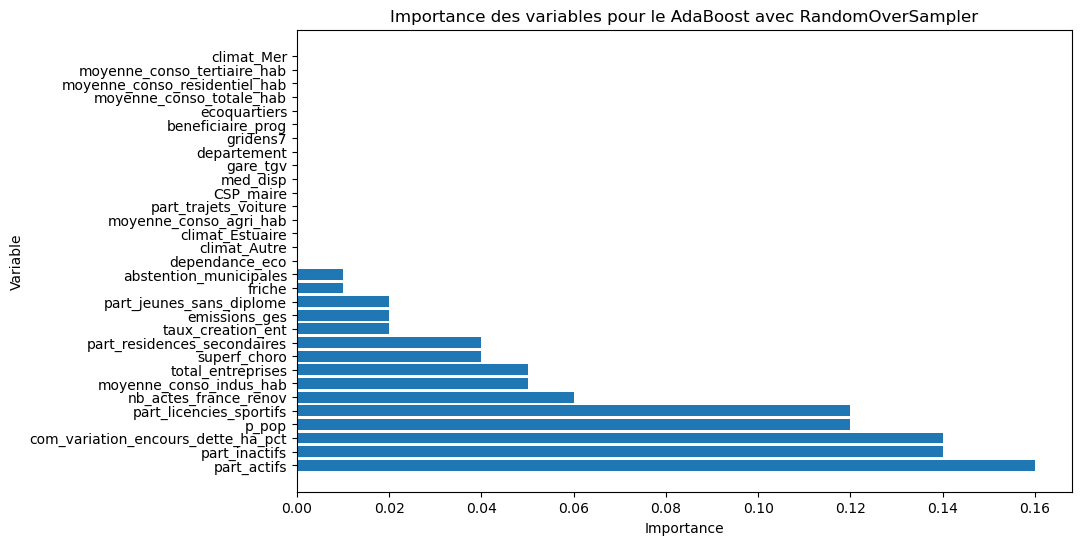

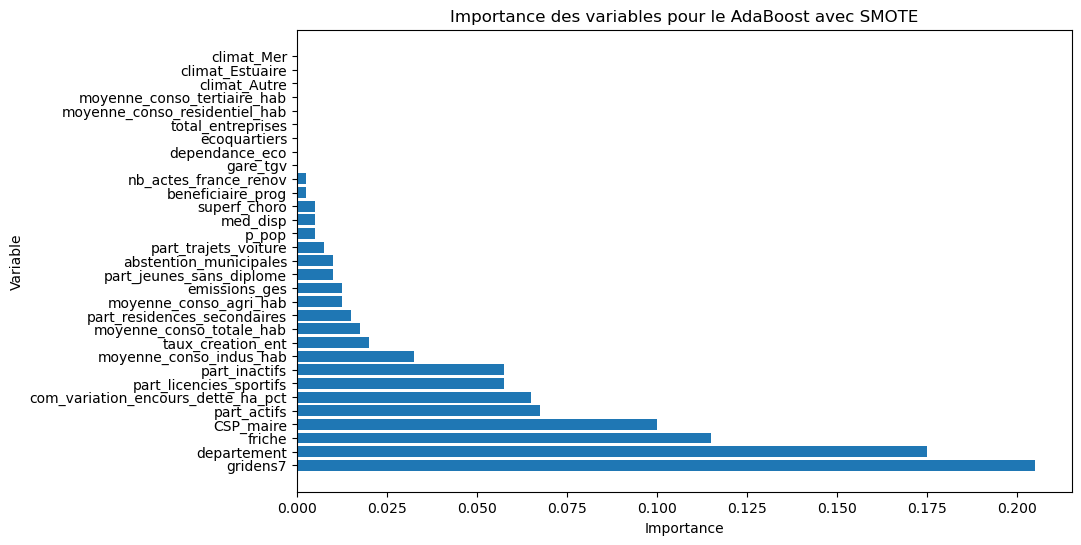

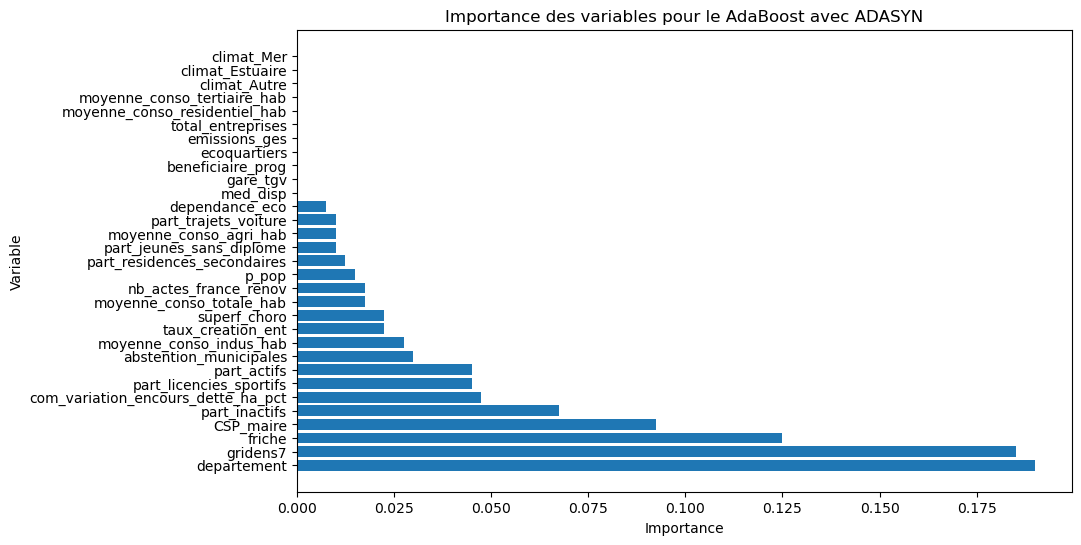

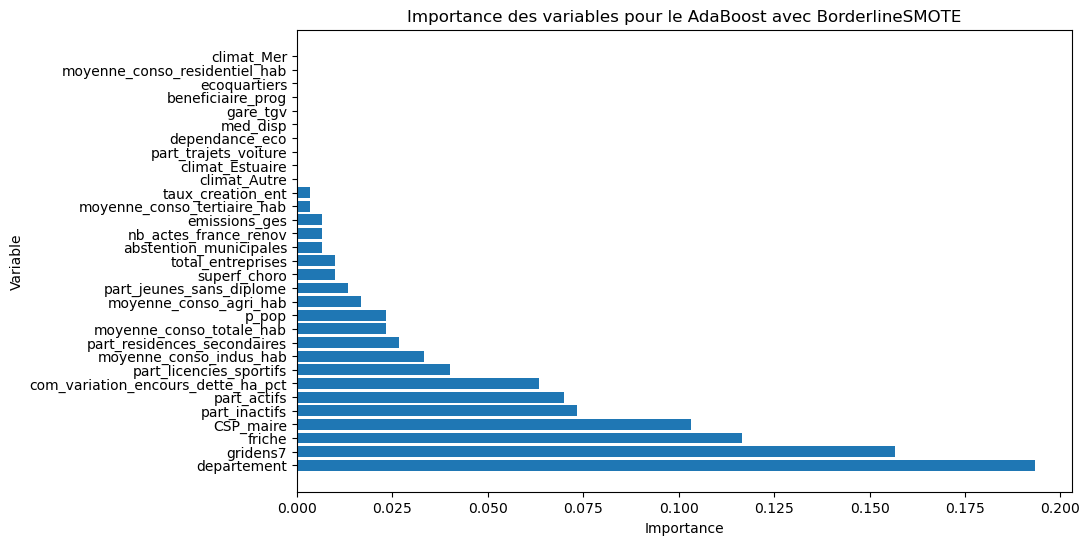

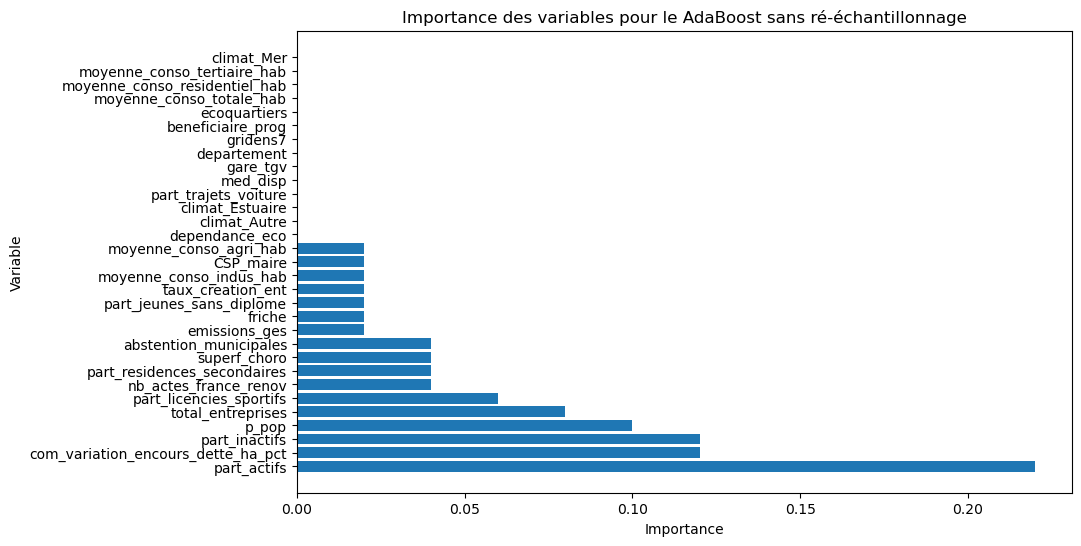

In [316]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_randomoversampler['Variable'], resultats_importance_variables_adaboost_randomoversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_smote['Variable'], resultats_importance_variables_adaboost_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_adasyn['Variable'], resultats_importance_variables_adaboost_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_borderline_smote['Variable'], resultats_importance_variables_adaboost_borderline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost['Variable'], resultats_importance_variables_adaboost['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost sans ré-échantillonnage')
plt.show()

## I.3. Comparaison des modèles

## I.4. Cartographie

In [1]:
# Cartographie heatmap de la probabilité des communes de recevoir/demander 
# des financements en faveur de la transition écologique
import folium

# Utilisation des probabilités associées au meilleur modèle (y_proba_rf_smote_cv)

# Création d'un DataFrame avec les probabilités prédites
df_proba = pd.DataFrame({
    "Code commune": X_test.index,
    "Probabilité": y_proba_adaboost_smote_cv
})

# Création d'une carte centrée sur la Bretagne
m = folium.Map(location=[48.202047, -2.932644], zoom_start=8)


# Ajout du gradient de couleur
from branca.colormap import linear

colormap = linear.YlGnBu_09.scale(
    df_proba["Probabilité"].min(),
    df_proba["Probabilité"].max())

colormap.caption = "Probabilité de recevoir/demander des financements en faveur de la transition écologique"

# Ajout des marqueurs
# for i in range(len(df_proba)):
#     folium.Marker(
#         location=[df_proba.loc[i, "Latitude"], df_proba.loc[i, "Longitude"]],
#         popup=f"{df_proba.loc[i, 'Nom commune']} ({df_proba.loc[i, 'Code commune']}) - Probabilité : {df_proba.loc[i, 'Probabilité']:.3f}",
#         icon=folium.Icon(color=colormap(df_proba.loc[i, "Probabilité"]))
#     ).add_to(m)

# m.add_child(colormap)
# m.save("carte_probabilites_adaboost_smote_cv.html")
# m





KeyboardInterrupt: 